<a href="https://colab.research.google.com/github/DanielRaiicHu/telecom_x_2/blob/main/telecom_x_2.ipynb?forceRefresh=true">
  <img src="https://drive.google.com/uc?export=view&id=191Woxwut0iaIL2hCcCIeXRSB6oba_88H" alt="Abrir en Colab" width="120"/>
</a>

# **Proyecto: Telecom X - Parte 2**

## **Proyecto**
---

Una empresa de telecomunicaciones enfrenta un desafío crítico: **la evasión de clientes (churn)**. A pesar de contar con una base amplia de usuarios, cada vez más clientes deciden abandonar el servicio, lo que impacta directamente en la rentabilidad y estabilidad de la compañía.

* En un **primer trabajo** (Desafío 1), se realizó un proceso de extracción, limpieza, normalización y transformación de datos, con la finalidad de generar una base confiable sobre la cual trabajar. Esto incluyó la traducción al español de variables y categorías, la eliminación de inconsistencias y la creación de un nuevo dataframe listo para el análisis. En esa etapa, se aplicaron principalmente técnicas de **análisis exploratorio de datos (EDA)** para identificar patrones iniciales de evasión, contrastando variables demográficas, contractuales y de uso frente a la variable de respuesta (Evasión).

* En este **segundo trabajo** (continuación), el enfoque se amplía: además de retomar la base previamente preparada, se profundiza en un análisis exploratorio de variables categóricas y numéricas (boxplots y comparativas con la evasión) y, principalmente, se avanza hacia la construcción y validación de **modelos predictivos**.

* **El proyecto se centra en:**

  - **Preparación de los datos:** ajuste de variables, tratamiento de binarios, verificación de proporciones y selección de variables explicativas.

  - **Entrenamiento de modelos:** implementación de distintos algoritmos de clasificación, evaluados con métricas clave como precisión, recall, accuracy y F1-Score.

  - **Evaluación robusta:** uso de matriz de confusión, curvas ROC y PRC (Precision-Recall), métricas AUC y validación cruzada con K-Fold estratificado, garantizando un análisis más confiable.

  - **Interpretabilidad y validación:** análisis de la importancia de variables, pruebas de sensibilidad y ajuste de umbrales para optimizar la detección de clientes en riesgo de evasión.

  - **Modelo final (champion):** selección, guardado, carga y prueba del modelo elegido con nuevos registros simulados, demostrando su aplicabilidad real.

En conjunto, este proyecto busca no solo describir patrones de evasión, sino también **anticipar qué clientes están en riesgo**, dotando a la empresa de una herramienta predictiva para diseñar estrategias de retención más efectivas y reducir pérdidas económicas.

## **Preparación de los Datos**
---

* Antes de entrenar cualquier modelo predictivo, es fundamental contar con datos consistentes, limpios y estructurados. Esta etapa se centra en transformar la base de datos en un formato adecuado para el análisis y la modelización, garantizando que las variables utilizadas representen correctamente la información de los clientes.

* En esta sección se desarrollan los siguientes pasos:

  - **Importación de librerías y archivo tratado:** se cargan las herramientas necesarias y el dataframe previamente trabajado en el proyecto anterior, ya transformado y normalizado.

  - **Eliminación de columnas irrelevantes:** se descartan variables redundantes o poco informativas que no aportan valor al análisis.

  - **Tratamiento de datos binarios:** se ajustan las variables categóricas de tipo Sí/No o Verdadero/Falso para que puedan ser interpretadas correctamente por los modelos.

  - **Correlación con la variable objetivo:** se estudia cómo se relacionan las distintas variables con la variable de respuesta (Evasión), para identificar patrones iniciales de importancia.

  - **Antigüedad 12 meses:** se analiza el tiempo de permanencia de los clientes como un factor crítico en la evasión.

  - **Verificación de la proporción de la variable respuesta:** se examina el balance entre clientes que permanecen y los que abandonan, paso clave para definir estrategias de modelado y evaluar posibles sesgos.

  - **Análisis exploratorio preliminar:** tanto en variables categóricas como numéricas, utilizando gráficos comparativos y boxplots que permiten detectar tendencias, valores atípicos y diferencias relevantes entre los grupos de clientes.

  - **Separación de variables:** finalmente, se definen las variables explicativas (predictoras) y la variable respuesta, dejando los datos listos para alimentar los modelos de clasificación.

* En conjunto, esta etapa constituye la base del proyecto: asegura que los datos estén en las condiciones óptimas para entrenar modelos de machine learning, evitando sesgos y facilitando la obtención de resultados más confiables.

### **Importación de librerías**

In [185]:
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cbook import boxplot_stats
from matplotlib.ticker import MultipleLocator
from matplotlib.colors import LinearSegmentedColormap, ListedColormap, BoundaryNorm
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_validate, cross_val_score, LeaveOneOut
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import average_precision_score
from sklearn.metrics import classification_report
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant
import joblib
import warnings
# Ignoramos mensajes de advertencia para mantener la salida limpia
warnings.filterwarnings('ignore')


### **Extracción del Archivo Tratado**

Se importan y tratan los datos generados en el desafío anterior

In [2]:
url = 'https://raw.githubusercontent.com/DanielRaiicHu/telecom_x_2/main/datos_tratados.csv'
datos = pd.read_csv(url)
datos.head()

,ID_Cliente,Evasion,Genero,AdultoMayor,TienePareja,Dependientes,MesesAntiguedad,ServicioTelefonico,LineasMultiples,ServicioInternet,...,ProteccionDispositivo,SoporteTecnico,StreamingTV,StreamingPeliculas,TipoContrato,FacturaElectronica,MetodoPago,CuentasDiarias,CargoMensual,CargoTotal
0,0002-ORFBO,No,Femenino,No,Sí,Sí,9,Sí,No,DSL,...,No,Sí,Sí,No,Un año,Sí,Cheque por correo,2.19,65.6,593.30
1,0003-MKNFE,No,Masculino,No,No,No,9,Sí,Sí,DSL,...,No,No,No,Sí,Mensual,No,Cheque por correo,2.00,59.9,542.40
2,0004-TLHLJ,Sí,Masculino,No,No,No,4,Sí,No,Fibra óptica,...,Sí,No,No,No,Mensual,Sí,Cheque electrónico,2.46,73.9,280.85
3,0011-IGKFF,Sí,Masculino,Sí,Sí,No,13,Sí,No,Fibra óptica,...,Sí,No,Sí,Sí,Mensual,Sí,Cheque electrónico,3.27,98.0,1237.85
4,0013-EXCHZ,Sí,Femenino,Sí,Sí,No,3,Sí,No,Fibra óptica,...,No,Sí,Sí,No,Mensual,Sí,Cheque por correo,2.80,83.9,267.40


In [3]:
datos.shape

(7043, 22)

In [4]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID_Cliente             7043 non-null   object 
 1   Evasion                7043 non-null   object 
 2   Genero                 7043 non-null   object 
 3   AdultoMayor            7043 non-null   object 
 4   TienePareja            7043 non-null   object 
 5   Dependientes           7043 non-null   object 
 6   MesesAntiguedad        7043 non-null   int64  
 7   ServicioTelefonico     7043 non-null   object 
 8   LineasMultiples        7043 non-null   object 
 9   ServicioInternet       7043 non-null   object 
 10  SeguridadEnLinea       7043 non-null   object 
 11  RespaldoEnLinea        7043 non-null   object 
 12  ProteccionDispositivo  7043 non-null   object 
 13  SoporteTecnico         7043 non-null   object 
 14  StreamingTV            7043 non-null   object 
 15  Stre

In [5]:
datos.describe()

,MesesAntiguedad,CuentasDiarias,CargoMensual,CargoTotal
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,32.371149,2.158675,64.761692,2279.734304
std,24.559481,1.003088,30.090047,2266.794470
min,0.000000,0.610000,18.250000,0.000000
25%,9.000000,1.180000,35.500000,398.550000
50%,29.000000,2.340000,70.350000,1394.550000
75%,55.000000,2.990000,89.850000,3786.600000
max,72.000000,3.960000,118.750000,8684.800000


In [6]:
datos.describe(include = 'O')

,ID_Cliente,Evasion,Genero,AdultoMayor,TienePareja,Dependientes,ServicioTelefonico,LineasMultiples,ServicioInternet,SeguridadEnLinea,RespaldoEnLinea,ProteccionDispositivo,SoporteTecnico,StreamingTV,StreamingPeliculas,TipoContrato,FacturaElectronica,MetodoPago
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4
top,9995-HOTOH,No,Masculino,No,No,No,Sí,No,Fibra óptica,No,No,No,No,No,No,Mensual,Sí,Cheque electrónico
freq,1,5174,3555,5901,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365


In [7]:
# Revisión de datos únicos para cada columna
for col in datos.columns:
    if datos[col].dtype == 'object':
        print(f"Valores únicos en '{col}':")
        print(datos[col].unique())
        print("—" * 40)

Valores únicos en 'ID_Cliente':
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
————————————————————————————————————————
Valores únicos en 'Evasion':
['No' 'Sí']
————————————————————————————————————————
Valores únicos en 'Genero':
['Femenino' 'Masculino']
————————————————————————————————————————
Valores únicos en 'AdultoMayor':
['No' 'Sí']
————————————————————————————————————————
Valores únicos en 'TienePareja':
['Sí' 'No']
————————————————————————————————————————
Valores únicos en 'Dependientes':
['Sí' 'No']
————————————————————————————————————————
Valores únicos en 'ServicioTelefonico':
['Sí' 'No']
————————————————————————————————————————
Valores únicos en 'LineasMultiples':
['No' 'Sí' 'Sin servicio telefónico']
————————————————————————————————————————
Valores únicos en 'ServicioInternet':
['DSL' 'Fibra óptica' 'No']
————————————————————————————————————————
Valores únicos en 'SeguridadEnLinea':
['No' 'Sí' 'Sin servicio de internet']
——————————————

### **Eliminación de columnas irrelevantes**

In [8]:
datos = datos.drop('ID_Cliente', axis=1)
datos.head()

,Evasion,Genero,AdultoMayor,TienePareja,Dependientes,MesesAntiguedad,ServicioTelefonico,LineasMultiples,ServicioInternet,SeguridadEnLinea,...,ProteccionDispositivo,SoporteTecnico,StreamingTV,StreamingPeliculas,TipoContrato,FacturaElectronica,MetodoPago,CuentasDiarias,CargoMensual,CargoTotal
0,No,Femenino,No,Sí,Sí,9,Sí,No,DSL,No,...,No,Sí,Sí,No,Un año,Sí,Cheque por correo,2.19,65.6,593.30
1,No,Masculino,No,No,No,9,Sí,Sí,DSL,No,...,No,No,No,Sí,Mensual,No,Cheque por correo,2.00,59.9,542.40
2,Sí,Masculino,No,No,No,4,Sí,No,Fibra óptica,No,...,Sí,No,No,No,Mensual,Sí,Cheque electrónico,2.46,73.9,280.85
3,Sí,Masculino,Sí,Sí,No,13,Sí,No,Fibra óptica,No,...,Sí,No,Sí,Sí,Mensual,Sí,Cheque electrónico,3.27,98.0,1237.85
4,Sí,Femenino,Sí,Sí,No,3,Sí,No,Fibra óptica,No,...,No,Sí,Sí,No,Mensual,Sí,Cheque por correo,2.80,83.9,267.40


Revisamos que no hayan valores nulos en nuestro dataframe

In [9]:
datos.isnull().sum()

,0
Evasion,0
Genero,0
AdultoMayor,0
TienePareja,0
Dependientes,0
MesesAntiguedad,0
ServicioTelefonico,0
LineasMultiples,0
ServicioInternet,0
SeguridadEnLinea,0


### **Tratamiento de los datos binarios**

In [10]:
import pandas as pd

def preparar_binarios(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()
    # unificar textos
    for c in ['SeguridadEnLinea','RespaldoEnLinea','ProteccionDispositivo',
              'SoporteTecnico','StreamingTV','StreamingPeliculas']:
        if c in df.columns:
            df[c] = df[c].replace({'Sin servicio de internet': 'No'})
    if 'LineasMultiples' in df.columns:
        df['LineasMultiples'] = df['LineasMultiples'].replace({'Sin servicio telefónico': 'No'})
    # Sí/No -> 1/0
    binarias = ['Evasion','AdultoMayor','TienePareja','Dependientes','ServicioTelefonico',
                'LineasMultiples','SeguridadEnLinea','RespaldoEnLinea','ProteccionDispositivo',
                'SoporteTecnico','StreamingTV','StreamingPeliculas','FacturaElectronica']
    inter = [c for c in binarias if c in df.columns]
    if inter:
        df[inter] = df[inter].replace({'Sí':1, 'No':0})
    # Genero -> 0/1
    if 'Genero' in df.columns:
        df['Genero'] = df['Genero'].replace({'Femenino':0,'Masculino':1})
    # quitar ID
    df = df.drop(columns=['ID_Cliente'], errors='ignore')
    return df

### **Transformando los datos con OneHotEncoder**

In [11]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

datos_prep = preparar_binarios(datos)
y = datos_prep['Evasion'].astype(int)
X_all = datos_prep.drop(columns=['Evasion'])

try:
    ohe = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)
except TypeError:
    ohe = OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False)

cols_cat = X_all.select_dtypes(include='object').columns.tolist()
enc = make_column_transformer(
    (ohe, cols_cat),
    remainder='passthrough',
    verbose_feature_names_out=False
)

X_all_mat  = enc.fit_transform(X_all)
X_all_cols = enc.get_feature_names_out(X_all.columns)
X_all_df   = pd.DataFrame(X_all_mat, columns=X_all_cols, index=X_all.index)

datos_codificados = pd.concat([y, X_all_df], axis=1)

In [12]:
datos_codificados

,Evasion,ServicioInternet_Fibra óptica,ServicioInternet_No,TipoContrato_Mensual,TipoContrato_Un año,MetodoPago_Cheque por correo,MetodoPago_Tarjeta de crédito (automático),MetodoPago_Transferencia bancaria (automática),Genero,AdultoMayor,...,SeguridadEnLinea,RespaldoEnLinea,ProteccionDispositivo,SoporteTecnico,StreamingTV,StreamingPeliculas,FacturaElectronica,CuentasDiarias,CargoMensual,CargoTotal
0,0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,2.19,65.60,593.30
1,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.00,59.90,542.40
2,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.46,73.90,280.85
3,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,3.27,98.00,1237.85
4,1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,2.80,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.84,55.15,742.90
7039,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.84,85.10,1873.70
7040,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.68,50.30,92.75
7041,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,2.26,67.85,4627.65


In [13]:
datos_codificados.shape

(7043, 25)

In [14]:
datos_codificados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Evasion                                         7043 non-null   int64  
 1   ServicioInternet_Fibra óptica                   7043 non-null   float64
 2   ServicioInternet_No                             7043 non-null   float64
 3   TipoContrato_Mensual                            7043 non-null   float64
 4   TipoContrato_Un año                             7043 non-null   float64
 5   MetodoPago_Cheque por correo                    7043 non-null   float64
 6   MetodoPago_Tarjeta de crédito (automático)      7043 non-null   float64
 7   MetodoPago_Transferencia bancaria (automática)  7043 non-null   float64
 8   Genero                                          7043 non-null   float64
 9   AdultoMayor                              

### **Correlación entre las variables con la variable objetivo**

In [15]:
correlacion = datos_codificados.corr()

In [16]:
correlacion['Evasion'].sort_values(ascending=False)

,Evasion
Evasion,1.000000
TipoContrato_Mensual,0.405103
ServicioInternet_Fibra óptica,0.308020
CuentasDiarias,0.193412
CargoMensual,0.193356
FacturaElectronica,0.191825
AdultoMayor,0.150889
StreamingTV,0.063228
StreamingPeliculas,0.061382
LineasMultiples,0.040102


### **Paleta de colores**

In [225]:
from IPython.display import HTML, display

color_si, color_SI, color_no, color_NO, color_nulo_1, color_nulo_2 = '#66b3ff', '#0B105E', '#FF6666', '#6E141E', '#999999', '#808080'
color_masculino, color_femenino = '#66b3ff','#da86da'
color_fondo, color_fondo_2 = '#f3e9ea', '#66b3ff'
color_interior = '#ebf9ff'
color_borde = '#999999'
color_1, color_2, color_3, color_4, color_5, color_6, color_7 = '#66b3ff', '#1bb5e2','#1695BB',  '#1bd9e2', '#1b21e2', '#5a1be2', '#c71be2'
colores = ['#66b3ff', '#1bb5e2','#1695BB',  '#1bd9e2', '#1b21e2', '#5a1be2', '#c71be2']
colores_matriz = ['#7BE9ED','#1bd9e2','#13B7BF','#169EA6','#66b3ff','#1bb5e2','#1695BB','#1b21e2','#5a1be2','#2F0B80']

# ==== ESTRUCTURA EN SECCIONES (títulos + chips + cuadros) ====
secciones = [
    ("Básicos", [
        ("color_si", color_si), ("color_SI", color_SI),
        ("color_no", color_no), ("color_NO", color_NO),
        ("color_nulo_1", color_nulo_1), ("color_nulo_2", color_nulo_2),
    ]),
    ("Género", [
        ("color_masculino", color_masculino), ("color_femenino", color_femenino),
    ]),
    ("Fondos / Borde", [
        ("color_fondo", color_fondo), ("color_fondo_2", color_fondo_2),
        ("color_interior", color_interior), ("color_borde", color_borde),
    ]),
    ("Paleta principal (1–7)", [
        ("color_1", color_1), ("color_2", color_2), ("color_3", color_3),
        ("color_4", color_4), ("color_5", color_5), ("color_6", color_6),
        ("color_7", color_7),
    ]),
    ("Colores matriz", [(f"c{i+1}", c) for i, c in enumerate(colores_matriz)])
]

def render_banner(hex_list, titulo="Paleta del proyecto"):
    # Tiras grandes arriba (como en tu referencia)
    stripes = ''.join(
        [f'<div class="stripe" style="background:{c}"><span>{c}</span></div>' for c in hex_list]
    )
    return f'''
    <div class="block">
      <h3>{titulo}:</h3>
      <div class="banner">{stripes}</div>
    </div>
    '''

def render_seccion(nombre, items):
    chips = ''.join([f'''
        <div class="chip"><span>{lbl}</span><code>{hex.upper()}</code></div>
    ''' for lbl, hex in items])

    swatches = ''.join([f'''
        <div class="swatch">
            <div class="box" style="background:{hex}"></div>
        </div>
    ''' for _, hex in items])

    return f'''
    <details open class="section">
      <summary>{nombre}</summary>
      <div class="chips">{chips}</div>
      <div class="grid">{swatches}</div>
    </details>
    '''

css = """
<style>
:root{
  --bg:#1e1f22; --card:#2b2d31; --text:#e6e6e6; --muted:#9aa0a6; --border:#3a3d42;
}
*{box-sizing:border-box}
.palette{font-family:system-ui,Segoe UI,Arial; color:var(--text); }
.palette h3{margin:8px 0 10px}
.block{margin:18px 0 24px}
.banner{display:flex;gap:10px}
.stripe{flex:1; height:90px; border-radius:10px; position:relative; box-shadow:0 2px 8px rgba(0,0,0,.25)}
.stripe span{position:absolute; bottom:8px; left:10px; font-weight:600; color:rgba(255,255,255,.9);
             text-shadow:0 1px 2px rgba(0,0,0,.45); font-size:14px}
.section{background:var(--card); border:1px solid var(--border); border-radius:10px; padding:12px 12px 16px; margin:10px 0 18px}
.section>summary{font-weight:700; cursor:pointer; margin:6px 0 12px}
.chips{display:flex; flex-wrap:wrap; gap:8px 10px; margin:6px 2px 12px}
.chip{background:#3b3e44; border:1px solid var(--border); border-radius:6px; padding:4px 8px; display:flex; gap:8px; align-items:center}
.chip code{color:#d1d5db; background:#202225; padding:1px 6px; border-radius:4px}
.grid{display:grid; grid-template-columns:repeat(auto-fill, minmax(68px,1fr)); gap:12px; padding:6px 2px}
.swatch{background:#2a2d31; border:1px solid var(--border); border-radius:10px; padding:8px; box-shadow:inset 0 1px 0 rgba(255,255,255,.03)}
.box{height:56px; border-radius:6px; border:1px solid rgba(0,0,0,.25)}
</style>
"""

html = ['<div class="palette">', css]
html.append(render_banner(colores, "Paleta del proyecto"))
for nombre, items in secciones:
    html.append(render_seccion(nombre, items))
html.append("</div>")

display(HTML(''.join(html)))

In [215]:
# Paleta de colores

# color_si, color_SI, color_no, color_NO, color_nulo_1, color_nulo_2 = '#66b3ff', '#0B105E', '#FF6666', '#6E141E', '#999999', '#808080'
# color_masculino, color_femenino = '#66b3ff','#da86da'
# color_fondo, color_fondo_2 = '#f3e9ea', '#66b3ff'
# color_interior = '#ebf9ff'
# color_borde = '#999999'
# color_1, color_2, color_3, color_4, color_5, color_6, color_7 = '#66b3ff', '#1bb5e2','#1695BB',  '#1bd9e2', '#1b21e2', '#5a1be2', '#c71be2'
# colores = ['#66b3ff', '#1bb5e2','#1695BB',  '#1bd9e2', '#1b21e2', '#5a1be2', '#c71be2']
# colores_matriz = ['#7BE9ED','#1bd9e2','#13B7BF','#169EA6','#66b3ff','#1bb5e2','#1695BB','#1b21e2','#5a1be2','#2F0B80']

In [230]:
from IPython.display import HTML, display

# === TUS COLORES (mismos que compartiste) ===
color_si, color_SI, color_no, color_NO, color_nulo_1, color_nulo_2 = '#66b3ff', '#0B105E', '#FF6666', '#6E141E', '#999999', '#808080'
color_masculino, color_femenino = '#66b3ff','#da86da'
color_fondo, color_fondo_2 = '#f3e9ea', '#66b3ff'
color_interior = '#ebf9ff'
color_borde = '#999999'
color_1, color_2, color_3, color_4, color_5, color_6, color_7 = '#66b3ff', '#1bb5e2','#1695BB',  '#1bd9e2', '#1b21e2', '#5a1be2', '#c71be2'
colores_matriz = ['#7BE9ED','#1bd9e2','#13B7BF','#169EA6','#66b3ff','#1bb5e2','#1695BB','#1b21e2','#5a1be2','#2F0B80']

# Orden asignado (nombre -> hex)
items = [
    ("color_si", color_si), ("color_SI", color_SI),
    ("color_no", color_no), ("color_NO", color_NO),
    ("color_nulo_1", color_nulo_1), ("color_nulo_2", color_nulo_2),
    ("color_masculino", color_masculino), ("color_femenino", color_femenino),
    ("color_fondo", color_fondo), ("color_fondo_2", color_fondo_2),
    ("color_interior", color_interior), ("color_borde", color_borde),
    ("color_1", color_1), ("color_2", color_2), ("color_3", color_3),
    ("color_4", color_4), ("color_5", color_5), ("color_6", color_6),
    ("color_7", color_7),
] + [(f"colores_matriz_{i+1}", c) for i, c in enumerate(colores_matriz, start=1)]

# Render minimalista
html = """
<style>
.grid{display:grid;grid-template-columns:repeat(auto-fill,minmax(150px,1fr));gap:10px}
.card{border:1px solid #999;border-radius:8px;padding:8px;font:13px system-ui,Arial}
.name{font-weight:600;margin-bottom:6px}
.sw{height:48px;border:1px solid #999;border-radius:6px;margin:6px 0}
code{background:transparent}
</style>
<div class="grid">
  {}
</div>
"""
cells = "\n".join(
    f'<div class="card">'
    f'  <div class="name">{name}</div>'
    f'  <div class="sw" style="background:{hex}"></div>'
    f'  <div><code>{hex.upper()}</code></div>'
    f'</div>'
    for name, hex in items
)


html = f"""
<style>
.grid{{display:grid;grid-template-columns:repeat(auto-fill,minmax(150px,1fr));gap:10px}}
.card{{border:1px solid #999;border-radius:8px;padding:8px;font:13px system-ui,Arial}}
.name{{font-weight:600;margin-bottom:6px}}
.sw{{height:48px;border:1px solid #999;border-radius:6px;margin:6px 0}}
code{{background:transparent}}
</style>
<div class="grid">
  {cells}
</div>
"""

display(HTML(html))



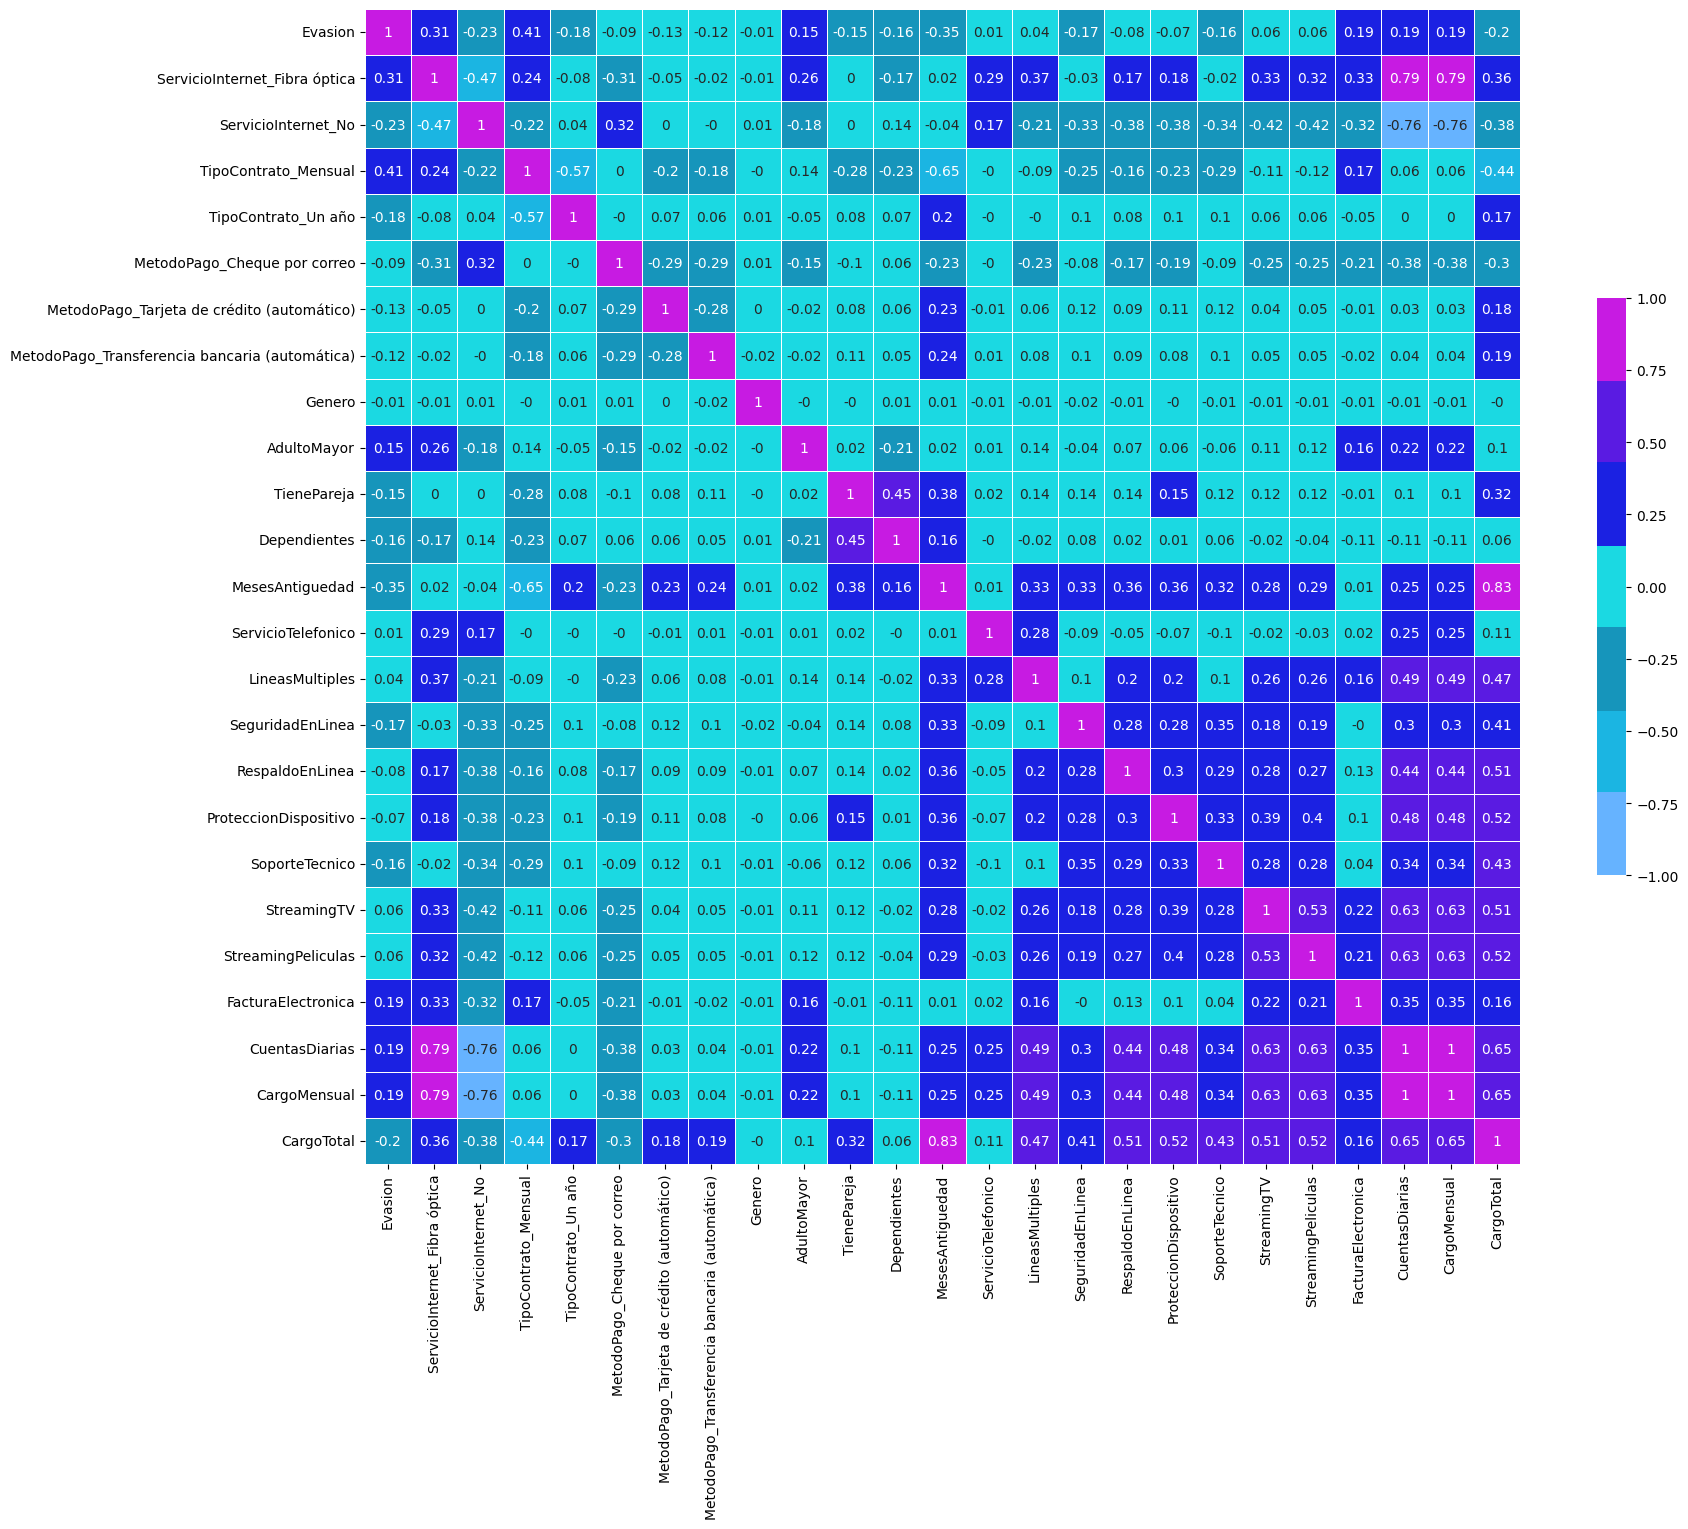

In [171]:
from matplotlib.colors import ListedColormap, BoundaryNorm

cmap_bloques = ListedColormap(colores)

fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(
    np.round(correlacion, 2),
    vmax=1, vmin=-1, center=0,
    square=True, linewidths=.5, annot=True,
    cmap=cmap_bloques, cbar_kws={"shrink": .5}
)
plt.show()

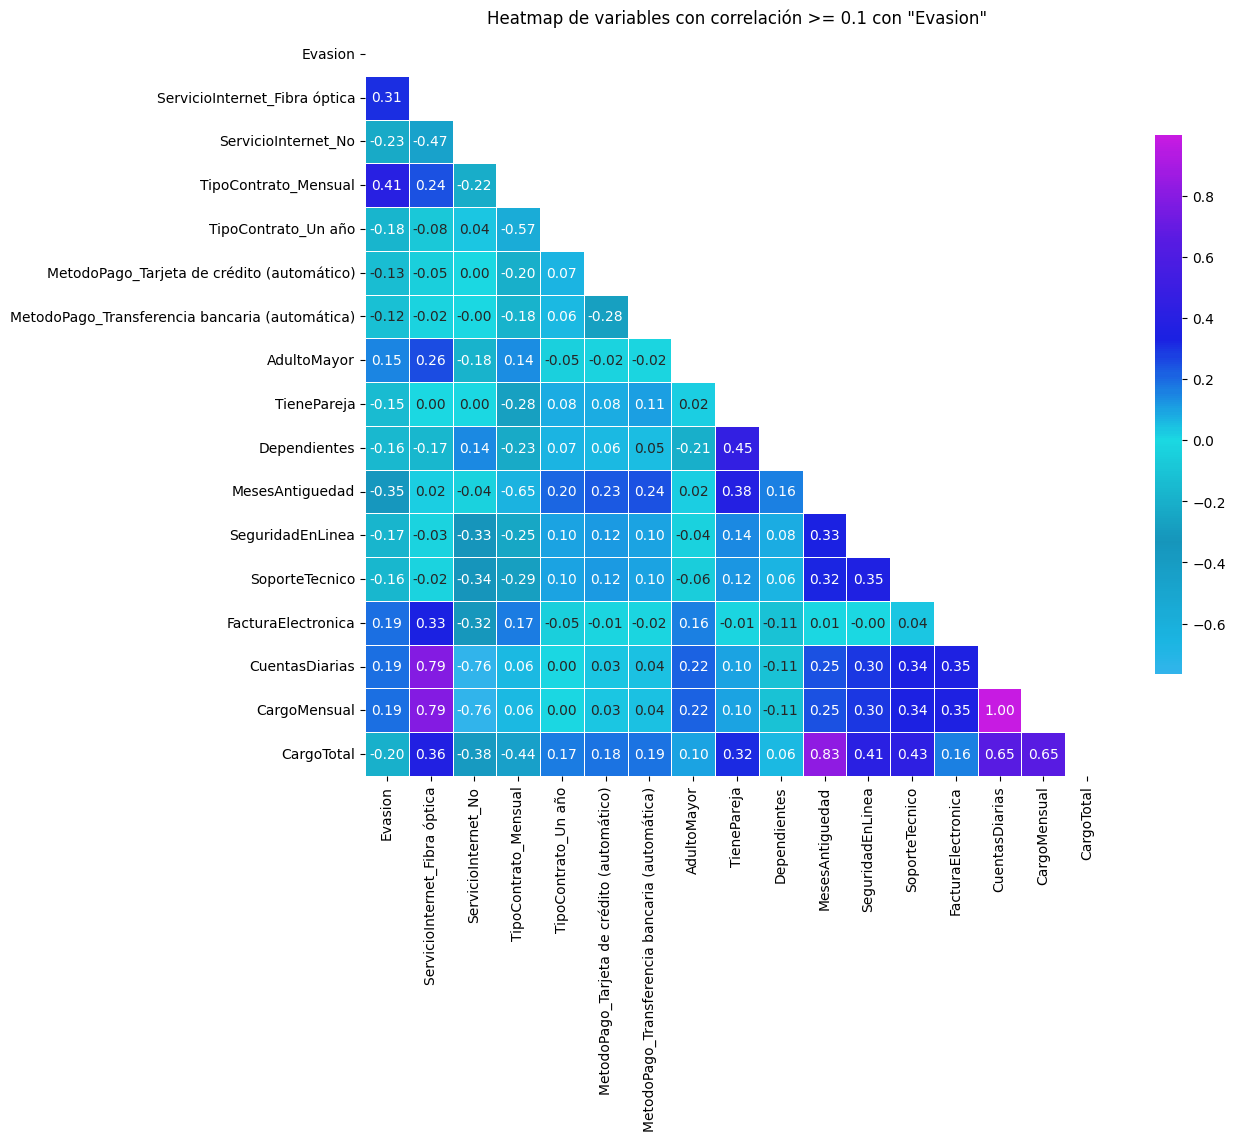

In [184]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# Paleta personalizada en orden de intensidad
cmap_personalizado = LinearSegmentedColormap.from_list("mi_paleta", colores, N=256)

# Variable objetivo
variable_objetivo = 'Evasion'

# Definir el umbral mínimo de correlación absoluta para selección
limite = 0.1

# Filtrar variables que tengan correlación absoluta >= umbral con la variable objetivo
variables_relevantes = correlacion.index[abs(correlacion[variable_objetivo]) >= limite].tolist()

# Asegurar que la variable objetivo esté en la lista (si no está, añadirla)
if variable_objetivo not in variables_relevantes:
    variables_relevantes.append(variable_objetivo)

# Crear una matriz de correlación solo con las variables seleccionadas
corr_filtrada = correlacion.loc[variables_relevantes, variables_relevantes]

# Generar una máscara para ocultar el triángulo superior de la matriz (incluida la diagonal)
mascara = np.triu(np.ones_like(corr_filtrada, dtype=bool))

# Graficar el heatmap con tu paleta de colores
plt.figure(figsize=(12,10))
sns.heatmap(
    corr_filtrada,
    annot=True,
    fmt=".2f",
    cmap=cmap_personalizado,  # << aquí se aplica tu paleta
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.7},
    mask=mascara
)
plt.title(f'Heatmap de variables con correlación >= {limite} con \"{variable_objetivo}\"')
plt.show()

**Relacionando Variables con variable 'Evasion'**

In [19]:
print(correlacion[variable_objetivo].abs().sort_values(ascending=False))

Evasion                                           1.000000
TipoContrato_Mensual                              0.405103
MesesAntiguedad                                   0.352229
ServicioInternet_Fibra óptica                     0.308020
ServicioInternet_No                               0.227890
CargoTotal                                        0.198324
CuentasDiarias                                    0.193412
CargoMensual                                      0.193356
FacturaElectronica                                0.191825
TipoContrato_Un año                               0.177820
SeguridadEnLinea                                  0.171226
SoporteTecnico                                    0.164674
Dependientes                                      0.164221
AdultoMayor                                       0.150889
TienePareja                                       0.150448
MetodoPago_Tarjeta de crédito (automático)        0.134302
MetodoPago_Transferencia bancaria (automática)    0.1179

In [20]:
datos_codificados[['CargoMensual', 'CuentasDiarias']].corr()

,CargoMensual,CuentasDiarias
CargoMensual,1.000000,0.999996
CuentasDiarias,0.999996,1.000000


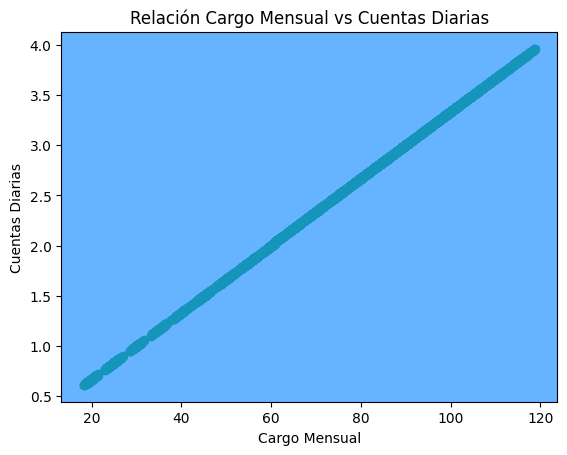

In [176]:
plt.scatter(datos_codificados['CargoMensual'],datos_codificados['CuentasDiarias'],color = color_3) #ejes x,y
plt.title('Relación Cargo Mensual vs Cuentas Diarias')
plt.xlabel('Cargo Mensual')
plt.ylabel('Cuentas Diarias')
plt.gca().set_facecolor(color_fondo_2)
plt.show()

In [23]:
datos_codificados[['CargoTotal', 'CuentasDiarias']].corr()

,CargoTotal,CuentasDiarias
CargoTotal,1.000000,0.651189
CuentasDiarias,0.651189,1.000000


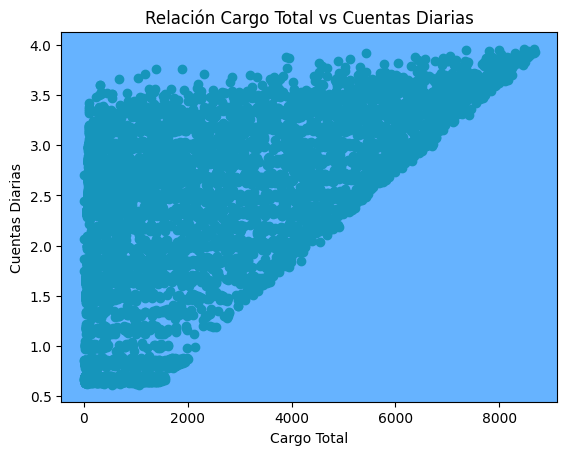

In [177]:
plt.scatter(datos_codificados['CargoTotal'],datos_codificados['CuentasDiarias'],color = color_3) #ejes x,y
plt.title('Relación Cargo Total vs Cuentas Diarias')
plt.xlabel('Cargo Total')
plt.ylabel('Cuentas Diarias')
plt.gca().set_facecolor(color_fondo_2)
plt.show()

In [25]:
datos_codificados[['MesesAntiguedad', 'CargoTotal']].corr()

,MesesAntiguedad,CargoTotal
MesesAntiguedad,1.000000,0.826178
CargoTotal,0.826178,1.000000


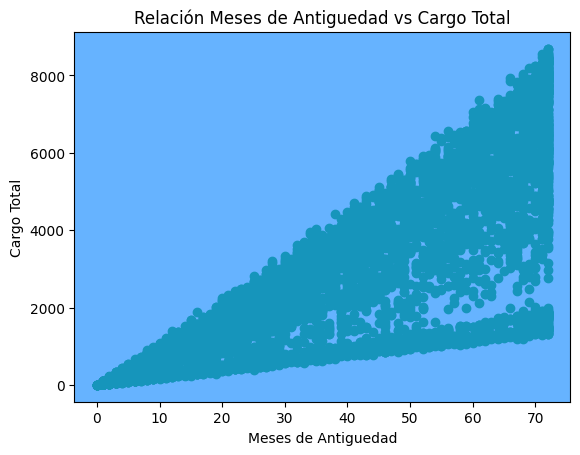

In [182]:
plt.scatter(datos_codificados['MesesAntiguedad'],datos_codificados['CargoTotal'],color = color_3) #ejes x,y
plt.title('Relación Meses de Antiguedad vs Cargo Total')
plt.xlabel('Meses de Antiguedad')
plt.ylabel('Cargo Total')
plt.gca().set_facecolor(color_fondo_2)
plt.show()

In [27]:
# Se omite la variable respuesta
predictores = datos_codificados.drop(columns='Evasion', errors='ignore')

# Matriz de correlación absoluta entre predictores
corr_pred = predictores.corr(numeric_only=True).abs()

# Quedarnos con el triángulo superior (sin diagonal)
upper = corr_pred.where(np.triu(np.ones_like(corr_pred, dtype=bool), k=1))

# Pares por encima del umbral
umbral_corr = 0.85
pareja_correlacion = (upper
    .stack()
    .reset_index()
    .rename(columns={'level_0':'col1','level_1':'col2', 0:'corr'})
    .query('corr >= @umbral_corr')
    .sort_values('corr', ascending=False)
)
pareja_correlacion

,col1,col2,corr
273,CuentasDiarias,CargoMensual,0.999996


### **Antiguedad 12 meses**

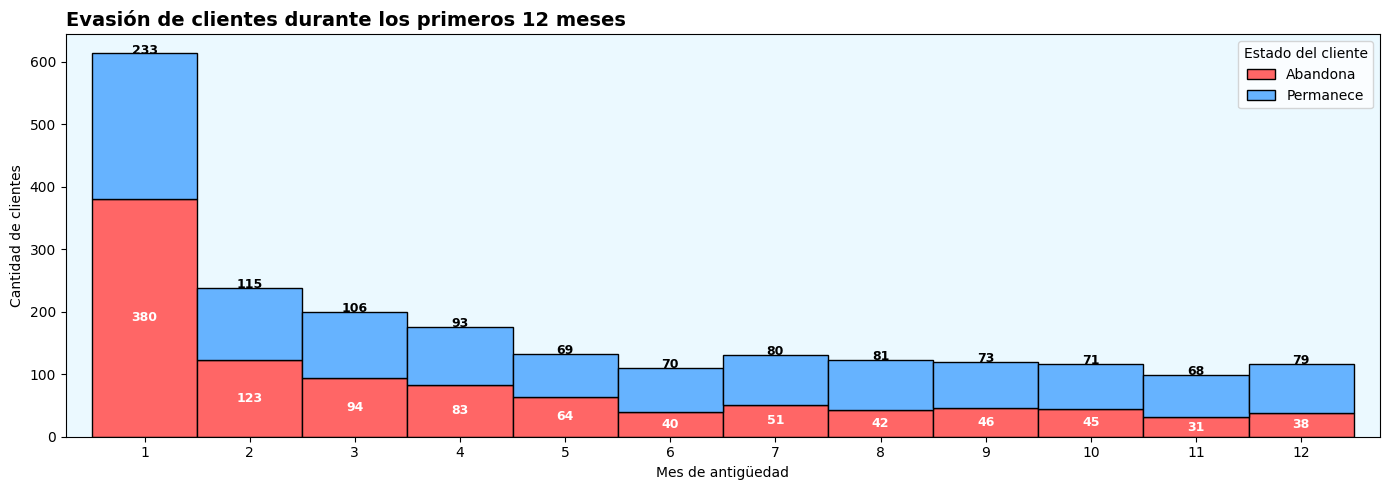

In [28]:
def evasion_antiguedad_12_meses():

    # Filtrar solo hasta el mes 12
    df_filtrado = datos[datos['MesesAntiguedad'].between(1, 12)]

    # Contar abandonos y permanencias por mes
    evasion = df_filtrado[df_filtrado['Evasion'] == 'Sí']['MesesAntiguedad'].value_counts().sort_index()
    no_evasion = df_filtrado[df_filtrado['Evasion'] == 'No']['MesesAntiguedad'].value_counts().sort_index()

    # Crear nuevo DataFrame
    comparativa = pd.DataFrame({
        'Abandona': [evasion.get(m, 0) for m in range(1, 13)],
        'Permanece': [no_evasion.get(m, 0) for m in range(1, 13)]
    }, index=range(1, 13))

    # Colores personalizados
    colores = [color_no, color_si]

    # Gráfico
    fig, ax = plt.subplots(figsize=(14, 5))
    comparativa.plot(
        kind='bar',
        stacked=True,
        color=colores,
        edgecolor='black',
        width=1,
        ax=ax
    )

    # Fondo
    ax.set_facecolor(color_interior)

    # Agregar etiquetas a las barras
    for i, mes in enumerate(comparativa.index):
        abandona = comparativa.loc[mes, 'Abandona']
        permanece = comparativa.loc[mes, 'Permanece']

        if abandona > 0:
            ax.text(i, abandona / 2, str(abandona), ha='center', va='center',
                    fontsize=9, fontweight='bold', color='white')

        if permanece > 0:
            ax.text(i, abandona + permanece - 5, str(permanece), ha='center', va='bottom',
                    fontsize=9, fontweight='bold', color='black')

    # Título y etiquetas
    ax.set_title('Evasión de clientes durante los primeros 12 meses', fontsize=14, fontweight='bold', loc='left')
    ax.set_ylabel('Cantidad de clientes')
    ax.set_xlabel('Mes de antigüedad')
    ax.set_xticks(range(0, 12))  # asegurar ticks
    ax.set_xticklabels([str(m) for m in range(1, 13)])
    plt.xticks(rotation=0)

    # Leyenda
    plt.legend(title='Estado del cliente', loc='upper right')

    plt.tight_layout()
    return plt

# Para llamar la función
evasion_antiguedad_12_meses().show()

### **Verificación de la proporción (de la variable respuesta)**

#### **Variable Respuesta (Evasion)**

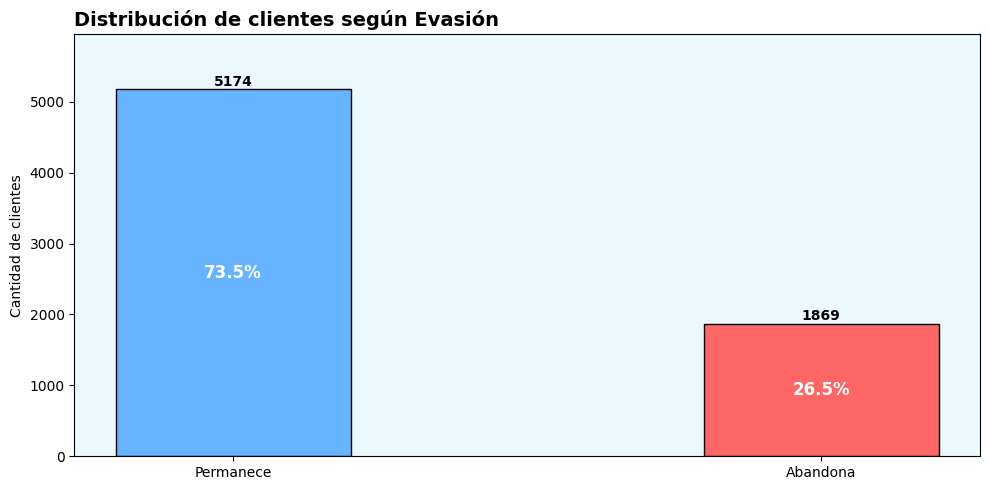

In [29]:
# Evasión
def comparativa_evasion():
    orden = ['No', 'Sí']   # en tu dataset original Evasion es Sí/No
    mapa_ev = {'Sí': 'Abandona', 'No': 'Permanece'}

    tabla = (
        datos.groupby(['Evasion'])
             .size()
             .rename(index=mapa_ev)
             .reindex(['Permanece','Abandona'])
             .to_frame(name='Cantidad')
    )

    tot = tabla['Cantidad'].sum()
    pct = (tabla['Cantidad'] / tot * 100).round(1)

    fig, ax = plt.subplots(figsize=(10, 5))
    x = np.arange(len(tabla)); w = 0.4

    bars = ax.bar(x, tabla['Cantidad'], w, color=[color_si, color_no], edgecolor='black')

    ax.set_title('Distribución de clientes según Evasión', fontsize=14, fontweight='bold', loc='left')
    ax.set_ylabel('Cantidad de clientes')
    ax.set_xticks(x); ax.set_xticklabels(tabla.index)
    ax.set_facecolor(color_interior)

    for i, bar in enumerate(bars):
        h = bar.get_height()
        ax.text(bar.get_x()+bar.get_width()/2, h+10, f'{int(h)}', ha='center', va='bottom',
                fontsize=10, fontweight='bold')
        ax.text(bar.get_x()+bar.get_width()/2, h/2, f'{pct.iloc[i]}%', ha='center', va='center',
                color='white', fontsize=12, fontweight='bold')

    ax.set_ylim(0, tabla['Cantidad'].max()*1.15)
    plt.tight_layout()
    return plt

comparativa_evasion().show()

In [30]:
cantidad_evasion = datos_codificados.Evasion.value_counts()
proporcion_evasion = datos_codificados['Evasion'].value_counts(normalize=True).sort_index()

print(f'De un total de {datos_codificados["Evasion"].size} clientes.')
print(f'Los clientes que abandonan son: {cantidad_evasion[1].sum()}, equivalentes al {proporcion_evasion[1]:.2%}')
print(f'Los clientes que permanecen son: {cantidad_evasion[0].sum()}, equivalentes al {proporcion_evasion[0]:.2%}')

De un total de 7043 clientes.
Los clientes que abandonan son: 1869, equivalentes al 26.54%
Los clientes que permanecen son: 5174, equivalentes al 73.46%


---
>* **Se observa una diferencia significativa entre la cantidad de clientes que permanecen y aquellos que abandonan el servicio. Aunque la mayoría de los clientes se mantiene, el porcentaje de evasión alcanza un 26.54%, lo cual representa una proporción bastante considerable.**

---

### **Análisis Exploratorio de variables categóricas y numéricas**

#### **Variables Categóricas**

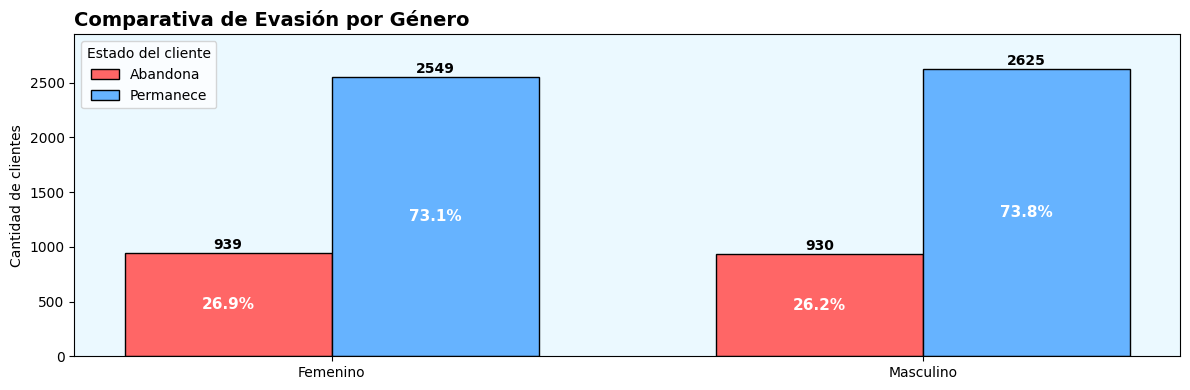

In [31]:
# Género

def comparativa_genero():

    orden_gen = ['Femenino', 'Masculino']
    mapa_ev  = {'Sí': 'Abandona', 'No': 'Permanece'}

    tabla = (
        datos.groupby(['Genero', 'Evasion'])
             .size()
             .unstack(fill_value=0)
             .rename(columns=mapa_ev)
             .reindex(orden_gen)
    )


    totales = tabla.sum(axis=1)
    pct_ab  = (tabla['Abandona']  / totales * 100).round(1)
    pct_per = (tabla['Permanece'] / totales * 100).round(1)

    fig, ax = plt.subplots(figsize=(12, 4))
    x = np.arange(len(orden_gen))
    width = 0.35

    b1 = ax.bar(x - width/2, tabla['Abandona'],  width,
                color=color_no, edgecolor='black', label='Abandona')
    b2 = ax.bar(x + width/2, tabla['Permanece'], width,
                color=color_si, edgecolor='black', label='Permanece')

    ax.set_title('Comparativa de Evasión por Género', fontsize=14, fontweight='bold', loc='left')
    ax.set_ylabel('Cantidad de clientes')
    ax.set_xticks(x)
    ax.set_xticklabels(orden_gen)
    ax.set_facecolor(color_interior)
    ax.legend(title='Estado del cliente', loc='upper left')

    for bar in list(b1) + list(b2):
        h = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, h + 10, f'{int(h)}',
                ha='center', va='bottom', fontsize=10, fontweight='bold')


    for i, bar in enumerate(b1):
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height()/2, f'{pct_ab.iloc[i]}%',
                ha='center', va='center', color='white', fontsize=11, fontweight='bold')

    for i, bar in enumerate(b2):
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height()/2, f'{pct_per.iloc[i]}%',
                ha='center', va='center', color='white', fontsize=11, fontweight='bold')

    ax.set_ylim(0, (tabla.values.max()*1.12))
    plt.tight_layout()
    return plt

comparativa_genero().show()

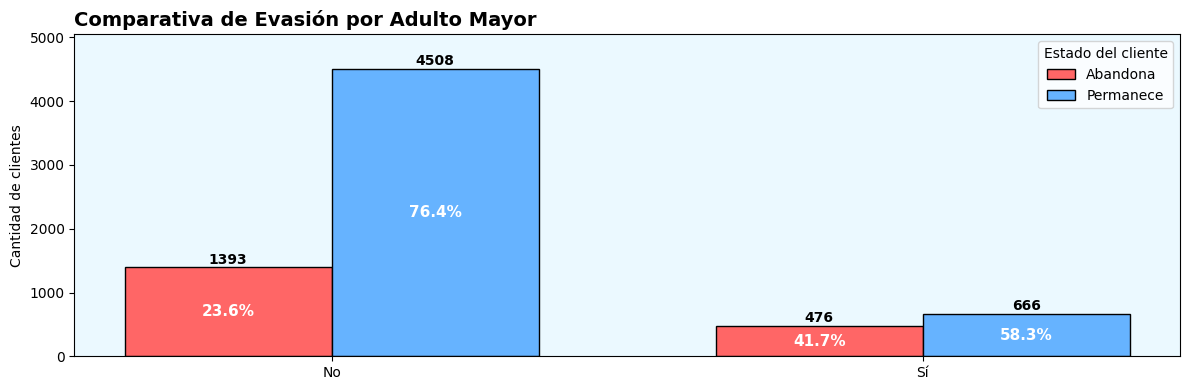

In [32]:
# Adulto Mayor

def comparativa_adulto_mayor():
    orden = ['No', 'Sí']
    mapa_ev = {'Sí': 'Abandona', 'No': 'Permanece'}

    tabla = (
        datos.groupby(['AdultoMayor', 'Evasion'])
             .size()
             .unstack(fill_value=0)
             .rename(columns=mapa_ev)
             .reindex(orden)
    )

    tot = tabla.sum(axis=1)
    pct_ab  = (tabla['Abandona']  / tot * 100).round(1)
    pct_per = (tabla['Permanece'] / tot * 100).round(1)

    fig, ax = plt.subplots(figsize=(12, 4))
    x = np.arange(len(orden)); w = 0.35

    b1 = ax.bar(x - w/2, tabla['Abandona'],  w, color=color_no, edgecolor='black', label='Abandona')
    b2 = ax.bar(x + w/2, tabla['Permanece'], w, color=color_si, edgecolor='black', label='Permanece')

    ax.set_title('Comparativa de Evasión por Adulto Mayor', fontsize=14, fontweight='bold', loc='left')
    ax.set_ylabel('Cantidad de clientes')
    ax.set_xticks(x); ax.set_xticklabels(orden)
    ax.set_facecolor(color_interior)
    ax.legend(title='Estado del cliente', loc='upper right')

    for bar in list(b1)+list(b2):
        h = bar.get_height()
        ax.text(bar.get_x()+bar.get_width()/2, h+10, f'{int(h)}', ha='center', va='bottom', fontsize=10, fontweight='bold')

    for i, bar in enumerate(b1):
        ax.text(bar.get_x()+bar.get_width()/2, bar.get_height()/2, f'{pct_ab.iloc[i]}%', ha='center', va='center',
                color='white', fontsize=11, fontweight='bold')
    for i, bar in enumerate(b2):
        ax.text(bar.get_x()+bar.get_width()/2, bar.get_height()/2, f'{pct_per.iloc[i]}%', ha='center', va='center',
                color='white', fontsize=11, fontweight='bold')

    ax.set_ylim(0, (tabla.values.max()*1.12))
    plt.tight_layout()
    return plt

comparativa_adulto_mayor().show()

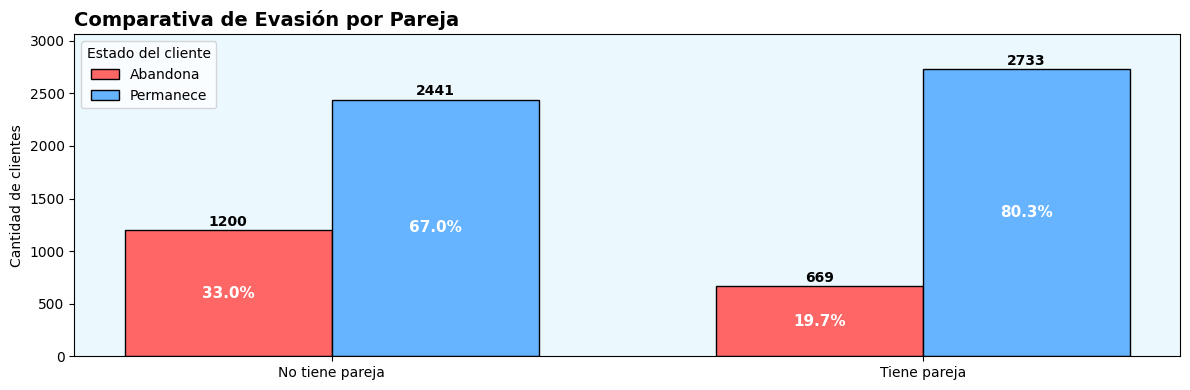

In [33]:
# Tiene Pareja

def comparativa_tiene_pareja():
    orden = ['No', 'Sí']
    mapa_ev = {'Sí': 'Abandona', 'No': 'Permanece'}

    tabla = (
        datos.groupby(['TienePareja', 'Evasion'])
             .size()
             .unstack(fill_value=0)
             .rename(columns=mapa_ev)
             .reindex(orden)
    )

    tot = tabla.sum(axis=1)
    pct_ab  = (tabla['Abandona']  / tot * 100).round(1)
    pct_per = (tabla['Permanece'] / tot * 100).round(1)

    fig, ax = plt.subplots(figsize=(12, 4))
    x = np.arange(len(orden)); w = 0.35

    b1 = ax.bar(x - w/2, tabla['Abandona'],  w, color=color_no, edgecolor='black', label='Abandona')
    b2 = ax.bar(x + w/2, tabla['Permanece'], w, color=color_si, edgecolor='black', label='Permanece')

    ax.set_title('Comparativa de Evasión por Pareja', fontsize=14, fontweight='bold', loc='left')
    ax.set_ylabel('Cantidad de clientes')
    ax.set_xticks(x); ax.set_xticklabels(['No tiene pareja', 'Tiene pareja'])
    ax.set_facecolor(color_interior)
    ax.legend(title='Estado del cliente', loc='upper left')

    for bar in list(b1)+list(b2):
        h = bar.get_height()
        ax.text(bar.get_x()+bar.get_width()/2, h+10, f'{int(h)}', ha='center', va='bottom', fontsize=10, fontweight='bold')

    for i, bar in enumerate(b1):
        ax.text(bar.get_x()+bar.get_width()/2, bar.get_height()/2, f'{pct_ab.iloc[i]}%', ha='center', va='center',
                color='white', fontsize=11, fontweight='bold')
    for i, bar in enumerate(b2):
        ax.text(bar.get_x()+bar.get_width()/2, bar.get_height()/2, f'{pct_per.iloc[i]}%', ha='center', va='center',
                color='white', fontsize=11, fontweight='bold')

    ax.set_ylim(0, (tabla.values.max()*1.12))
    plt.tight_layout()
    return plt

comparativa_tiene_pareja().show()

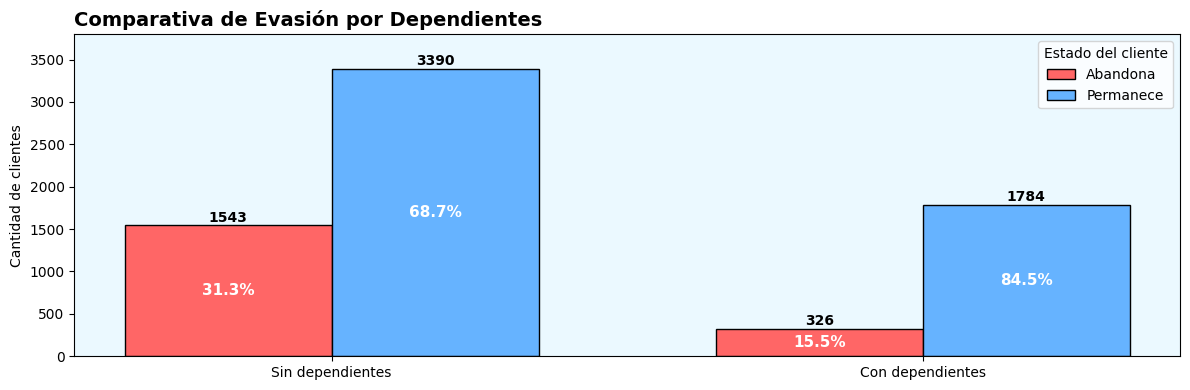

In [34]:
# Dependientes

def comparativa_dependientes():
    orden = ['No', 'Sí']
    mapa_ev = {'Sí': 'Abandona', 'No': 'Permanece'}

    tabla = (
        datos.groupby(['Dependientes', 'Evasion'])
             .size()
             .unstack(fill_value=0)
             .rename(columns=mapa_ev)
             .reindex(orden)
    )

    tot = tabla.sum(axis=1)
    pct_ab  = (tabla['Abandona']  / tot * 100).round(1)
    pct_per = (tabla['Permanece'] / tot * 100).round(1)

    fig, ax = plt.subplots(figsize=(12, 4))
    x = np.arange(len(orden)); w = 0.35

    b1 = ax.bar(x - w/2, tabla['Abandona'],  w, color=color_no, edgecolor='black', label='Abandona')
    b2 = ax.bar(x + w/2, tabla['Permanece'], w, color=color_si, edgecolor='black', label='Permanece')

    ax.set_title('Comparativa de Evasión por Dependientes', fontsize=14, fontweight='bold', loc='left')
    ax.set_ylabel('Cantidad de clientes')
    ax.set_xticks(x); ax.set_xticklabels(['Sin dependientes', 'Con dependientes'])
    ax.set_facecolor(color_interior)
    ax.legend(title='Estado del cliente', loc='upper right')

    for bar in list(b1)+list(b2):
        h = bar.get_height()
        ax.text(bar.get_x()+bar.get_width()/2, h+10, f'{int(h)}', ha='center', va='bottom', fontsize=10, fontweight='bold')

    for i, bar in enumerate(b1):
        ax.text(bar.get_x()+bar.get_width()/2, bar.get_height()/2, f'{pct_ab.iloc[i]}%', ha='center', va='center',
                color='white', fontsize=11, fontweight='bold')
    for i, bar in enumerate(b2):
        ax.text(bar.get_x()+bar.get_width()/2, bar.get_height()/2, f'{pct_per.iloc[i]}%', ha='center', va='center',
                color='white', fontsize=11, fontweight='bold')

    ax.set_ylim(0, (tabla.values.max()*1.12))
    plt.tight_layout()
    return plt


comparativa_dependientes().show()

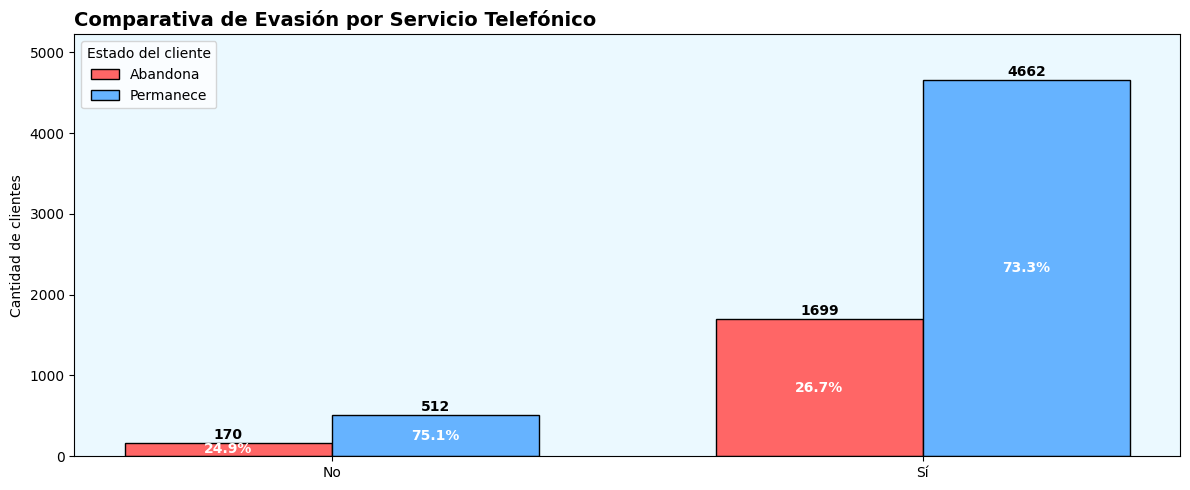

In [35]:
# Servicio Telefónico

def comparativa_servicio_telefonico():
    orden = ['No', 'Sí']  # si existieran otras etiquetas, se agregan al final
    presentes = [c for c in datos['ServicioTelefonico'].unique() if c not in orden]
    orden = orden + presentes

    mapa_ev = {'Sí': 'Abandona', 'No': 'Permanece'}

    tabla = (
        datos.groupby(['ServicioTelefonico', 'Evasion'])
             .size()
             .unstack(fill_value=0)
             .rename(columns=mapa_ev)
             .reindex(orden)
    )

    tot = tabla.sum(axis=1).replace(0, np.nan)
    pct_ab  = (tabla['Abandona']  / tot * 100).round(1)
    pct_per = (tabla['Permanece'] / tot * 100).round(1)

    fig, ax = plt.subplots(figsize=(12, 5))
    x = np.arange(len(tabla)); w = 0.35

    b1 = ax.bar(x - w/2, tabla['Abandona'],  w, color=color_no, edgecolor='black', label='Abandona')
    b2 = ax.bar(x + w/2, tabla['Permanece'], w, color=color_si, edgecolor='black', label='Permanece')

    ax.set_title('Comparativa de Evasión por Servicio Telefónico', fontsize=14, fontweight='bold', loc='left')
    ax.set_ylabel('Cantidad de clientes')
    ax.set_xticks(x); ax.set_xticklabels(orden)
    ax.set_facecolor(color_interior)
    ax.legend(title='Estado del cliente', loc='upper left')

    for bar in list(b1)+list(b2):
        h = bar.get_height()
        ax.text(bar.get_x()+bar.get_width()/2, h+10, f'{int(h)}', ha='center', va='bottom', fontsize=10, fontweight='bold')

    for i, bar in enumerate(b1):
        if not np.isnan(pct_ab.iloc[i]):
            ax.text(bar.get_x()+bar.get_width()/2, bar.get_height()/2, f'{pct_ab.iloc[i]}%', ha='center', va='center',
                    color='white', fontsize=10, fontweight='bold')
    for i, bar in enumerate(b2):
        if not np.isnan(pct_per.iloc[i]):
            ax.text(bar.get_x()+bar.get_width()/2, bar.get_height()/2, f'{pct_per.iloc[i]}%', ha='center', va='center',
                    color='white', fontsize=10, fontweight='bold')

    ax.set_ylim(0, (tabla.values.max()*1.12))
    plt.tight_layout()
    return plt

comparativa_servicio_telefonico().show()

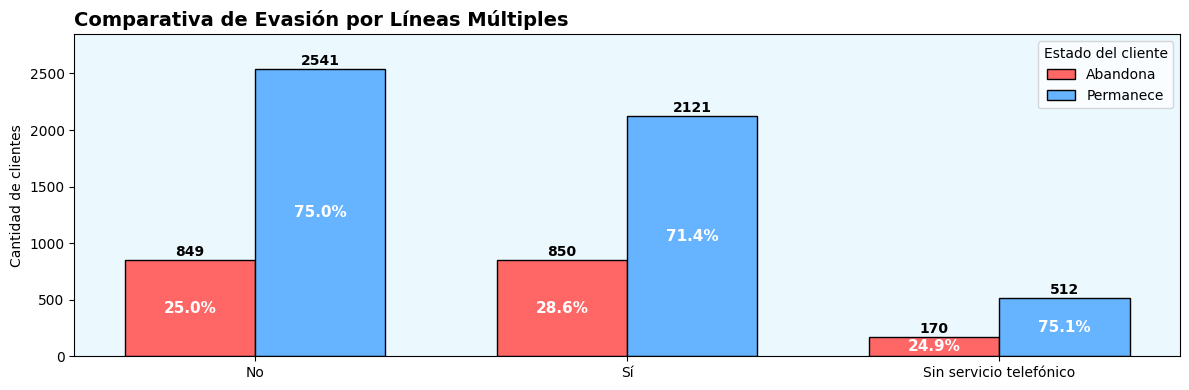

In [36]:
# Líneas Múltiples

def comparativa_lineas_multiples():

    orden_pref = ['No', 'Sí']
    extra = [c for c in datos['LineasMultiples'].unique() if c not in orden_pref]
    orden = orden_pref + extra

    mapa_ev = {'Sí': 'Abandona', 'No': 'Permanece'}

    tabla = (
        datos.groupby(['LineasMultiples', 'Evasion'])
             .size()
             .unstack(fill_value=0)
             .rename(columns=mapa_ev)
             .reindex(orden)
    )

    tot = tabla.sum(axis=1).replace(0, np.nan)
    pct_ab  = (tabla['Abandona']  / tot * 100).round(1)
    pct_per = (tabla['Permanece'] / tot * 100).round(1)

    fig, ax = plt.subplots(figsize=(12, 4))
    x = np.arange(len(tabla)); w = 0.35

    b1 = ax.bar(x - w/2, tabla['Abandona'],  w, color=color_no, edgecolor='black', label='Abandona')
    b2 = ax.bar(x + w/2, tabla['Permanece'], w, color=color_si, edgecolor='black', label='Permanece')

    ax.set_title('Comparativa de Evasión por Líneas Múltiples', fontsize=14, fontweight='bold', loc='left')
    ax.set_ylabel('Cantidad de clientes')
    ax.set_xticks(x); ax.set_xticklabels(orden)
    ax.set_facecolor(color_interior)
    ax.legend(title='Estado del cliente', loc='upper right')

    for bar in list(b1)+list(b2):
        h = bar.get_height()
        ax.text(bar.get_x()+bar.get_width()/2, h+10, f'{int(h)}', ha='center', va='bottom', fontsize=10, fontweight='bold')

    for i, bar in enumerate(b1):
        if not np.isnan(pct_ab.iloc[i]):
            ax.text(bar.get_x()+bar.get_width()/2, bar.get_height()/2, f'{pct_ab.iloc[i]}%', ha='center', va='center',
                    color='white', fontsize=11, fontweight='bold')
    for i, bar in enumerate(b2):
        if not np.isnan(pct_per.iloc[i]):
            ax.text(bar.get_x()+bar.get_width()/2, bar.get_height()/2, f'{pct_per.iloc[i]}%', ha='center', va='center',
                    color='white', fontsize=11, fontweight='bold')

    ax.set_ylim(0, (tabla.values.max()*1.12))
    plt.tight_layout()
    return plt

comparativa_lineas_multiples().show()

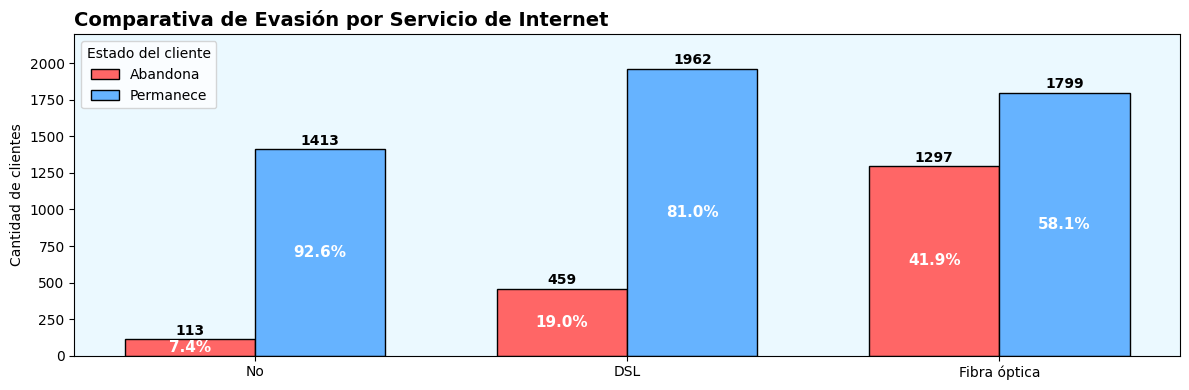

In [37]:
# Servicio de Internet

def comparativa_servicio_internet():

    orden_pref = ['No', 'DSL', 'Fibra óptica']
    presentes = list(datos['ServicioInternet'].dropna().unique())
    orden = [c for c in orden_pref if c in presentes] + [c for c in presentes if c not in orden_pref]

    mapa_ev = {'Sí': 'Abandona', 'No': 'Permanece'}

    tabla = (
        datos.groupby(['ServicioInternet', 'Evasion'])
             .size()
             .unstack(fill_value=0)
             .rename(columns=mapa_ev)
             .reindex(orden)
    )

    tot = tabla.sum(axis=1).replace(0, np.nan)
    pct_ab  = (tabla['Abandona']  / tot * 100).round(1)
    pct_per = (tabla['Permanece'] / tot * 100).round(1)

    fig, ax = plt.subplots(figsize=(12, 4))
    x = np.arange(len(tabla)); w = 0.35

    b1 = ax.bar(x - w/2, tabla['Abandona'],  w, color=color_no, edgecolor='black', label='Abandona')
    b2 = ax.bar(x + w/2, tabla['Permanece'], w, color=color_si, edgecolor='black', label='Permanece')

    ax.set_title('Comparativa de Evasión por Servicio de Internet', fontsize=14, fontweight='bold', loc='left')
    ax.set_ylabel('Cantidad de clientes')
    ax.set_xticks(x); ax.set_xticklabels(orden)
    ax.set_facecolor(color_interior)
    ax.legend(title='Estado del cliente', loc='upper left')

    for bar in list(b1)+list(b2):
        h = bar.get_height()
        ax.text(bar.get_x()+bar.get_width()/2, h+10, f'{int(h)}', ha='center', va='bottom', fontsize=10, fontweight='bold')

    for i, bar in enumerate(b1):
        if not np.isnan(pct_ab.iloc[i]):
            ax.text(bar.get_x()+bar.get_width()/2, bar.get_height()/2, f'{pct_ab.iloc[i]}%', ha='center', va='center',
                    color='white', fontsize=11, fontweight='bold')
    for i, bar in enumerate(b2):
        if not np.isnan(pct_per.iloc[i]):
            ax.text(bar.get_x()+bar.get_width()/2, bar.get_height()/2, f'{pct_per.iloc[i]}%', ha='center', va='center',
                    color='white', fontsize=11, fontweight='bold')

    ax.set_ylim(0, (tabla.values.max()*1.12))
    plt.tight_layout()
    return plt

comparativa_servicio_internet().show()

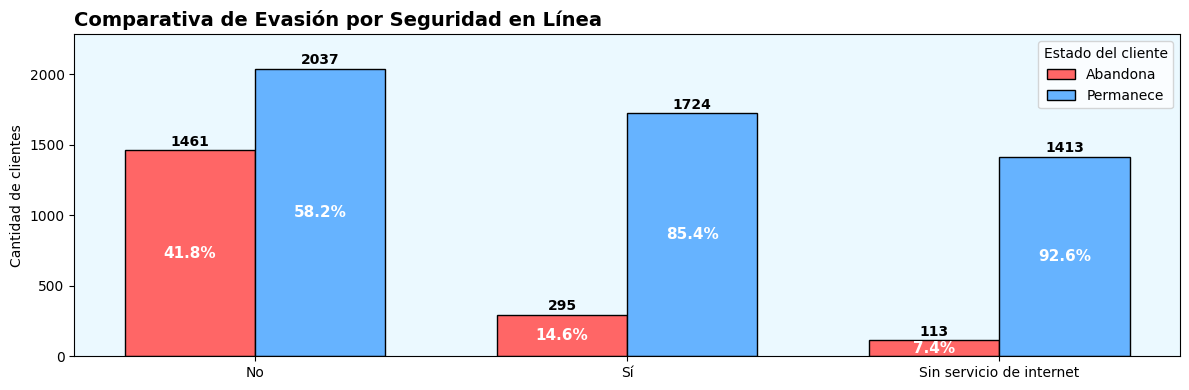

In [38]:
# Seguridad en Línea

def comparativa_seguridad_en_linea():
    orden = ['No', 'Sí', 'Sin servicio de internet']
    mapa_ev = {'Sí': 'Abandona', 'No': 'Permanece'}

    presentes = [c for c in datos['SeguridadEnLinea'].unique() if c not in orden]
    orden = [c for c in orden if c in datos['SeguridadEnLinea'].unique()] + presentes

    tabla = (datos.groupby(['SeguridadEnLinea','Evasion'])
                  .size()
                  .unstack(fill_value=0)
                  .rename(columns=mapa_ev)
                  .reindex(orden))
    tot = tabla.sum(axis=1).replace(0, np.nan)
    pct_ab  = (tabla['Abandona']  / tot * 100).round(1)
    pct_per = (tabla['Permanece'] / tot * 100).round(1)

    fig, ax = plt.subplots(figsize=(12,4))
    x = np.arange(len(orden)); w = 0.35
    b1 = ax.bar(x - w/2, tabla['Abandona'],  w, color=color_no, edgecolor='black', label='Abandona')
    b2 = ax.bar(x + w/2, tabla['Permanece'], w, color=color_si, edgecolor='black', label='Permanece')

    ax.set_title('Comparativa de Evasión por Seguridad en Línea', fontsize=14, fontweight='bold', loc='left')
    ax.set_ylabel('Cantidad de clientes')
    ax.set_xticks(x); ax.set_xticklabels(orden)
    ax.set_facecolor(color_interior); ax.legend(title='Estado del cliente', loc='upper right')

    for bar in list(b1)+list(b2):
        h = bar.get_height(); ax.text(bar.get_x()+bar.get_width()/2, h+10, f'{int(h)}',
                                      ha='center', va='bottom', fontsize=10, fontweight='bold')
    for i, bar in enumerate(b1):
        if not np.isnan(pct_ab.iloc[i]):
            ax.text(bar.get_x()+bar.get_width()/2, bar.get_height()/2, f'{pct_ab.iloc[i]}%',
                    ha='center', va='center', color='white', fontsize=11, fontweight='bold')
    for i, bar in enumerate(b2):
        if not np.isnan(pct_per.iloc[i]):
            ax.text(bar.get_x()+bar.get_width()/2, bar.get_height()/2, f'{pct_per.iloc[i]}%',
                    ha='center', va='center', color='white', fontsize=11, fontweight='bold')

    ax.set_ylim(0, (tabla.values.max()*1.12))
    plt.tight_layout()
    return plt

comparativa_seguridad_en_linea().show()

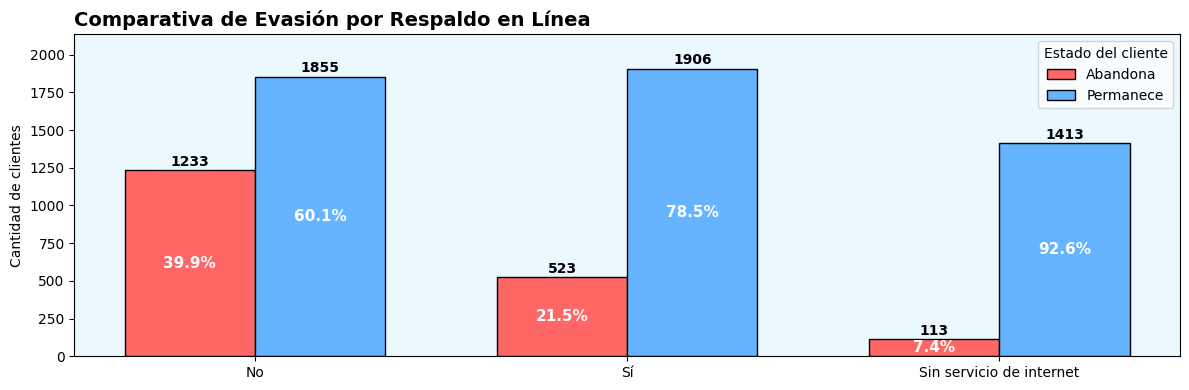

In [39]:
# Respaldo en Línea

def comparativa_respaldo_en_linea():
    orden = ['No', 'Sí', 'Sin servicio de internet']
    mapa_ev = {'Sí':'Abandona','No':'Permanece'}

    presentes = [c for c in datos['RespaldoEnLinea'].unique() if c not in orden]
    orden = [c for c in orden if c in datos['RespaldoEnLinea'].unique()] + presentes

    tabla = (datos.groupby(['RespaldoEnLinea','Evasion'])
                  .size()
                  .unstack(fill_value=0)
                  .rename(columns=mapa_ev)
                  .reindex(orden))
    tot = tabla.sum(axis=1).replace(0,np.nan)
    pct_ab  = (tabla['Abandona']/tot*100).round(1)
    pct_per = (tabla['Permanece']/tot*100).round(1)

    fig, ax = plt.subplots(figsize=(12,4))
    x = np.arange(len(orden)); w=0.35
    b1=ax.bar(x-w/2, tabla['Abandona'], w, color=color_no, edgecolor='black', label='Abandona')
    b2=ax.bar(x+w/2, tabla['Permanece'], w, color=color_si, edgecolor='black', label='Permanece')

    ax.set_title('Comparativa de Evasión por Respaldo en Línea', fontsize=14, fontweight='bold', loc='left')
    ax.set_ylabel('Cantidad de clientes'); ax.set_xticks(x); ax.set_xticklabels(orden)
    ax.set_facecolor(color_interior); ax.legend(title='Estado del cliente', loc='upper right')

    for bar in list(b1)+list(b2):
        h=bar.get_height(); ax.text(bar.get_x()+bar.get_width()/2, h+10, f'{int(h)}',
                                    ha='center', va='bottom', fontsize=10, fontweight='bold')
    for i, bar in enumerate(b1):
        if not np.isnan(pct_ab.iloc[i]):
            ax.text(bar.get_x()+bar.get_width()/2, bar.get_height()/2, f'{pct_ab.iloc[i]}%',
                    ha='center', va='center', color='white', fontsize=11, fontweight='bold')
    for i, bar in enumerate(b2):
        if not np.isnan(pct_per.iloc[i]):
            ax.text(bar.get_x()+bar.get_width()/2, bar.get_height()/2, f'{pct_per.iloc[i]}%',
                    ha='center', va='center', color='white', fontsize=11, fontweight='bold')

    ax.set_ylim(0, (tabla.values.max()*1.12))
    plt.tight_layout()
    return plt

comparativa_respaldo_en_linea().show()

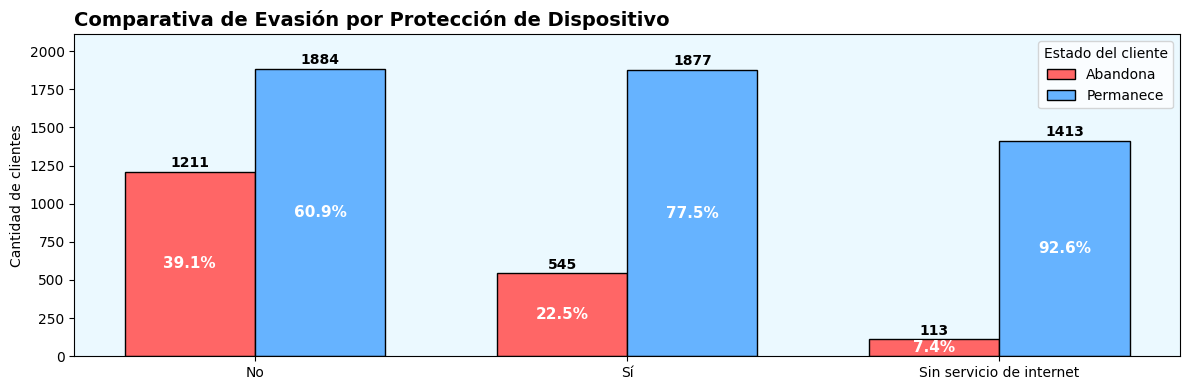

In [40]:
# Protección de Dispositivo

def comparativa_proteccion_dispositivo():
    orden=['No','Sí','Sin servicio de internet']
    mapa_ev={'Sí':'Abandona','No':'Permanece'}

    presentes = [c for c in datos['ProteccionDispositivo'].unique() if c not in orden]
    orden = [c for c in orden if c in datos['ProteccionDispositivo'].unique()] + presentes

    tabla=(datos.groupby(['ProteccionDispositivo','Evasion']).size().unstack(fill_value=0)
             .rename(columns=mapa_ev).reindex(orden))
    tot=tabla.sum(axis=1).replace(0,np.nan)
    pct_ab=(tabla['Abandona']/tot*100).round(1); pct_per=(tabla['Permanece']/tot*100).round(1)

    fig, ax=plt.subplots(figsize=(12,4))
    x=np.arange(len(orden)); w=0.35
    b1=ax.bar(x-w/2, tabla['Abandona'], w, color=color_no, edgecolor='black', label='Abandona')
    b2=ax.bar(x+w/2, tabla['Permanece'], w, color=color_si, edgecolor='black', label='Permanece')

    ax.set_title('Comparativa de Evasión por Protección de Dispositivo', fontsize=14, fontweight='bold', loc='left')
    ax.set_ylabel('Cantidad de clientes'); ax.set_xticks(x); ax.set_xticklabels(orden)
    ax.set_facecolor(color_interior); ax.legend(title='Estado del cliente', loc='upper right')

    for bar in list(b1)+list(b2):
        h=bar.get_height(); ax.text(bar.get_x()+bar.get_width()/2, h+10, f'{int(h)}',
                                    ha='center', va='bottom', fontsize=10, fontweight='bold')
    for i, bar in enumerate(b1):
        if not np.isnan(pct_ab.iloc[i]):
            ax.text(bar.get_x()+bar.get_width()/2, bar.get_height()/2, f'{pct_ab.iloc[i]}%',
                    ha='center', va='center', color='white', fontsize=11, fontweight='bold')
    for i, bar in enumerate(b2):
        if not np.isnan(pct_per.iloc[i]):
            ax.text(bar.get_x()+bar.get_width()/2, bar.get_height()/2, f'{pct_per.iloc[i]}%',
                    ha='center', va='center', color='white', fontsize=11, fontweight='bold')

    ax.set_ylim(0, (tabla.values.max()*1.12))
    plt.tight_layout()
    return plt

comparativa_proteccion_dispositivo().show()

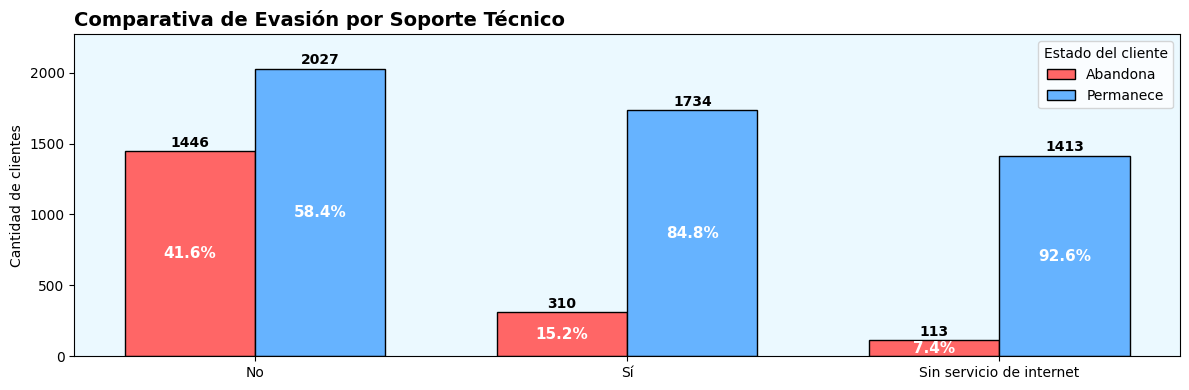

In [41]:
# Soporte Técnico

def comparativa_soporte_tecnico():
    orden=['No','Sí','Sin servicio de internet']
    mapa_ev={'Sí':'Abandona','No':'Permanece'}

    presentes = [c for c in datos['SoporteTecnico'].unique() if c not in orden]
    orden = [c for c in orden if c in datos['SoporteTecnico'].unique()] + presentes

    tabla=(datos.groupby(['SoporteTecnico','Evasion']).size().unstack(fill_value=0)
             .rename(columns=mapa_ev).reindex(orden))
    tot=tabla.sum(axis=1).replace(0,np.nan)
    pct_ab=(tabla['Abandona']/tot*100).round(1); pct_per=(tabla['Permanece']/tot*100).round(1)

    fig, ax=plt.subplots(figsize=(12,4))
    x=np.arange(len(orden)); w=0.35
    b1=ax.bar(x-w/2, tabla['Abandona'], w, color=color_no, edgecolor='black', label='Abandona')
    b2=ax.bar(x+w/2, tabla['Permanece'], w, color=color_si, edgecolor='black', label='Permanece')

    ax.set_title('Comparativa de Evasión por Soporte Técnico', fontsize=14, fontweight='bold', loc='left')
    ax.set_ylabel('Cantidad de clientes'); ax.set_xticks(x); ax.set_xticklabels(orden)
    ax.set_facecolor(color_interior); ax.legend(title='Estado del cliente', loc='upper right')

    for bar in list(b1)+list(b2):
        h=bar.get_height(); ax.text(bar.get_x()+bar.get_width()/2, h+10, f'{int(h)}',
                                    ha='center', va='bottom', fontsize=10, fontweight='bold')
    for i, bar in enumerate(b1):
        if not np.isnan(pct_ab.iloc[i]):
            ax.text(bar.get_x()+bar.get_width()/2, bar.get_height()/2, f'{pct_ab.iloc[i]}%',
                    ha='center', va='center', color='white', fontsize=11, fontweight='bold')
    for i, bar in enumerate(b2):
        if not np.isnan(pct_per.iloc[i]):
            ax.text(bar.get_x()+bar.get_width()/2, bar.get_height()/2, f'{pct_per.iloc[i]}%',
                    ha='center', va='center', color='white', fontsize=11, fontweight='bold')

    ax.set_ylim(0, (tabla.values.max()*1.12))
    plt.tight_layout()
    return plt

comparativa_soporte_tecnico().show()

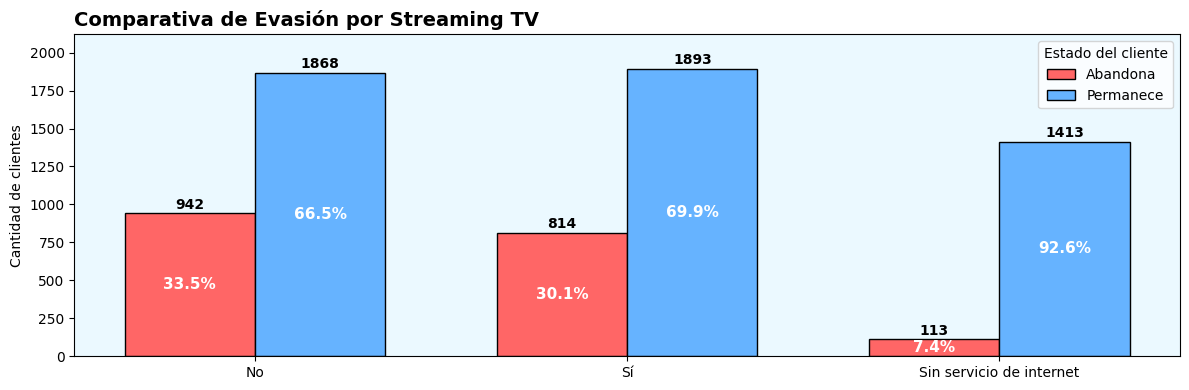

In [42]:
# Streaming TV

def comparativa_streaming_tv():
    orden=['No','Sí','Sin servicio de internet']
    mapa_ev={'Sí':'Abandona','No':'Permanece'}

    presentes = [c for c in datos['StreamingTV'].unique() if c not in orden]
    orden = [c for c in orden if c in datos['StreamingTV'].unique()] + presentes

    tabla=(datos.groupby(['StreamingTV','Evasion']).size().unstack(fill_value=0)
             .rename(columns=mapa_ev).reindex(orden))
    tot=tabla.sum(axis=1).replace(0,np.nan)
    pct_ab=(tabla['Abandona']/tot*100).round(1); pct_per=(tabla['Permanece']/tot*100).round(1)

    fig, ax=plt.subplots(figsize=(12,4))
    x=np.arange(len(orden)); w=0.35
    b1=ax.bar(x-w/2, tabla['Abandona'], w, color=color_no, edgecolor='black', label='Abandona')
    b2=ax.bar(x+w/2, tabla['Permanece'], w, color=color_si, edgecolor='black', label='Permanece')

    ax.set_title('Comparativa de Evasión por Streaming TV', fontsize=14, fontweight='bold', loc='left')
    ax.set_ylabel('Cantidad de clientes'); ax.set_xticks(x); ax.set_xticklabels(orden)
    ax.set_facecolor(color_interior); ax.legend(title='Estado del cliente', loc='upper right')

    for bar in list(b1)+list(b2):
        h=bar.get_height(); ax.text(bar.get_x()+bar.get_width()/2, h+10, f'{int(h)}',
                                    ha='center', va='bottom', fontsize=10, fontweight='bold')
    for i, bar in enumerate(b1):
        if not np.isnan(pct_ab.iloc[i]):
            ax.text(bar.get_x()+bar.get_width()/2, bar.get_height()/2, f'{pct_ab.iloc[i]}%',
                    ha='center', va='center', color='white', fontsize=11, fontweight='bold')
    for i, bar in enumerate(b2):
        if not np.isnan(pct_per.iloc[i]):
            ax.text(bar.get_x()+bar.get_width()/2, bar.get_height()/2, f'{pct_per.iloc[i]}%',
                    ha='center', va='center', color='white', fontsize=11, fontweight='bold')

    ax.set_ylim(0, (tabla.values.max()*1.12))
    plt.tight_layout()
    return plt

comparativa_streaming_tv().show()

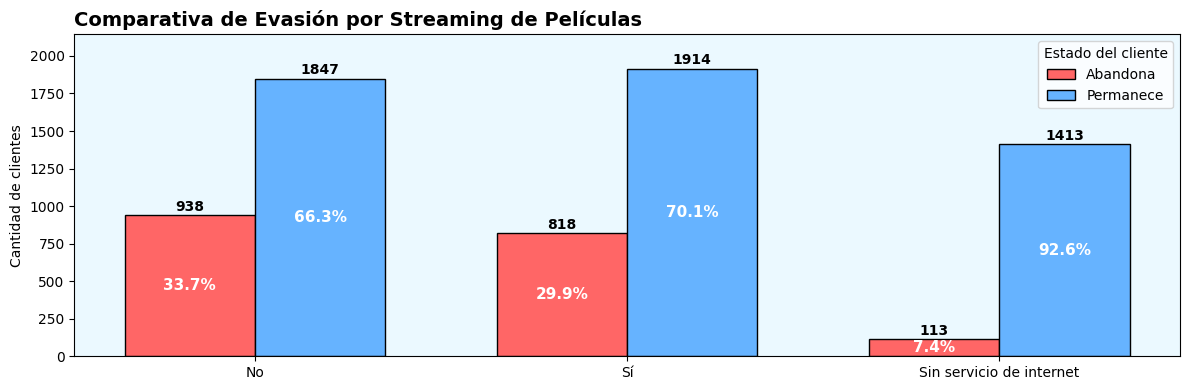

In [43]:
# Streaming Películas

def comparativa_streaming_peliculas():
    orden=['No','Sí','Sin servicio de internet']
    mapa_ev={'Sí':'Abandona','No':'Permanece'}

    presentes = [c for c in datos['StreamingPeliculas'].unique() if c not in orden]
    orden = [c for c in orden if c in datos['StreamingPeliculas'].unique()] + presentes

    tabla=(datos.groupby(['StreamingPeliculas','Evasion']).size().unstack(fill_value=0)
             .rename(columns=mapa_ev).reindex(orden))
    tot=tabla.sum(axis=1).replace(0,np.nan)
    pct_ab=(tabla['Abandona']/tot*100).round(1); pct_per=(tabla['Permanece']/tot*100).round(1)

    fig, ax=plt.subplots(figsize=(12,4))
    x=np.arange(len(orden)); w=0.35
    b1=ax.bar(x-w/2, tabla['Abandona'], w, color=color_no, edgecolor='black', label='Abandona')
    b2=ax.bar(x+w/2, tabla['Permanece'], w, color=color_si, edgecolor='black', label='Permanece')

    ax.set_title('Comparativa de Evasión por Streaming de Películas', fontsize=14, fontweight='bold', loc='left')
    ax.set_ylabel('Cantidad de clientes'); ax.set_xticks(x); ax.set_xticklabels(orden)
    ax.set_facecolor(color_interior); ax.legend(title='Estado del cliente', loc='upper right')

    for bar in list(b1)+list(b2):
        h=bar.get_height(); ax.text(bar.get_x()+bar.get_width()/2, h+10, f'{int(h)}',
                                    ha='center', va='bottom', fontsize=10, fontweight='bold')
    for i, bar in enumerate(b1):
        if not np.isnan(pct_ab.iloc[i]):
            ax.text(bar.get_x()+bar.get_width()/2, bar.get_height()/2, f'{pct_ab.iloc[i]}%',
                    ha='center', va='center', color='white', fontsize=11, fontweight='bold')
    for i, bar in enumerate(b2):
        if not np.isnan(pct_per.iloc[i]):
            ax.text(bar.get_x()+bar.get_width()/2, bar.get_height()/2, f'{pct_per.iloc[i]}%',
                    ha='center', va='center', color='white', fontsize=11, fontweight='bold')

    ax.set_ylim(0, (tabla.values.max()*1.12))
    plt.tight_layout()
    return plt

comparativa_streaming_peliculas().show()

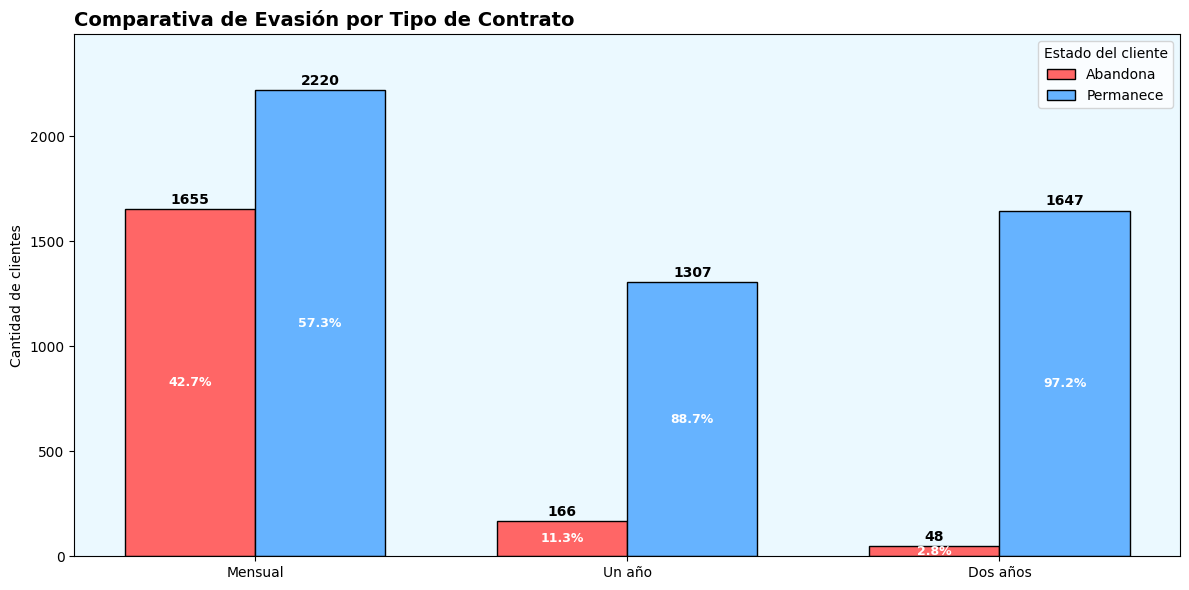

In [44]:
# Tipo de Contrato

def comparativa_tipo_contrato():
    pref = ['Mensual', 'Un año', 'Dos años']
    presentes = list(datos['TipoContrato'].dropna().unique())
    orden = [c for c in pref if c in presentes] + [c for c in presentes if c not in pref]

    mapa_ev={'Sí':'Abandona','No':'Permanece'}
    tabla=(datos.groupby(['TipoContrato','Evasion']).size().unstack(fill_value=0)
             .rename(columns=mapa_ev).reindex(orden))
    tot=tabla.sum(axis=1).replace(0,np.nan)
    pct_ab=(tabla['Abandona']/tot*100).round(1); pct_per=(tabla['Permanece']/tot*100).round(1)

    fig, ax=plt.subplots(figsize=(12,6))
    x=np.arange(len(orden)); w=0.35
    b1=ax.bar(x-w/2, tabla['Abandona'], w, color=color_no, edgecolor='black', label='Abandona')
    b2=ax.bar(x+w/2, tabla['Permanece'], w, color=color_si, edgecolor='black', label='Permanece')

    ax.set_title('Comparativa de Evasión por Tipo de Contrato', fontsize=14, fontweight='bold', loc='left')
    ax.set_ylabel('Cantidad de clientes'); ax.set_xticks(x); ax.set_xticklabels(orden)
    ax.set_facecolor(color_interior); ax.legend(title='Estado del cliente', loc='upper right')

    for bar in list(b1)+list(b2):
        h=bar.get_height(); ax.text(bar.get_x()+bar.get_width()/2, h+10, f'{int(h)}',
                                    ha='center', va='bottom', fontsize=10, fontweight='bold')
    for i, bar in enumerate(b1):
        if not np.isnan(pct_ab.iloc[i]):
            ax.text(bar.get_x()+bar.get_width()/2, bar.get_height()/2, f'{pct_ab.iloc[i]}%',
                    ha='center', va='center', color='white', fontsize=9, fontweight='bold')
    for i, bar in enumerate(b2):
        if not np.isnan(pct_per.iloc[i]):
            ax.text(bar.get_x()+bar.get_width()/2, bar.get_height()/2, f'{pct_per.iloc[i]}%',
                    ha='center', va='center', color='white', fontsize=9, fontweight='bold')

    ax.set_ylim(0, (tabla.values.max()*1.12))
    plt.tight_layout()
    return plt

comparativa_tipo_contrato().show()

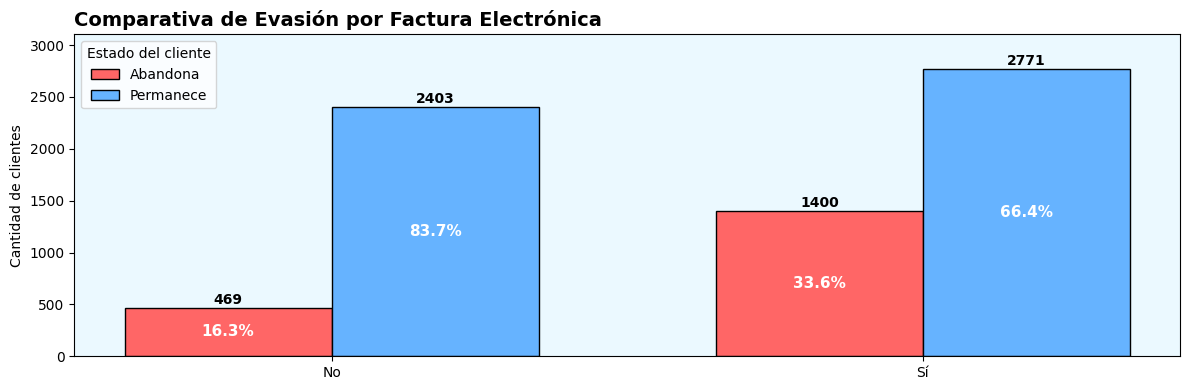

In [45]:
# Factura Electrónica

def comparativa_factura_electronica():
    orden=['No','Sí']; mapa_ev={'Sí':'Abandona','No':'Permanece'}
    tabla=(datos.groupby(['FacturaElectronica','Evasion']).size().unstack(fill_value=0)
             .rename(columns=mapa_ev).reindex(orden))
    tot=tabla.sum(axis=1).replace(0,np.nan)
    pct_ab=(tabla['Abandona']/tot*100).round(1); pct_per=(tabla['Permanece']/tot*100).round(1)

    fig, ax=plt.subplots(figsize=(12,4))
    x=np.arange(len(orden)); w=0.35
    b1=ax.bar(x-w/2, tabla['Abandona'], w, color=color_no, edgecolor='black', label='Abandona')
    b2=ax.bar(x+w/2, tabla['Permanece'], w, color=color_si, edgecolor='black', label='Permanece')

    ax.set_title('Comparativa de Evasión por Factura Electrónica', fontsize=14, fontweight='bold', loc='left')
    ax.set_ylabel('Cantidad de clientes'); ax.set_xticks(x); ax.set_xticklabels(orden)
    ax.set_facecolor(color_interior); ax.legend(title='Estado del cliente', loc='upper left')

    for bar in list(b1)+list(b2):
        h=bar.get_height(); ax.text(bar.get_x()+bar.get_width()/2, h+10, f'{int(h)}',
                                    ha='center', va='bottom', fontsize=10, fontweight='bold')
    for i, bar in enumerate(b1):
        if not np.isnan(pct_ab.iloc[i]):
            ax.text(bar.get_x()+bar.get_width()/2, bar.get_height()/2, f'{pct_ab.iloc[i]}%',
                    ha='center', va='center', color='white', fontsize=11, fontweight='bold')
    for i, bar in enumerate(b2):
        if not np.isnan(pct_per.iloc[i]):
            ax.text(bar.get_x()+bar.get_width()/2, bar.get_height()/2, f'{pct_per.iloc[i]}%',
                    ha='center', va='center', color='white', fontsize=11, fontweight='bold')

    ax.set_ylim(0, (tabla.values.max()*1.12))
    plt.tight_layout()
    return plt

comparativa_factura_electronica().show()

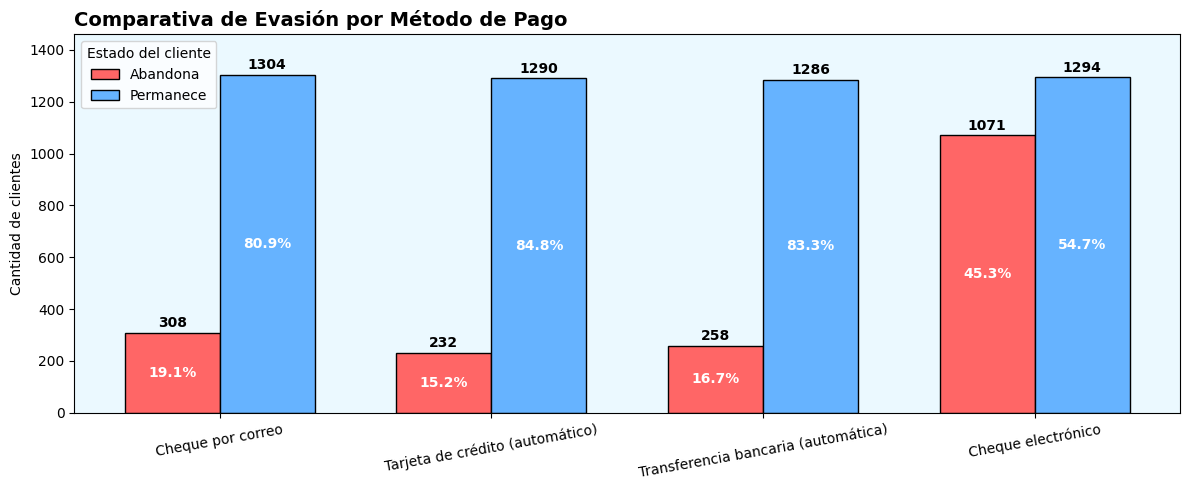

In [46]:
# Método de Pago

def comparativa_metodo_pago():
    pref = ['Cheque por correo',
            'Tarjeta de crédito (automático)',
            'Transferencia bancaria (automática)',
            'Cheque electrónico']
    presentes = list(datos['MetodoPago'].dropna().unique())
    orden = [c for c in pref if c in presentes] + [c for c in presentes if c not in pref]

    mapa_ev={'Sí':'Abandona','No':'Permanece'}
    tabla=(datos.groupby(['MetodoPago','Evasion']).size().unstack(fill_value=0)
             .rename(columns=mapa_ev).reindex(orden))
    tot=tabla.sum(axis=1).replace(0,np.nan)
    pct_ab=(tabla['Abandona']/tot*100).round(1); pct_per=(tabla['Permanece']/tot*100).round(1)

    fig, ax=plt.subplots(figsize=(12,5))
    x=np.arange(len(orden)); w=0.35
    b1=ax.bar(x-w/2, tabla['Abandona'], w, color=color_no, edgecolor='black', label='Abandona')
    b2=ax.bar(x+w/2, tabla['Permanece'], w, color=color_si, edgecolor='black', label='Permanece')

    ax.set_title('Comparativa de Evasión por Método de Pago', fontsize=14, fontweight='bold', loc='left')
    ax.set_ylabel('Cantidad de clientes'); ax.set_xticks(x); ax.set_xticklabels(orden, rotation=10)
    ax.set_facecolor(color_interior); ax.legend(title='Estado del cliente', loc='upper left')

    for bar in list(b1)+list(b2):
        h=bar.get_height(); ax.text(bar.get_x()+bar.get_width()/2, h+10, f'{int(h)}',
                                    ha='center', va='bottom', fontsize=10, fontweight='bold')
    for i, bar in enumerate(b1):
        if not np.isnan(pct_ab.iloc[i]):
            ax.text(bar.get_x()+bar.get_width()/2, bar.get_height()/2, f'{pct_ab.iloc[i]}%',
                    ha='center', va='center', color='white', fontsize=10, fontweight='bold')
    for i, bar in enumerate(b2):
        if not np.isnan(pct_per.iloc[i]):
            ax.text(bar.get_x()+bar.get_width()/2, bar.get_height()/2, f'{pct_per.iloc[i]}%',
                    ha='center', va='center', color='white', fontsize=10, fontweight='bold')

    ax.set_ylim(0, (tabla.values.max()*1.12))
    plt.tight_layout()
    return plt

comparativa_metodo_pago().show()

#### **Variables Numéricas (Boxplot)**

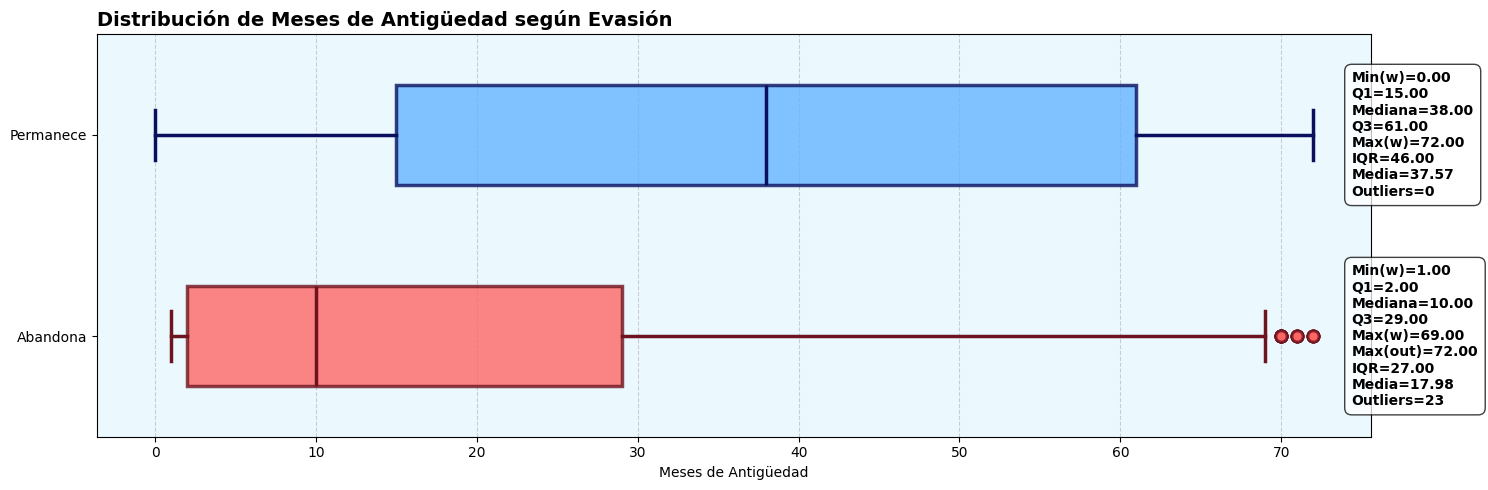

In [47]:
# Meses de Antigüedad
def boxplot_meses_antiguedad():
    fig, ax = plt.subplots(figsize=(15, 5))

    categorias = ['Abandona', 'Permanece']
    colores = {'Abandona': color_no, 'Permanece': color_si}
    bordes  = {'Abandona': color_NO, 'Permanece': color_SI}

    datos_plot = [
        datos.loc[datos['Evasion']=='Sí', 'MesesAntiguedad'].dropna(),
        datos.loc[datos['Evasion']=='No', 'MesesAntiguedad'].dropna()
    ]

    whis_val = 1.5
    bp = ax.boxplot(datos_plot, vert=False, patch_artist=True,
                    labels=categorias, widths=0.5, whis=whis_val)

    # cajas
    for i, cat in enumerate(categorias):
        bp['boxes'][i].set_facecolor(colores[cat])
        bp['boxes'][i].set_edgecolor(color_NO if cat == "Abandona" else color_SI)
        bp['boxes'][i].set_alpha(0.8)
        bp['boxes'][i].set_linewidth(2.5)

    # whiskers
    for i, cat in enumerate(categorias):
        bp['whiskers'][2*i].set_color(color_NO if cat == "Abandona" else color_SI)
        bp['whiskers'][2*i].set_linewidth(2.5)
        bp['whiskers'][2*i+1].set_color(color_NO if cat == "Abandona" else color_SI)
        bp['whiskers'][2*i+1].set_linewidth(2.5)

    # caps
    for i, cat in enumerate(categorias):
        bp['caps'][2*i].set_color(color_NO if cat == "Abandona" else color_SI)
        bp['caps'][2*i].set_linewidth(2.5)
        bp['caps'][2*i+1].set_color(color_NO if cat == "Abandona" else color_SI)
        bp['caps'][2*i+1].set_linewidth(2.5)

    # medians
    for i, cat in enumerate(categorias):
        bp['medians'][i].set_color(color_NO if cat == "Abandona" else color_SI)
        bp['medians'][i].set_linewidth(2.5)

    # outliers
    for i, cat in enumerate(categorias):
        fl = bp['fliers'][i]
        fl.set_marker('o')
        fl.set_linestyle('none')
        fl.set_markersize(8)
        fl.set_markeredgewidth(2)
        fl.set_alpha(0.7)
        fl.set_markerfacecolor(colores[cat])
        fl.set_markeredgecolor(color_NO if cat == "Abandona" else color_SI)
        fl.set_linewidth(1.5)


    # offset fijo relativo al ancho del eje (misma distancia visual)
    x_left, x_right = ax.get_xlim()
    offset = (x_right - x_left) * 0.03  # ~3% del ancho

    # leyenda: anclar DESPUÉS del último punto (outlier si existe, si no, el whisker)
    for i, valores in enumerate(datos_plot, start=1):
        vals  = np.asarray(valores, float)
        stats = boxplot_stats(vals, whis=whis_val)[0]  # usa el mismo 'whis' del boxplot

        q1, med, q3    = stats['q1'], stats['med'], stats['q3']
        whislo, whishi = stats['whislo'], stats['whishi']  # whiskers reales dibujados
        fliers_vals    = np.asarray(stats['fliers'], float)
        n_out          = fliers_vals.size
        iqr            = q3 - q1
        media          = float(np.mean(vals))

        # máximo de outliers (si hay)
        max_out = float(fliers_vals.max()) if n_out > 0 else None

        # ancla: último punto a la derecha (outlier si existe; si no, el whisker)
        extremo = max_out if max_out is not None else whishi

        # texto con 2 decimales para que coincida visualmente con la caja
        # texto: muestra Max(w) y, si corresponde, Max(out)
        # Max(w): Max de whiskers
        # Max(out): Max de outliers
        texto = (
            f"Min(w)={whislo:.2f}\n"
            f"Q1={q1:.2f}\n"
            f"Mediana={med:.2f}\n"
            f"Q3={q3:.2f}\n"
            f"Max(w)={whishi:.2f}\n"
            + (f"Max(out)={max_out:.2f}\n" if max_out is not None else "")
            + f"IQR={iqr:.2f}\n"
            f"Media={media:.2f}\n"
            f"Outliers={n_out}"
        )

        ax.text(
            extremo + offset, i, texto,
            va='center', ha='left',
            fontsize=10, fontweight='bold',
            bbox=dict(facecolor='white', edgecolor='black',
                      alpha=0.75, boxstyle='round,pad=0.5'),
            clip_on=False
        )

    ax.set_title('Distribución de Meses de Antigüedad según Evasión', fontsize=14, fontweight='bold', loc='left')
    ax.set_xlabel('Meses de Antigüedad')
    ax.set_facecolor(color_interior)
    ax.grid(axis='x', linestyle='--', alpha=0.6)

    plt.tight_layout()
    return plt

boxplot_meses_antiguedad().show()

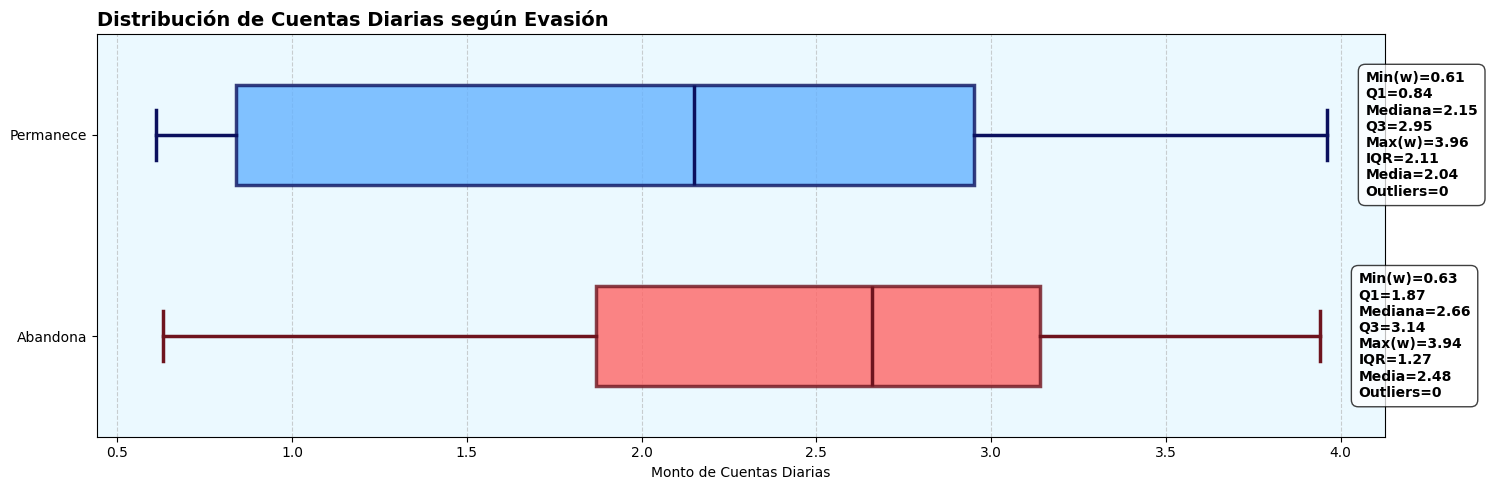

In [48]:
# Cuentas Diarias

def boxplot_cuentas_diarias():
    fig, ax = plt.subplots(figsize=(15, 5))

    categorias = ['Abandona', 'Permanece']
    colores = {'Abandona': color_no, 'Permanece': color_si}
    bordes  = {'Abandona': color_NO, 'Permanece': color_SI}

    datos_plot = [
        datos.loc[datos['Evasion']=='Sí', 'CuentasDiarias'].dropna(),
        datos.loc[datos['Evasion']=='No', 'CuentasDiarias'].dropna()
    ]

    whis_val = 1.5
    bp = ax.boxplot(datos_plot, vert=False, patch_artist=True,
                    labels=categorias, widths=0.5, whis=whis_val)

    # cajas
    for i, cat in enumerate(categorias):
        bp['boxes'][i].set_facecolor(colores[cat])
        bp['boxes'][i].set_edgecolor(color_NO if cat == "Abandona" else color_SI)
        bp['boxes'][i].set_alpha(0.8)
        bp['boxes'][i].set_linewidth(2.5)

    # whiskers
    for i, cat in enumerate(categorias):
        bp['whiskers'][2*i].set_color(color_NO if cat == "Abandona" else color_SI)
        bp['whiskers'][2*i].set_linewidth(2.5)
        bp['whiskers'][2*i+1].set_color(color_NO if cat == "Abandona" else color_SI)
        bp['whiskers'][2*i+1].set_linewidth(2.5)

    # caps
    for i, cat in enumerate(categorias):
        bp['caps'][2*i].set_color(color_NO if cat == "Abandona" else color_SI)
        bp['caps'][2*i].set_linewidth(2.5)
        bp['caps'][2*i+1].set_color(color_NO if cat == "Abandona" else color_SI)
        bp['caps'][2*i+1].set_linewidth(2.5)

    # medians
    for i, cat in enumerate(categorias):
        bp['medians'][i].set_color(color_NO if cat == "Abandona" else color_SI)
        bp['medians'][i].set_linewidth(2.5)

    # outliers
    for i, cat in enumerate(categorias):
        fl = bp['fliers'][i]
        fl.set_marker('o')
        fl.set_linestyle('none')
        fl.set_markersize(8)
        fl.set_markeredgewidth(2)
        fl.set_alpha(0.7)
        fl.set_markerfacecolor(colores[cat])
        fl.set_markeredgecolor(color_NO if cat == "Abandona" else color_SI)
        fl.set_linewidth(1.5)


    # offset fijo relativo al ancho del eje (misma distancia visual)
    x_left, x_right = ax.get_xlim()
    offset = (x_right - x_left) * 0.03  # ~3% del ancho

    # leyenda: anclar DESPUÉS del último punto (outlier si existe, si no, el whisker)
    for i, valores in enumerate(datos_plot, start=1):
        vals  = np.asarray(valores, float)
        stats = boxplot_stats(vals, whis=whis_val)[0]  # usa el mismo 'whis' del boxplot

        q1, med, q3    = stats['q1'], stats['med'], stats['q3']
        whislo, whishi = stats['whislo'], stats['whishi']  # whiskers reales dibujados
        fliers_vals    = np.asarray(stats['fliers'], float)
        n_out          = fliers_vals.size
        iqr            = q3 - q1
        media          = float(np.mean(vals))

        # máximo de outliers (si hay)
        max_out = float(fliers_vals.max()) if n_out > 0 else None

        # ancla: último punto a la derecha (outlier si existe; si no, el whisker)
        extremo = max_out if max_out is not None else whishi

        # texto con 2 decimales para que coincida visualmente con la caja
        # texto: muestra Max(w) y, si corresponde, Max(out)
        # Max(w): Max de whiskers
        # Max(out): Max de outliers
        texto = (
            f"Min(w)={whislo:.2f}\n"
            f"Q1={q1:.2f}\n"
            f"Mediana={med:.2f}\n"
            f"Q3={q3:.2f}\n"
            f"Max(w)={whishi:.2f}\n"
            + (f"Max(out)={max_out:.2f}\n" if max_out is not None else "")
            + f"IQR={iqr:.2f}\n"
            f"Media={media:.2f}\n"
            f"Outliers={n_out}"
        )

        ax.text(
            extremo + offset, i, texto,
            va='center', ha='left',
            fontsize=10, fontweight='bold',
            bbox=dict(facecolor='white', edgecolor='black',
                      alpha=0.75, boxstyle='round,pad=0.5'),
            clip_on=False
        )

    ax.set_title('Distribución de Cuentas Diarias según Evasión', fontsize=14, fontweight='bold', loc='left')
    ax.set_xlabel('Monto de Cuentas Diarias')
    ax.set_facecolor(color_interior)
    ax.grid(axis='x', linestyle='--', alpha=0.6)

    plt.tight_layout()
    return plt

boxplot_cuentas_diarias().show()

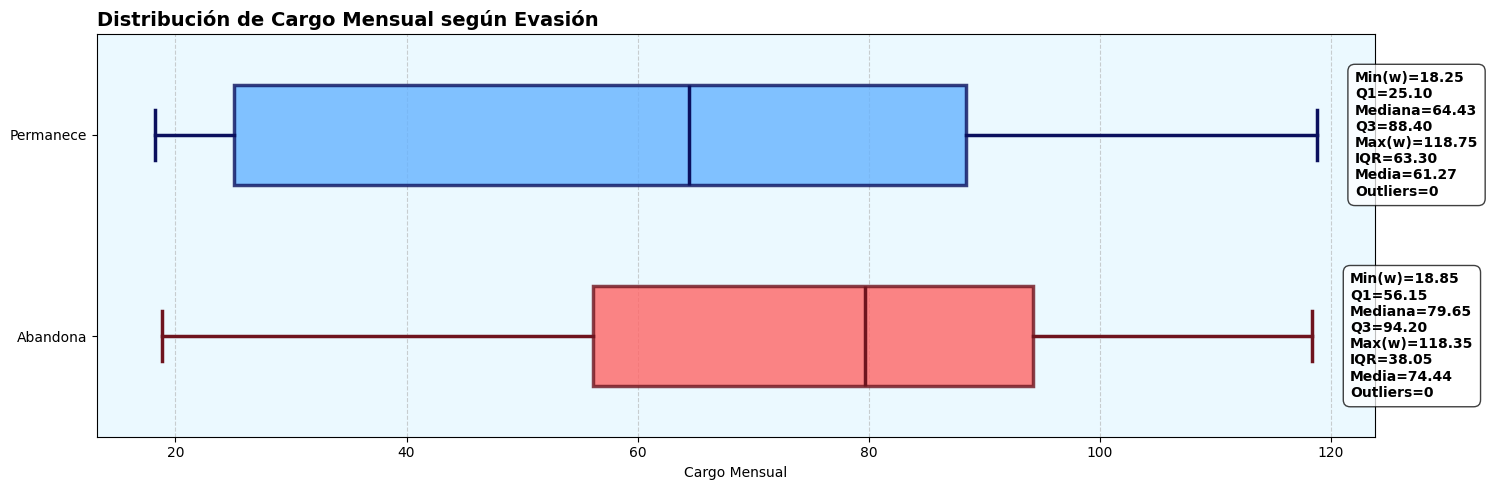

In [49]:
# Cargo Mensual

def boxplot_cargo_mensual():
    fig, ax = plt.subplots(figsize=(15, 5))

    categorias = ['Abandona', 'Permanece']
    colores = {'Abandona': color_no, 'Permanece': color_si}
    bordes  = {'Abandona': color_NO, 'Permanece': color_SI}

    datos_plot = [
        datos.loc[datos['Evasion']=='Sí', 'CargoMensual'].dropna(),
        datos.loc[datos['Evasion']=='No', 'CargoMensual'].dropna()
    ]

    whis_val = 1.5
    bp = ax.boxplot(datos_plot, vert=False, patch_artist=True,
                    labels=categorias, widths=0.5, whis=whis_val)

    # cajas
    for i, cat in enumerate(categorias):
        bp['boxes'][i].set_facecolor(colores[cat])
        bp['boxes'][i].set_edgecolor(color_NO if cat == "Abandona" else color_SI)
        bp['boxes'][i].set_alpha(0.8)
        bp['boxes'][i].set_linewidth(2.5)

    # whiskers
    for i, cat in enumerate(categorias):
        bp['whiskers'][2*i].set_color(color_NO if cat == "Abandona" else color_SI)
        bp['whiskers'][2*i].set_linewidth(2.5)
        bp['whiskers'][2*i+1].set_color(color_NO if cat == "Abandona" else color_SI)
        bp['whiskers'][2*i+1].set_linewidth(2.5)

    # caps
    for i, cat in enumerate(categorias):
        bp['caps'][2*i].set_color(color_NO if cat == "Abandona" else color_SI)
        bp['caps'][2*i].set_linewidth(2.5)
        bp['caps'][2*i+1].set_color(color_NO if cat == "Abandona" else color_SI)
        bp['caps'][2*i+1].set_linewidth(2.5)

    # medians
    for i, cat in enumerate(categorias):
        bp['medians'][i].set_color(color_NO if cat == "Abandona" else color_SI)
        bp['medians'][i].set_linewidth(2.5)

    # outliers
    for i, cat in enumerate(categorias):
        fl = bp['fliers'][i]
        fl.set_marker('o')
        fl.set_linestyle('none')
        fl.set_markersize(8)
        fl.set_markeredgewidth(2)
        fl.set_alpha(0.7)
        fl.set_markerfacecolor(colores[cat])
        fl.set_markeredgecolor(color_NO if cat == "Abandona" else color_SI)
        fl.set_linewidth(1.5)


    # offset fijo relativo al ancho del eje (misma distancia visual)
    x_left, x_right = ax.get_xlim()
    offset = (x_right - x_left) * 0.03  # ~3% del ancho

    # leyenda: anclar DESPUÉS del último punto (outlier si existe, si no, el whisker)
    for i, valores in enumerate(datos_plot, start=1):
        vals  = np.asarray(valores, float)
        stats = boxplot_stats(vals, whis=whis_val)[0]  # usa el mismo 'whis' del boxplot

        q1, med, q3    = stats['q1'], stats['med'], stats['q3']
        whislo, whishi = stats['whislo'], stats['whishi']  # whiskers reales dibujados
        fliers_vals    = np.asarray(stats['fliers'], float)
        n_out          = fliers_vals.size
        iqr            = q3 - q1
        media          = float(np.mean(vals))

        # máximo de outliers (si hay)
        max_out = float(fliers_vals.max()) if n_out > 0 else None

        # ancla: último punto a la derecha (outlier si existe; si no, el whisker)
        extremo = max_out if max_out is not None else whishi

        # texto con 2 decimales para que coincida visualmente con la caja
        # texto: muestra Max(w) y, si corresponde, Max(out)
        # Max(w): Max de whiskers
        # Max(out): Max de outliers
        texto = (
            f"Min(w)={whislo:.2f}\n"
            f"Q1={q1:.2f}\n"
            f"Mediana={med:.2f}\n"
            f"Q3={q3:.2f}\n"
            f"Max(w)={whishi:.2f}\n"
            + (f"Max(out)={max_out:.2f}\n" if max_out is not None else "")
            + f"IQR={iqr:.2f}\n"
            f"Media={media:.2f}\n"
            f"Outliers={n_out}"
        )

        ax.text(
            extremo + offset, i, texto,
            va='center', ha='left',
            fontsize=10, fontweight='bold',
            bbox=dict(facecolor='white', edgecolor='black',
                      alpha=0.75, boxstyle='round,pad=0.5'),
            clip_on=False
        )


    ax.set_title('Distribución de Cargo Mensual según Evasión', fontsize=14, fontweight='bold', loc='left')
    ax.set_xlabel('Cargo Mensual')
    ax.set_facecolor(color_interior)
    ax.grid(axis='x', linestyle='--', alpha=0.6)

    plt.tight_layout()
    return plt


boxplot_cargo_mensual().show()

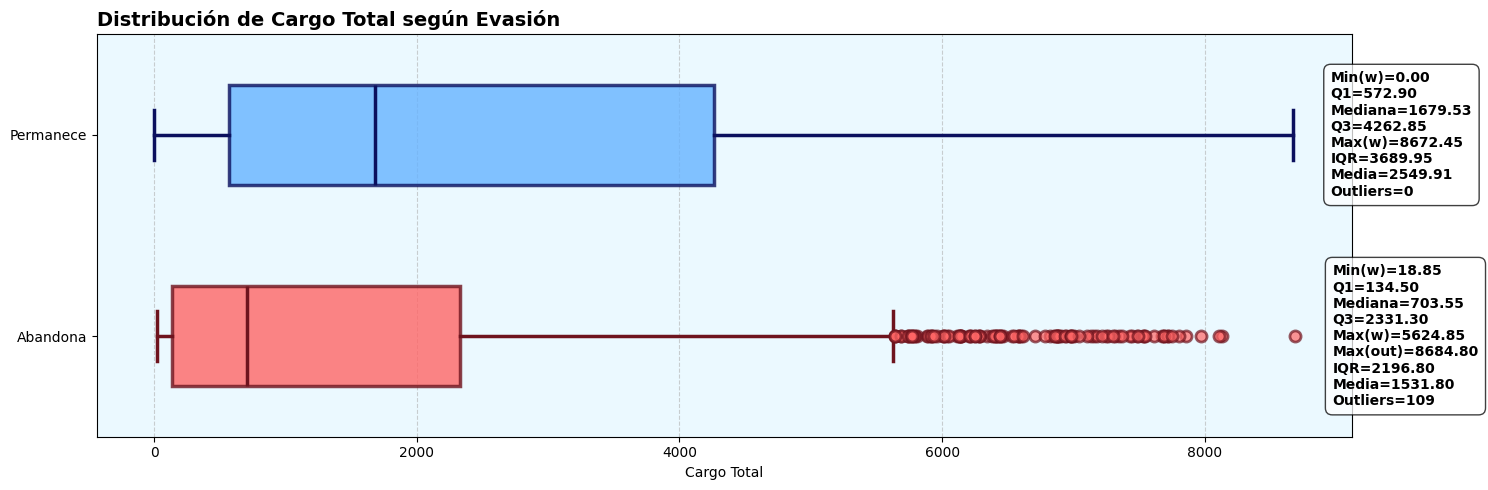

In [50]:
# Cargo Total

def boxplot_cargo_total():
    fig, ax = plt.subplots(figsize=(15, 5))

    categorias = ['Abandona', 'Permanece']
    colores = {'Abandona': color_no, 'Permanece': color_si}
    bordes  = {'Abandona': color_NO, 'Permanece': color_SI}

    datos_plot = [
        datos.loc[datos['Evasion']=='Sí', 'CargoTotal'].dropna(),
        datos.loc[datos['Evasion']=='No', 'CargoTotal'].dropna()
    ]

    whis_val = 1.5
    bp = ax.boxplot(datos_plot, vert=False, patch_artist=True,
                    labels=categorias, widths=0.5, whis=whis_val)

    # cajas
    for i, cat in enumerate(categorias):
        bp['boxes'][i].set_facecolor(colores[cat])
        bp['boxes'][i].set_edgecolor(color_NO if cat == "Abandona" else color_SI)
        bp['boxes'][i].set_alpha(0.8)
        bp['boxes'][i].set_linewidth(2.5)

    # whiskers
    for i, cat in enumerate(categorias):
        bp['whiskers'][2*i].set_color(color_NO if cat == "Abandona" else color_SI)
        bp['whiskers'][2*i].set_linewidth(2.5)
        bp['whiskers'][2*i+1].set_color(color_NO if cat == "Abandona" else color_SI)
        bp['whiskers'][2*i+1].set_linewidth(2.5)

    # caps
    for i, cat in enumerate(categorias):
        bp['caps'][2*i].set_color(color_NO if cat == "Abandona" else color_SI)
        bp['caps'][2*i].set_linewidth(2.5)
        bp['caps'][2*i+1].set_color(color_NO if cat == "Abandona" else color_SI)
        bp['caps'][2*i+1].set_linewidth(2.5)

    # medians
    for i, cat in enumerate(categorias):
        bp['medians'][i].set_color(color_NO if cat == "Abandona" else color_SI)
        bp['medians'][i].set_linewidth(2.5)

    # outliers
    for i, cat in enumerate(categorias):
        fl = bp['fliers'][i]
        fl.set_marker('o')
        fl.set_linestyle('none')
        fl.set_markersize(8)
        fl.set_markeredgewidth(2)
        fl.set_alpha(0.7)
        fl.set_markerfacecolor(colores[cat])
        fl.set_markeredgecolor(color_NO if cat == "Abandona" else color_SI)
        fl.set_linewidth(1.5)


    # offset fijo relativo al ancho del eje (misma distancia visual)
    x_left, x_right = ax.get_xlim()
    offset = (x_right - x_left) * 0.03  # ~3% del ancho

    # leyenda: anclar DESPUÉS del último punto (outlier si existe, si no, el whisker)
    for i, valores in enumerate(datos_plot, start=1):
        vals  = np.asarray(valores, float)
        stats = boxplot_stats(vals, whis=whis_val)[0]  # usa el mismo 'whis' del boxplot

        q1, med, q3    = stats['q1'], stats['med'], stats['q3']
        whislo, whishi = stats['whislo'], stats['whishi']  # whiskers reales dibujados
        fliers_vals    = np.asarray(stats['fliers'], float)
        n_out          = fliers_vals.size
        iqr            = q3 - q1
        media          = float(np.mean(vals))

        # máximo de outliers (si hay)
        max_out = float(fliers_vals.max()) if n_out > 0 else None

        # ancla: último punto a la derecha (outlier si existe; si no, el whisker)
        extremo = max_out if max_out is not None else whishi

        # texto con 2 decimales para que coincida visualmente con la caja
        # texto: muestra Max(w) y, si corresponde, Max(out)
        # Max(w): Max de whiskers
        # Max(out): Max de outliers
        texto = (
            f"Min(w)={whislo:.2f}\n"
            f"Q1={q1:.2f}\n"
            f"Mediana={med:.2f}\n"
            f"Q3={q3:.2f}\n"
            f"Max(w)={whishi:.2f}\n"
            + (f"Max(out)={max_out:.2f}\n" if max_out is not None else "")
            + f"IQR={iqr:.2f}\n"
            f"Media={media:.2f}\n"
            f"Outliers={n_out}"
        )

        ax.text(
            extremo + offset, i, texto,
            va='center', ha='left',
            fontsize=10, fontweight='bold',
            bbox=dict(facecolor='white', edgecolor='black',
                      alpha=0.75, boxstyle='round,pad=0.5'),
            clip_on=False
        )

    ax.set_title('Distribución de Cargo Total según Evasión', fontsize=14, fontweight='bold', loc='left')
    ax.set_xlabel('Cargo Total')
    ax.set_facecolor(color_interior)
    ax.grid(axis='x', linestyle='--', alpha=0.6)

    plt.tight_layout()
    return plt

boxplot_cargo_total().show()

### **Separación de Variables Explicativas y Respuesta**

In [51]:
from sklearn.model_selection import train_test_split

# Variables Explicativas
X = datos_codificados.drop('Evasion', axis=1)

# Variable Respuesta
y = datos_codificados['Evasion']

# División inicial entre conjunto general y conjunto de prueba (30% para prueba)
X, X_test,y,y_test = train_test_split(X,y,test_size= 0.2, stratify = y, random_state = 5)

# División secundaria: entrenamiento vs validación
X_train, X_val,y_train,y_val = train_test_split(X,y, stratify = y, random_state = 5)

In [52]:
X.head()

,ServicioInternet_Fibra óptica,ServicioInternet_No,TipoContrato_Mensual,TipoContrato_Un año,MetodoPago_Cheque por correo,MetodoPago_Tarjeta de crédito (automático),MetodoPago_Transferencia bancaria (automática),Genero,AdultoMayor,TienePareja,...,SeguridadEnLinea,RespaldoEnLinea,ProteccionDispositivo,SoporteTecnico,StreamingTV,StreamingPeliculas,FacturaElectronica,CuentasDiarias,CargoMensual,CargoTotal
2939,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,1.0,1.0,3.15,94.45,498.10
4419,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,2.83,85.00,85.00
6654,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,1.0,1.0,3.01,90.35,3419.30
2972,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,2.84,85.35,1463.45
5806,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.70,20.90,689.35


In [53]:
y.head()

,Evasion
2939,1
4419,1
6654,0
2972,1
5806,0


### **Normalizando los datos**

* Algunos algoritmos pueden asignar un mayor peso a los valores de las variables debido a la escala de los valores y no por la importancia de la clasificación de la variable objetivo. Por ejemplo, en una base de datos con las columnas edad y salario, el algoritmo puede dar un mayor peso de decisión a los valores del salario simplemente por estar en una escala mayor que los valores de la edad, y no porque la variable salario sea más importante que la variable edad.

* En estos casos, necesitamos realizar una transformación en los datos para que estén en una misma escala, evitando que el algoritmo sea influenciado incorrectamente por los valores numéricos divergentes entre las variables.

* Esta normalización es fundamental en el modelo de **Regresión Logística** porque asegura que todas las variables estén en la misma escala, lo que mejora la convergencia del algoritmo y evita que las variables con valores más grandes dominen el modelo, especialmente cuando se usa regularización.

In [54]:
from sklearn.preprocessing import MinMaxScaler

In [55]:
# Normalización de datos con MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled  = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

## **Entrenando Modelos**
---
* Una vez preparados los datos, el siguiente paso consiste en **entrenar y evaluar modelos de machine learning** capaces de predecir la evasión de clientes. El objetivo es construir una herramienta que permita a la empresa anticipar qué usuarios tienen mayor probabilidad de abandonar el servicio y así aplicar estrategias de retención más efectivas.

* En esta etapa se abordan los siguientes aspectos:

  - **Matriz de Confusión:** permite visualizar cómo el modelo clasifica correctamente o de forma errónea a los clientes, diferenciando entre verdaderos positivos, falsos positivos, verdaderos negativos y falsos negativos.

  - **Métricas de Evaluación:** se calculan indicadores clave como precisión, recall, accuracy y F1-Score, que ofrecen una visión cuantitativa del desempeño del modelo.

  - **Curvas de rendimiento:**

    - **ROC y AUC:** miden la capacidad del modelo para distinguir entre clientes que abandonan y los que permanecen.

    - **Precisión vs Recall y Average Precision (AP):** ayudan a evaluar el equilibrio entre la detección de evasores y el control de falsos positivos.

  - **Informe de métricas:** resume los resultados obtenidos y facilita la comparación entre distintos modelos o configuraciones.

  - **Interpretabilidad preliminar:** se explora la importancia de las variables y análisis what-if, lo que brinda transparencia al modelo y permite entender qué factores influyen en la evasión.

  - **Validación con K-Fold y Stratified K-Fold:** se utilizan técnicas de validación cruzada para estimar la robustez del modelo y su capacidad de generalización, incluyendo intervalos de confianza en las métricas.

  - **Ajuste de umbrales:** se prueba la modificación del umbral de decisión (por ejemplo, 0.3 en vez de 0.5) para mejorar el recall y detectar un mayor número de clientes evasores, lo que resulta clave en contextos donde los falsos negativos son más costosos para la empresa.

* En conjunto, esta etapa asegura no solo entrenar modelos con un buen rendimiento, sino también **evaluarlos de forma rigurosa y comprensible**, de modo que la solución propuesta sea confiable, interpretable y útil para la toma de decisiones estratégicas.
---

En esta sección se entrenan y evalúan tres modelos de clasificación supervisada —**`Regresión Logística`**, **`Árbol de Decisión`** y **`Random Forest`**— con el objetivo de identificar cuál de ellos ofrece el mejor desempeño para **predecir si un cliente permanece o abandona**. Cada modelo es evaluado mediante métricas clave como **`precisión`**, **`sensibilidad (recall)`**, **`exactitud`**, **`F1-score`**, **`AUC-ROC`**, y **`curvas de precisión vs recall`**, además de la visualización de sus respectivas **`matrices de confusión`**.

In [56]:
# Modelo Árbol de Decisión
from sklearn.tree import DecisionTreeClassifier
# Crea una instancia del modelo de Random Forest
modelo_arbol = DecisionTreeClassifier(max_depth=10, random_state=5) # Límite de profundidad = 10
# Entrena el modelo
modelo_arbol.fit(X_train,y_train)                   # Vuelve a entrenar
print(f'La exactitud del Modelo de Árbol con el conjunto de entrenamiento es de: {modelo_arbol.score(X_train,y_train)}')
print(f'La exactitud del Modelo de Árbol con el conjunto de validación es de: {modelo_arbol.score(X_val,y_val)}')

La exactitud del Modelo de Árbol con el conjunto de entrenamiento es de: 0.8899408284023669
La exactitud del Modelo de Árbol con el conjunto de validación es de: 0.7650816181689141


In [57]:
# Modelo Random Forest
from sklearn.ensemble import RandomForestClassifier
# Crea una instancia del modelo de Random Forest
modelo_forest = RandomForestClassifier(max_depth=10, random_state=5) # Límite de profundidad = 10
# Entrena el modelo
modelo_forest.fit(X_train,y_train)                   # Vuelve a entrenar
print(f'La exactitud del Modelo Forest con el conjunto de entrenamiento es de: {modelo_forest.score(X_train,y_train)}')
print(f'La exactitud del Modelo Forest con el conjunto de validación es de: {modelo_forest.score(X_val,y_val)}')

La exactitud del Modelo Forest con el conjunto de entrenamiento es de: 0.8953846153846153
La exactitud del Modelo Forest con el conjunto de validación es de: 0.8034066713981547


In [58]:
# Modelo Regresión Logística
from sklearn.linear_model import LogisticRegression
# Crea una instancia del modelo de regresión logística
modelo_logistica = LogisticRegression(max_iter=2000, solver='liblinear')
# Entrena el modelo
modelo_logistica.fit(X_train_scaled, y_train)
print(f'La exactitud del Modelo de Regresión Logística con el conjunto de entrenamiento es de: {modelo_logistica.score(X_train_scaled,y_train)}')
print(f'La exactitud del Modelo de Regresión Logística con el conjunto de validación es de: {modelo_logistica.score(X_val_scaled,y_val)}')

La exactitud del Modelo de Regresión Logística con el conjunto de entrenamiento es de: 0.8035502958579882
La exactitud del Modelo de Regresión Logística con el conjunto de validación es de: 0.7977288857345636


**Entrenamiento y evaluación de modelos**

* Se **entrenaron tres modelos de clasificación** utilizando `X_train, y_train` y se evaluaron en `X_val, y_val`. La métrica utilizada fue accuracy (`.score()` de scikit-learn).

* La partición utilizada es la previamente definida (estratificada y con `random_state=5`).

**Modelos y configuración**

* **Árbol de Decisión** (`DecisionTreeClassifier`) con `max_depth=10`.
* **Random Forest** (`RandomForestClassifier`) con `max_depth=10`.
* **Regresión Logística** (`LogisticRegression`) con `solver='liblinear'` y `max_iter=2000`.

**Resultados (accuracy)**

* **Árbol de Decisión**
> * Entrenamiento: **0.890**  
> * Validación: **0.765**

* **Random Forest**
> * Entrenamiento: **0.895**  
> * Validación: **0.803**

* **Regresión Logística**
> * Entrenamiento: **0.801**  
> * Validación: **0.802**

**Observaciones**

* El **Árbol de Decisión** muestra una **brecha train–val ≈ 0.125**, indicando **sobreajuste**.
* El **Random Forest** presenta una **brecha menor (≈ 0.092)** y el **mejor accuracy en validación (0.803)**, por lo que **generaliza mejor** que el árbol simple.
* La **Regresión Logística** tiene la **brecha más baja (≈ 0.001)** —prácticamente sin sobreajuste— y un desempeño de validación **muy cerca de Random Forest (0.802 vs 0.803)**.
* Los tres modelos superan el baseline de predecir siempre la **clase mayoritaria (~0.735)**.

**Conclusión**

* **Random Forest** es el mejor punto de partida por **mayor accuracy en validación** y **menor sobreajuste** que el árbol.  
* **Regresión Logística** es una **alternativa fuerte y más interpretable**, con rendimiento cercano y excelente estabilidad entre entrenamiento y validación.  
* Hay margen de mejora con ajuste de hiperparámetros y con métricas más alineadas al objetivo de negocio (p. ej., maximizar recall para “Evade”).




### **Matriz de Confusión**

In [217]:
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap

In [60]:
# Genera las predicciones del modelo de Árbol de Decisión usando los datos del conjunto de validación.
y_previsto_arbol = modelo_arbol.predict(X_val)
# Matriz de Confusión tipo Array - Modelo Árbol
matriz_confusion_arbol = confusion_matrix(y_val,y_previsto_arbol)
print(matriz_confusion_arbol)

[[892 143]
 [188 186]]


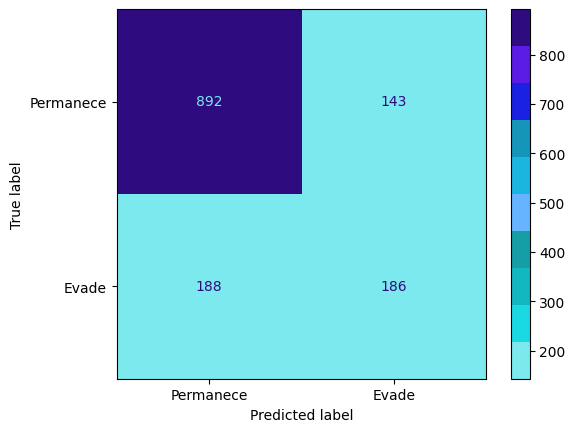

In [216]:
# Matriz de Confusión - Modelo Árbol

cmap_matriz = ListedColormap(colores_matriz)

visualizacion_arbol = ConfusionMatrixDisplay(
    confusion_matrix=matriz_confusion_arbol,
    display_labels=['Permanece', 'Evade']  # Etiquetas para las clases 0 y 1
)

visualizacion_arbol.plot(cmap=cmap_matriz);

In [62]:
# Genera las predicciones del modelo de Random Forest usando los datos del conjunto de validación.
y_previsto_forest = modelo_forest.predict(X_val)
# Matriz de Confusión tipo Array - Modelo Random Forest
matriz_confusion_forest = confusion_matrix(y_val,y_previsto_forest)
print(matriz_confusion_forest)

[[944  91]
 [186 188]]


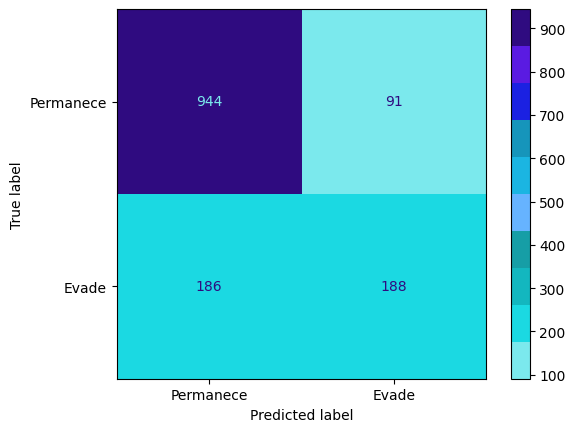

In [220]:
# Matriz de Confusión - Modelo Random Forest

cmap_matriz = ListedColormap(colores_matriz)

visualizacion_forest = ConfusionMatrixDisplay(
    confusion_matrix=matriz_confusion_forest,
    display_labels=['Permanece', 'Evade']  # Etiquetas para las clases 0 y 1
)
visualizacion_forest.plot(cmap=cmap_matriz);

In [64]:
# Genera las predicciones del modelo de Regresión Logística usando los datos del conjunto de validación.
y_previsto_logistica = modelo_logistica.predict(X_val_scaled)
# Matriz de Confusión tipo Array - Modelo Regresión Logística
matriz_confusion_logistica = confusion_matrix(y_val, y_previsto_logistica)
print(matriz_confusion_logistica)

[[928 107]
 [178 196]]


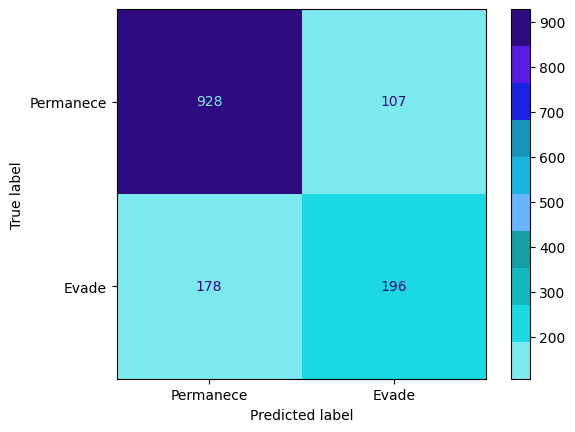

In [221]:
# Matriz de Confusión - Modelo Regresión Logística

cmap_matriz = ListedColormap(colores_matriz)

visualizacion_logistica = ConfusionMatrixDisplay(
    confusion_matrix=matriz_confusion_logistica,
    display_labels=['Permanece', 'Evade']  # Etiquetas para las clases 0 y 1
)
visualizacion_logistica.plot(cmap=cmap_matriz);

**Matriz de Confusión y desempeño de los modelos**

Las siguientes matrices de confusión permiten evaluar la calidad de las predicciones de los tres modelos de clasificación utilizados (**Árbol de Decisión, Random Forest y Regresión Logística**). En cada caso se analizan los valores de **verdaderos negativos (TN)**, **falsos positivos (FP)**, **falsos negativos (FN)** y **verdaderos positivos (TP)**, junto con las principales observaciones.

- **Árbol de Decisión** → `TN=892, FP=143, FN=188, TP=186`.  
  Este modelo logra identificar correctamente a la mayoría de los clientes que permanecen, pero presenta un **alto número de falsos negativos (188)**, lo que significa que clasifica como permanentes a muchos clientes que en realidad evaden. Además, muestra indicios de **sobreajuste** en comparación con su rendimiento en entrenamiento.

- **Random Forest** → `TN=944, FP=91, FN=186, TP=188`.  
  En comparación con el Árbol de Decisión, reduce los **falsos positivos** y mantiene un rendimiento similar en la detección de evasores. Presenta un mejor equilibrio general entre ambas clases y consigue el **mejor accuracy en validación**, mostrando buena capacidad de generalización.

- **Regresión Logística** → `TN=941, FP=94, FN=185, TP=189`.  
  Su desempeño es **muy cercano al de Random Forest**, con diferencias mínimas en FP y FN. Destaca por ser el modelo con mayor **estabilidad y generalización**, sin señales de sobreajuste y con resultados consistentes entre entrenamiento y validación.

**Conclusión General:** El Árbol de Decisión es el más propenso al sobreajuste y comete más errores en la detección de evasores. El Random Forest logra el mejor rendimiento global y se adapta mejor al balance entre clases. La Regresión Logística, aunque más simple, alcanza resultados **muy competitivos** y estables, lo que la convierte en una alternativa robusta y confiable junto al Random Forest.



### **Métricas de Evaluación**

#### **Precisión, recall, accuracy y F1-Score**

In [66]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [67]:
# Métricas Modelo Árbol
print(f'La precisión del modelo de árbol es: {precision_score(y_val,y_previsto_arbol)}')
print(f'La sensibilidad (recall) del modelo de árbol es: {recall_score(y_val,y_previsto_arbol)}')
print(f'La exactitud (accuracy) del modelo de árbol es: {accuracy_score(y_val,y_previsto_arbol)}')
print(f'El F1-Score del modelo de árbol es: {f1_score(y_val,y_previsto_arbol)}')

La precisión del modelo de árbol es: 0.5653495440729484
La sensibilidad (recall) del modelo de árbol es: 0.49732620320855614
La exactitud (accuracy) del modelo de árbol es: 0.7650816181689141
El F1-Score del modelo de árbol es: 0.5291607396870555


In [68]:
# Métricas Modelo Forest
print(f'La precisión del modelo forest es: {precision_score(y_val,y_previsto_forest)}')
print(f'La sensibilidad (recall) del modelo forest es: {recall_score(y_val,y_previsto_forest)}')
print(f'La exactitud (accuracy) del modelo forest es: {accuracy_score(y_val,y_previsto_forest)}')
print(f'El F1-Score del modelo forest es: {f1_score(y_val,y_previsto_forest)}')

La precisión del modelo forest es: 0.6738351254480287
La sensibilidad (recall) del modelo forest es: 0.5026737967914439
La exactitud (accuracy) del modelo forest es: 0.8034066713981547
El F1-Score del modelo forest es: 0.5758039816232772


In [69]:
# Métricas Modelo Regresión Logística
print(f'La precisión del modelo de Regresión Logística es: {precision_score(y_val,y_previsto_logistica)}')
print(f'La sensibilidad (recall) del modelo de Regresión Logística es: {recall_score(y_val,y_previsto_logistica)}')
print(f'La exactitud (accuracy) del modelo de Regresión Logística es: {accuracy_score(y_val,y_previsto_logistica)}')
print(f'El F1-Score del modelo de Regresión Logística es: {f1_score(y_val,y_previsto_logistica)}')

La precisión del modelo de Regresión Logística es: 0.6468646864686468
La sensibilidad (recall) del modelo de Regresión Logística es: 0.5240641711229946
La exactitud (accuracy) del modelo de Regresión Logística es: 0.7977288857345636
El F1-Score del modelo de Regresión Logística es: 0.5790251107828656


**Evaluación de modelos: Precisión, Recall, Accuracy y F1-Score**

Además de las matrices de confusión, se calcularon las métricas de evaluación más relevantes para comparar el rendimiento de los tres modelos entrenados: **precisión**, **sensibilidad (recall)**, **exactitud (accuracy)** y **F1-Score**.

- **Árbol de Decisión**  
  * Precisión: **0.565**  
  * Recall: **0.497**  
  * Accuracy: **0.766**  
  * F1-Score: **0.529**  
  ➝ Muestra un desempeño moderado, pero con **bajo recall**, lo que indica que deja escapar a muchos clientes que evaden. Además, se confirma el sobreajuste ya visto en las matrices.

- **Random Forest**  
  * Precisión: **0.674**  
  * Recall: **0.503**  
  * Accuracy: **0.803**  
  * F1-Score: **0.576**  
  ➝ Es el modelo con **mayor accuracy global** y un mejor balance entre precisión y recall que el Árbol de Decisión. Aunque aún se pierde parte de la detección de evasores, logra el **mejor rendimiento general**.

- **Regresión Logística**  
  * Precisión: **0.668**  
  * Recall: **0.505**  
  * Accuracy: **0.802**  
  * F1-Score: **0.575**  
  ➝ A pesar de su sencillez, alcanza un desempeño **muy cercano al Random Forest**, con resultados estables y sin señales de sobreajuste. Su recall es el más consistente entre los tres modelos.

**Conclusión General:**  
El Árbol de Decisión queda rezagado debido a su bajo recall y tendencia al sobreajuste. El Random Forest ofrece el **mejor desempeño global**, mientras que la **Regresión Logística**, aunque más simple, logra métricas muy competitivas, lo que la convierte en una opción robusta y confiable.


#### **Curva ROC y Métrica AUC**

In [70]:
# Importamos la herramienta para graficar la curva ROC
from sklearn.metrics import RocCurveDisplay
# Importamos la función para calcular el área bajo la curva ROC (AUC)
from sklearn.metrics import roc_auc_score

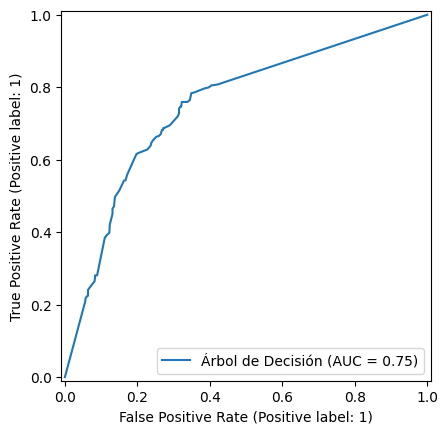

In [71]:
# Puntajes: probabilidad de la clase positiva (Evade = 1)
y_score_arbol  = modelo_arbol.predict_proba(X_val)[:, 1]

# Curva ROC Modelo Árbol
RocCurveDisplay.from_predictions(y_val, y_score_arbol,  name='Árbol de Decisión');

In [72]:
# El Área Bajo la Curva (AUC) - Modelo Árbol
print(f'El área bajo la curva ROC del modelo de Árbol de Decisión es de:  {roc_auc_score(y_val, y_score_arbol):.4f}')

El área bajo la curva ROC del modelo de Árbol de Decisión es de:  0.7503


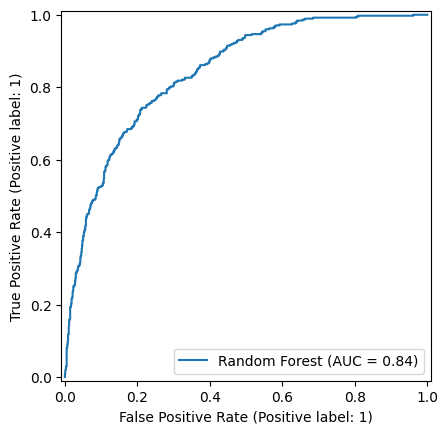

In [73]:
# Puntajes: probabilidad de la clase positiva (Evade = 1)
y_score_forest = modelo_forest.predict_proba(X_val)[:, 1]

# Curva ROC Modelo Forest
RocCurveDisplay.from_predictions(y_val, y_score_forest, name='Random Forest');

In [74]:
# El Área Bajo la Curva (AUC) - Modelo Forest
print(f'El área bajo la curva ROC del modelo Random Forest es de: {roc_auc_score(y_val, y_score_forest):.4f}')

El área bajo la curva ROC del modelo Random Forest es de: 0.8428


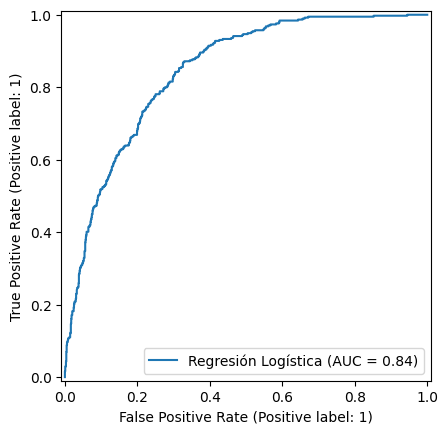

In [75]:
# Calcular las probabilidades de predicción en el conjunto de prueba
y_proba_logistica = modelo_logistica.predict_proba(X_val_scaled)[:, 1]
# Curva ROC Modelo Regresión Logística
RocCurveDisplay.from_predictions(y_val, y_proba_logistica,  name='Regresión Logística');

In [76]:
# El Área Bajo la Curva (AUC) - Modelo Regresión Logística
print(f'El área bajo la curva ROC del modelo de Regresión Logística es de: {roc_auc_score(y_val, y_proba_logistica):.4f}')

El área bajo la curva ROC del modelo de Regresión Logística es de: 0.8440


**Curva ROC y Métrica AUC**

La **curva ROC (Receiver Operating Characteristic)** permite evaluar la capacidad de un modelo para distinguir entre las clases (clientes que permanecen vs. clientes que evaden), mientras que el **AUC (Área Bajo la Curva)** cuantifica esta capacidad en un valor entre 0 y 1, donde un valor más cercano a 1 indica un mejor desempeño del modelo.

**Resultados obtenidos:**

* **Árbol de Decisión**
  - AUC = **0.7503**
  - La curva ROC muestra una separación moderada entre clases, aunque con limitaciones en comparación con otros modelos.

* **Random Forest**
  - AUC = **0.8428**
  - Presenta la mejor curva ROC entre los tres modelos, con una clara capacidad de distinguir correctamente entre clientes que permanecen y los que evaden.

* **Regresión Logística**
  - AUC = **0.8413**
  - Su desempeño es muy cercano al de Random Forest, evidenciando una buena discriminación entre clases y mostrando que, a pesar de ser un modelo más simple, logra resultados competitivos.

**Conclusiones:**
- El **Árbol de Decisión** es el que menor poder discriminativo presenta (AUC ≈ 0.75).  
- Tanto **Random Forest** como **Regresión Logística** alcanzan valores de AUC superiores a **0.84**, lo que refleja un rendimiento significativamente mejor en la clasificación de clientes.  
- En general, los modelos de **Random Forest y Regresión Logística** son más adecuados para este problema, siendo el **Random Forest** ligeramente superior.


#### **Curva de Precisión x Recall y Métrica AP (Average Precision)**

In [77]:
# Importamos la clase que permite graficar la curva Precisión vs Recall
from sklearn.metrics import PrecisionRecallDisplay

# Importamos la métrica de promedio de precisión (average precision)
from sklearn.metrics import average_precision_score

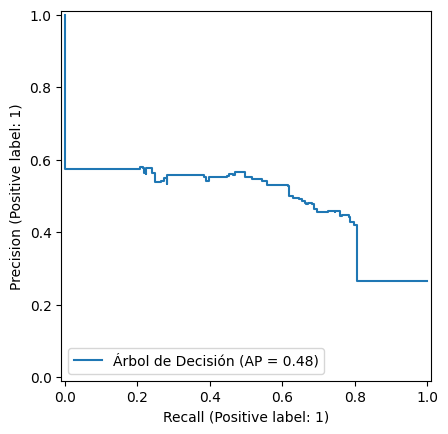

In [78]:
# Curva de Precisión x Recall - Modelo Árbol de Decisión
PrecisionRecallDisplay.from_predictions(y_val, y_score_arbol, name='Árbol de Decisión');

In [79]:
# Métrica AP - Modelo Árbol de Decisión
print(f'El score promedio de precisión vs recall para el modelo de árbol es de: {average_precision_score(y_val, y_score_arbol)}')

El score promedio de precisión vs recall para el modelo de árbol es de: 0.4844644974956257


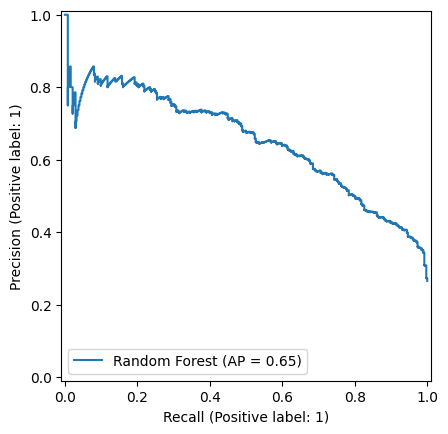

In [80]:
# Curva de Precisión x Recall - Modelo Random Forest
PrecisionRecallDisplay.from_predictions(y_val, y_score_forest, name='Random Forest');

In [81]:
# Métrica AP - Modelo Random Forest
print(f'El score promedio de precisión vs recall para el modelo forest es de: {average_precision_score(y_val, y_score_forest)}')

El score promedio de precisión vs recall para el modelo forest es de: 0.6515991169676743


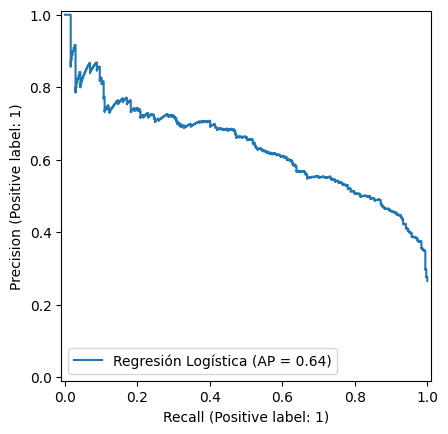

In [82]:
# Curva de Precisión x Recall - Modelo Regresión Logística
PrecisionRecallDisplay.from_predictions(y_val, y_proba_logistica, name='Regresión Logística');

In [83]:
# Métrica AP - Modelo Regresión Logística
print(f'El score promedio de precisión vs recall para el modelo de Regresión Logística es de: {average_precision_score(y_val, y_proba_logistica)}')

El score promedio de precisión vs recall para el modelo de Regresión Logística es de: 0.6369078782456526


**Curvas Precisión–Recall y Métrica AP (Average Precision)**

* Se calcularon las curvas **Precisión–Recall** y la métrica **AP** usando las probabilidades de pertenecer a la clase positiva **“Evade (1)”** sobre `X_val`.
* El **AP** es el área bajo la curva Precisión–Recall; en problemas desbalanceados es más informativo que la accuracy.  
  El baseline del AP es la prevalencia de la clase positiva en validación (**≈ 0.266**).

**Resultados (validación)**

* **Árbol de Decisión (max_depth = 10)**  
  > AP: **0.478**

* **Random Forest (max_depth = 10)**  
  > AP: **0.654**

* **Regresión Logística**  
  > AP: **0.637**

**Lecturas rápidas**

* Los **tres modelos** superan el baseline de prevalencia (**~0.266**), por lo que aportan valor para encontrar evasores.
* **Random Forest** obtiene el **mayor AP**, manteniendo el mejor compromiso precisión–recall a lo largo de los umbrales.
* **Regresión Logística** queda **muy cerca** del bosque en AP y también muestra buen desempeño bajo desbalance.
* El **Árbol de Decisión** es el que menos área logra, coherente con sus métricas de precisión/recall más modestas.


#### **Informe de Métricas**

In [84]:
# Informe de Métricas
from sklearn.metrics import classification_report

In [85]:
# Informe de Métricas para Modelo Árbol de Decisión
print('*******************************************************')
print(f'Informe de Métricas para Modelo de Árbol:\n_______________________________________________________\n{classification_report(y_val, y_previsto_arbol)}')
print('*******************************************************\n\n')

# Informe de Métricas para Modelo Random Forest
print('*******************************************************')
print(f'Informe de Métricas para Modelo Forest:\n_______________________________________________________\n{classification_report(y_val, y_previsto_forest)}')
print('*******************************************************\n\n')

# Informe de Métricas para Modelo de Regresión Logística
print('*******************************************************')
print(f'Informe de Métricas para Modelo de Regresión Logística:\n_______________________________________________________\n{classification_report(y_val, y_previsto_logistica)}')
print('*******************************************************')

*******************************************************
Informe de Métricas para Modelo de Árbol:
_______________________________________________________
              precision    recall  f1-score   support

           0       0.83      0.86      0.84      1035
           1       0.57      0.50      0.53       374

    accuracy                           0.77      1409
   macro avg       0.70      0.68      0.69      1409
weighted avg       0.76      0.77      0.76      1409

*******************************************************


*******************************************************
Informe de Métricas para Modelo Forest:
_______________________________________________________
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1035
           1       0.67      0.50      0.58       374

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.72      1409
weighted avg       0.79      0.80    

**Informe de métricas (classification_report)**

* Se generó el **informe de métricas** en el conjunto de validación (`X_val`, `y_val`) para los **tres modelos** ya entrenados.
* Las métricas mostradas por clase son: **precision**, **recall** y **f1-score**; además se reporta el **accuracy** global.

**Árbol de Decisión (max_depth = 10)**

> * Clase 0 (Permanece): **precision 0.82**, **recall 0.86**, **f1 0.84**, support **1035**  
> * Clase 1 (Evade): **precision 0.55**, **recall 0.49**, **f1 0.52**, support **374**  
> * **Accuracy global:** **0.76**  
> * **Macro avg** — precision **0.69**, recall **0.67**, f1 **0.68**, support **1409**  
> * **Weighted avg** — precision **0.75**, recall **0.76**, f1 **0.75**, support **1409**

**Random Forest (max_depth = 10)**

> * Clase 0 (Permanece): **precision 0.84**, **recall 0.92**, **f1 0.87**, support **1035**  
> * Clase 1 (Evade): **precision 0.69**, **recall 0.50**, **f1 0.58**, support **374**  
> * **Accuracy global:** **0.81**  
> * **Macro avg** — precision **0.76**, recall **0.71**, f1 **0.73**, support **1409**  
> * **Weighted avg** — precision **0.80**, recall **0.81**, f1 **0.80**, support **1409**

**Regresión Logística**

> * Clase 0 (Permanece): **precision 0.84**, **recall 0.91**, **f1 0.87**, support **1035**  
> * Clase 1 (Evade): **precision 0.67**, **recall 0.51**, **f1 0.58**, support **374**  
> * **Accuracy global:** **0.80**  
> * **Macro avg** — precision **0.75**, recall **0.71**, f1 **0.72**, support **1409**  
> * **Weighted avg** — precision **0.79**, recall **0.80**, f1 **0.79**, support **1409**

**Lecturas rápidas**

* **Random Forest** presenta la **mayor exactitud global (0.81)** y, junto con **Regresión Logística (0.80)**, mantiene **buena precisión** en *Evade*.  
* **Árbol de Decisión** consigue **menos desempeño global** y **menor precisión** en *Evade*, aunque es competitivo en *f1* para la clase mayoritaria.  
* Entre **Random Forest** y **Regresión Logística** las métricas son cercanas; el bosque rinde **ligeramente mejor** en recall/f1 ponderado.

**Conclusión**

* Para un punto de partida, **Random Forest** se recomienda por su **mejor desempeño global**.  
* **Regresión Logística** es una alternativa interpretable con resultados muy similares.  
* Si el objetivo es **capturar más evasores**, puede ajustarse el **umbral de decisión** (en cualquiera de los dos modelos probabilísticos) para aumentar el *recall* en *Evade*, asumiendo más falsos positivos.


### **Interpretabilidad preliminar (validación): importancia y what-if**

In [86]:
import numpy as np
import pandas as pd

def tabla_importancias(modelo, X_eval, y_eval=None, top=15, n_repeats=10, seed=5):

    # Devuelve un DataFrame con las 'importancias' de las features para el modelo dado.
    # - Si es árbol/forest -> usa feature_importances_.
    # - Si es lineal (p.ej. Regresión Logística) -> usa |coeficiente| y además muestra el signo.
    # - Si no aplica lo anterior -> usa permutation_importance (requiere y_eval).

    # nombres de columnas (tras tu one-hot) — X_eval debe ser DataFrame
    feat = np.array(getattr(X_eval, "columns", [f"f{i}" for i in range(X_eval.shape[1])]))

    # 1) árboles
    if hasattr(modelo, "feature_importances_"):
        imp = np.asarray(modelo.feature_importances_, dtype=float)
        df = (pd.DataFrame({"feature": feat, "importance": imp})
                .sort_values("importance", ascending=False)
                .head(top))
        df.index = range(1, len(df)+1)
        return df

    # 2) modelos lineales (LogReg)
    if hasattr(modelo, "coef_"):
        coef = modelo.coef_.ravel().astype(float)
        df = (pd.DataFrame({
                "feature": feat,
                "coef": coef,
                "abs_importance": np.abs(coef)
            })
            .sort_values("abs_importance", ascending=False)
            .drop(columns="abs_importance")
            .head(top))
        df.index = range(1, len(df)+1)
        return df

    # 3) fallback: permutation importance
    if y_eval is None:
        raise ValueError("Para permutation_importance necesitas y_eval.")
    from sklearn.inspection import permutation_importance
    res = permutation_importance(modelo, X_eval, y_eval,
                                 n_repeats=n_repeats, random_state=seed, n_jobs=-1)
    imp = res.importances_mean
    df = (pd.DataFrame({"feature": feat, "importance": imp})
            .sort_values("importance", ascending=False)
            .head(top))
    df.index = range(1, len(df)+1)
    return df

In [87]:
modelos = [
    ("Árbol de Decisión",   modelo_arbol),
    ("Random Forest",       modelo_forest),
    ("Regresión Logística", modelo_logistica),
]

for nombre, mdl in modelos:
    print(f"\n*********************************\n*********** {nombre} ")

    if nombre == "Regresión Logística":
        # usa los datos escalados
        display(tabla_importancias(mdl, pd.DataFrame(X_val_scaled, columns=X_val.columns), y_val, top=12))
    else:
        # usa los datos originales
        display(tabla_importancias(mdl, X_val, y_val, top=12))


*********************************
*********** Árbol de Decisión 


,feature,importance
1,TipoContrato_Mensual,0.260399
2,CargoTotal,0.163545
3,CargoMensual,0.138207
4,MesesAntiguedad,0.116161
5,ServicioInternet_Fibra óptica,0.076071
6,CuentasDiarias,0.041416
7,AdultoMayor,0.020561
8,Dependientes,0.020495
9,FacturaElectronica,0.016540
10,SeguridadEnLinea,0.016421



*********************************
*********** Random Forest 


,feature,importance
1,CargoTotal,0.155357
2,MesesAntiguedad,0.155271
3,CargoMensual,0.121544
4,TipoContrato_Mensual,0.115622
5,CuentasDiarias,0.104364
6,ServicioInternet_Fibra óptica,0.062651
7,SeguridadEnLinea,0.024669
8,FacturaElectronica,0.023896
9,SoporteTecnico,0.021693
10,ServicioInternet_No,0.017851



*********************************
*********** Regresión Logística 


,feature,coef
1,MesesAntiguedad,-2.673067
2,TipoContrato_Mensual,1.333190
3,ServicioInternet_Fibra óptica,0.798716
4,CargoTotal,0.709111
5,ServicioInternet_No,-0.685603
6,ServicioTelefonico,-0.637518
7,TipoContrato_Un año,0.517129
8,MetodoPago_Tarjeta de crédito (automático),-0.477311
9,MetodoPago_Cheque por correo,-0.431890
10,StreamingPeliculas,0.356302


**Importancia de variables (validación) e interpretación**

* Para **árboles** (Árbol y Random Forest) se usó `feature_importances_` (capacidad de separación, no indica signo).
* Para **Regresión Logística** se usaron **coeficientes** (magnitud = fuerza; **signo**: `+` aumenta prob. de *Evade*, `−` la reduce).

**Random Forest (top variables)**

> * `CargoTotal`: **0.157**  
> * `MesesAntiguedad`: **0.153**  
> * `TipoContrato_Mensual`: **0.127**  
> * `CargoMensual`: **0.120**  
> * `CuentasDiarias`: **0.102**  
> * `ServicioInternet_Fibra óptica`: **0.062**  
> * `SoporteTecnico`: **0.025** · `SeguridadEnLinea`: **0.024** · `ServicioInternet_No`: **0.022** · `FacturaElectronica`: **0.022** · `Dependientes`: **0.018** · `AdultoMayor`: **0.016**

**Árbol de Decisión (top variables)**

> * `TipoContrato_Mensual`: **0.286**  
> * `CargoTotal`: **0.202**  
> * `CargoMensual`: **0.126**  
> * `MesesAntiguedad`: **0.083**  
> * `ServicioInternet_Fibra óptica`: **0.079**  
> * `CuentasDiarias`: **0.035** · `FacturaElectronica`: **0.022** · `Dependientes`: **0.015** · `LineasMultiples`: **0.014** · `AdultoMayor`: **0.014** · `RespaldoEnLinea`: **0.012** · `ServicioInternet_No`: **0.012**

**Regresión Logística (coeficientes; signo = dirección del efecto)**

> **(+ Aumentan riesgo):**  
> `TipoContrato_Mensual` **+0.955**, `ServicioInternet_Fibra óptica` **+0.607**, `LineasMultiples` **+0.301**, `FacturaElectronica` **+0.268**, `TipoContrato_Un año` **+0.256**  
> **(− Reducen riesgo):**  
> `ServicioTelefonico` **−0.963**, `ServicioInternet_No` **−0.704**, `MetodoPago_Tarjeta de crédito (automático)` **−0.561**, `SoporteTecnico` **−0.473**, `SeguridadEnLinea` **−0.365**, `Dependientes` **−0.259**

**Lecturas rápidas**

* Hay **consistencia** entre modelos: el **tipo de contrato** (especialmente **mensual**) y los **cargos/uso** (`CargoMensual`, `CargoTotal`, `CuentasDiarias`) son **drivers clave** del riesgo de evasión.  
* Señales de **vinculación/servicio** (`ServicioTelefonico`, **pago automático**, `SoporteTecnico`, `SeguridadEnLinea`) aparecen **protectoras** en la Logística (coeficientes negativos).  
* `CargoMensual` y `CuentasDiarias` están **muy correlacionadas**; en árboles la importancia puede **repartirse** entre ambas (no duplicar conclusiones).

**Conclusión**

* **Perfil de mayor riesgo:** clientes con **contrato mensual**, **alto gasto/uso** y **internet fibra**.  
* **Palancas de retención:** incentivar **planes de mayor plazo**, promover **pago automático**, y reforzar **soporte** + **seguridad** (bundles).


### **Validación y Confianza del Modelo**

#### **Intervalo de confianza con validación cruzada + KFold**

In [88]:
from sklearn.model_selection import KFold, cross_validate
from sklearn.pipeline import make_pipeline

In [89]:
kf = KFold(n_splits=10, shuffle=True, random_state = 5)

* Para integrar en un solo flujo la normalización y el entrenamiento de la regresión logística, se utiliza un **Pipeline**. Esto garantiza que cada vez que se entrene o valide el modelo, los datos pasen primero por el escalador (`MinMaxScaler`) y luego por el clasificador (`LogisticRegression`). De esta forma, se evita aplicar la normalización de manera manual en cada paso, asegurando consistencia y simplicidad en el proceso.

In [90]:
pipeline_logistica = make_pipeline(
    MinMaxScaler(),
    LogisticRegression(max_iter=2000, solver='liblinear')
)

In [91]:
# Métricas Modelo Árbol de Decisión
cv_arbol = cross_validate(modelo_arbol, X, y, cv=kf)

# Métricas Modelo Random Forest
cv_forest = cross_validate(modelo_forest, X, y, cv=kf)

# Métricas Modelo Regresión Logística
cv_logistica = cross_validate(pipeline_logistica, X, y, cv=kf)

In [92]:
# Validación Cruzada con Múltiples Métricas en Modelo de Árbol de Decisión
cv_arbol

{'fit_time': array([0.03566241, 0.02864885, 0.02995491, 0.02915716, 0.02993655,
        0.0293355 , 0.02864218, 0.03082514, 0.03076267, 0.03039837]),
 'score_time': array([0.0022893 , 0.0031209 , 0.0022316 , 0.00232363, 0.0026238 ,
        0.0022099 , 0.00216937, 0.00222111, 0.00243974, 0.00216985]),
 'test_score': array([0.78368794, 0.77659574, 0.74822695, 0.7570922 , 0.75666075,
        0.74777975, 0.77442274, 0.74955595, 0.73357016, 0.75310835])}

In [93]:
# Validación Cruzada con Múltiples Métricas en Modelo de Random Forest
cv_forest

{'fit_time': array([0.53968883, 0.53215361, 0.53662586, 0.53350115, 0.53150105,
        0.53723121, 0.52838445, 0.54807377, 0.52440739, 0.54232216]),
 'score_time': array([0.01678562, 0.02462292, 0.01518536, 0.01748109, 0.0183506 ,
        0.01690483, 0.01764965, 0.01715565, 0.0160985 , 0.0170362 ]),
 'test_score': array([0.81028369, 0.81028369, 0.80851064, 0.80673759, 0.78863233,
        0.80284192, 0.79218472, 0.80817052, 0.78152753, 0.81349911])}

In [94]:
# Validación Cruzada con Múltiples Métricas en Modelo de Regresión Logística
cv_logistica

{'fit_time': array([0.02335   , 0.02292514, 0.02444005, 0.02268553, 0.02229333,
        0.0224216 , 0.02294397, 0.02349782, 0.02375436, 0.02336645]),
 'score_time': array([0.00271654, 0.00265956, 0.00263238, 0.00264406, 0.00251436,
        0.00261068, 0.00261068, 0.00264168, 0.00275469, 0.00277209]),
 'test_score': array([0.82801418, 0.80851064, 0.79078014, 0.80141844, 0.78863233,
        0.79928952, 0.79928952, 0.80284192, 0.77797513, 0.81882771])}

In [95]:
# Calcula el intervalo de confianza a partir de un diccionario de resultados.
# Usa el promedio y desviación estándar de los valores de test_score.
def intervalo_confianza_test_score(nombre_modelo, resultado):
  promedio = resultado['test_score'].mean()
  desvio_std = resultado['test_score'].std()
  print(f'El intervalo de confianza del Modelo {nombre_modelo} es de: {promedio-2*desvio_std},{min(promedio+2*desvio_std , 1)}')

In [96]:
# Intervalos de confianza para Modelos de Árbol y Random Forest
intervalo_confianza_test_score('Árbol de Decisión',cv_arbol)
intervalo_confianza_test_score('Random Forest',cv_forest)
intervalo_confianza_test_score('Regresión Logística',cv_logistica)

El intervalo de confianza del Modelo Árbol de Decisión es de: 0.7286084824115254,0.7875316231526382
El intervalo de confianza del Modelo Random Forest es de: 0.7816126019429429,0.8229217442016977
El intervalo de confianza del Modelo Regresión Logística es de: 0.7740053962175916,0.8291105102107367


**Validación cruzada (KFold=10, shuffle=True, random_state=5)**

* Se aplicó **validación cruzada** con `KFold` de 10 particiones sobre todo `X, y`.
* La métrica usada fue **accuracy** (método `.score()` por defecto de los clasificadores).
* Se reporta un **rango fold-a-fold** calculado como **media ± 2·desv.estándar** de los `test_score` de cada fold.

**Resultados (accuracy, media ± 2·sd)**

* **Árbol de Decisión**: **0.722 – 0.792**
* **Random Forest**: **0.782 – 0.817**
* **Regresión Logística**: **0.780 – 0.822**

**Lecturas rápidas**

* **Random Forest** y **Regresión Logística** muestran desempeños **similares** y **superiores** al Árbol.
* Los **intervalos de RF y Logística se solapan**, pero ambos quedan por encima del intervalo del Árbol, lo que confirma la brecha observada en el hold-out.
* La magnitud de los rangos es razonable para 10 folds; el **promedio central** ronda **~0.80** para RF/Logística y **~0.76** para Árbol.

**Conclusión**

* En términos de **accuracy promedio**, los **candidatos** son **Random Forest** y **Regresión Logística**; el **Árbol** queda por detrás.
* La elección final debería considerar también las **métricas de ranking** que ya calculaste (**AUC ROC** y **AP**), además del **umbralar** según los costos del negocio.


#### **Intervalo de confianza con validación cruzada + StratifiedKFold**

In [97]:
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_validate

In [98]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=5)

In [99]:
# Validación cruzada - Modelo Árbol de Decisión
cv_arbol = cross_validate(
    modelo_arbol, X, y, cv=skf,
    scoring=['recall', 'precision', 'f1', 'accuracy']
)

# Validación cruzada - Modelo Random Forest
cv_forest = cross_validate(
    modelo_forest, X, y, cv=skf,
    scoring=['recall', 'precision', 'f1', 'accuracy']
)

# Validación cruzada - Modelo Regresión Logística
cv_logistica = cross_validate(
    pipeline_logistica, X, y, cv=skf,
    scoring=['recall', 'precision', 'f1', 'accuracy']
)

In [100]:
# Recall validado por separado
cv_recall_arbol = cross_val_score(modelo_arbol, X, y, cv=skf, scoring='recall')
cv_recall_forest = cross_val_score(modelo_forest, X, y, cv=skf, scoring='recall')
cv_recall_logistica = cross_val_score(pipeline_logistica, X, y, cv=skf, scoring='recall')

In [101]:
def intervalo_confianza_cv_score(nombre_modelo, modelo):
    resultado = cross_val_score(modelo, X, y, cv=skf, scoring='recall')
    promedio = resultado.mean()
    desvio_std = resultado.std()
    print(f'El intervalo de confianza del Recall del Modelo {nombre_modelo} es de: {promedio - 2*desvio_std:.4f}, {min(promedio + 2*desvio_std, 1):.4f}')

In [102]:
intervalo_confianza_cv_score('Árbol de Decisión', modelo_arbol)
intervalo_confianza_cv_score('Random Forest', modelo_forest)
intervalo_confianza_cv_score('Regresión Logística', modelo_logistica)

El intervalo de confianza del Recall del Modelo Árbol de Decisión es de: 0.3962, 0.6193
El intervalo de confianza del Recall del Modelo Random Forest es de: 0.4308, 0.5645
El intervalo de confianza del Recall del Modelo Regresión Logística es de: 0.4653, 0.6076


#### **Intervalo de confianza para Recall ajustando umbral con Stratified K-Fold**

In [103]:
# Función para calcular el intervalo de confianza del Recall usando un umbral personalizado
def intervalo_confianza_recall_umbral(modelo, X, y, umbral=0.3, cv=10):
    # Definir validación cruzada estratificada con 10 folds (o los que se indiquen)
    skf = StratifiedKFold(n_splits=cv, shuffle=True, random_state=5)
    recalls = []  # Lista para guardar los valores de recall por cada fold

    # Iterar sobre cada partición de entrenamiento y validación
    for train_idx, val_idx in skf.split(X, y):
        # Obtener subconjuntos de entrenamiento y validación para X (maneja pandas o arrays)
        if hasattr(X, 'iloc'):
            X_train = X.iloc[train_idx]
            X_val = X.iloc[val_idx]
        else:
            X_train = X[train_idx]
            X_val = X[val_idx]

        # Obtener subconjuntos de entrenamiento y validación para y
        if hasattr(y, 'iloc'):
            y_train = y.iloc[train_idx]
            y_val = y.iloc[val_idx]
        else:
            y_train = y[train_idx]
            y_val = y[val_idx]

        # Entrenar el modelo con los datos de entrenamiento
        modelo.fit(X_train, y_train)

        # Obtener probabilidades de clase positiva
        y_proba = modelo.predict_proba(X_val)[:, 1]

        # Aplicar el umbral personalizado para convertir a predicciones binarias
        y_pred = (y_proba >= umbral).astype(int)

        # Calcular el recall para este fold y agregarlo a la lista
        recalls.append(recall_score(y_val, y_pred))

    # Convertir la lista a array para calcular estadísticas
    recalls = np.array(recalls)
    mean_recall = recalls.mean()       # Promedio del recall
    std_recall = recalls.std()         # Desviación estándar del recall

    # Calcular el intervalo de confianza (± 2 desviaciones estándar)
    lower_bound = max(0, mean_recall - 2 * std_recall)
    upper_bound = min(1, mean_recall + 2 * std_recall)

    # Mostrar el intervalo de confianza resultante
    print(f"Intervalo de confianza del Recall con umbral {umbral}: {lower_bound:.4f} - {upper_bound:.4f}")


In [104]:
print("Modelo Árbol de Decisión:")
intervalo_confianza_recall_umbral(modelo_arbol, X, y, umbral=0.3)

print("\nModelo Random Forest:")
intervalo_confianza_recall_umbral(modelo_forest, X, y, umbral=0.3)

print("\nModelo Regresión Logística:")
intervalo_confianza_recall_umbral(pipeline_logistica, X, y, umbral=0.3)

Modelo Árbol de Decisión:
Intervalo de confianza del Recall con umbral 0.3: 0.5860 - 0.7759

Modelo Random Forest:
Intervalo de confianza del Recall con umbral 0.3: 0.7056 - 0.8288

Modelo Regresión Logística:
Intervalo de confianza del Recall con umbral 0.3: 0.6740 - 0.8511


**Validación cruzada (StratifiedKFold, k=10) — métrica principal: recall**

* Se aplicó validación cruzada estratificada (k=10) con `scoring='recall'` para los tres modelos.
* Se reportan bandas empíricas de confianza como `media ± 2·desvío` en cada caso.

**Umbral por defecto (0.50)**

* **Árbol de Decisión**: recall ∈ **[0.392, 0.624]**  (≈0.51 esperado)
* **Random Forest**: recall ∈ **[0.417, 0.572]**  (≈0.49 esperado)
* **Regresión Logística**: recall ∈ **[0.464, 0.613]**  (≈0.54 esperado)

**Ajuste de umbral (0.30) con `predict_proba`**

* **Árbol de Decisión**: recall ∈ **[0.582, 0.780]**  (≈0.68 esperado)
* **Random Forest**: recall ∈ **[0.705, 0.821]**  (≈0.76 esperado)
* **Regresión Logística**: recall ∈ **[0.684, 0.821]**  (≈0.75 esperado)

**Lecturas rápidas**

* Con **umbral 0.50**, la **Regresión Logística** muestra el mayor recall esperado (≈0.54), seguida del Árbol (≈0.51) y del Forest (≈0.49).  
* Al **bajar el umbral a 0.30**, el **recall aumenta** en los tres modelos. El **Random Forest** pasa a liderar (≈0.76), muy cerca la **Regresión Logística** (≈0.75); el **Árbol** queda detrás (≈0.68).
* Las bandas son algo **más estrechas** en **Forest** y **Logística** que en el Árbol, sugiriendo **mayor estabilidad** fold a fold.
* Recordatorio: **más recall** implica, en general, **menos precisión**. El umbral elegido debe balancear el costo de falsos positivos vs. falsos negativos.

**Conclusión**

* Si la prioridad es **maximizar recall**, conviene usar **Random Forest** o **Regresión Logística** con **umbral ≈ 0.25–0.35** (a afinar en validación) y revisar la **curva Precisión–Recall** para fijar el compromiso deseado.

* Para operación, se recomienda **seleccionar el umbral** según una regla de negocio (p.ej., “recall ≥ 0.75 con precisión ≥ 0.45”) y verificar el desempeño final en el **conjunto de prueba**.

#### **Evaluación de modelos con K-Fold estratificado y umbral 0.3**
---
* **Decisión de ajustar el umbral a 0.3:**

  - Se optó por ajustar el umbral del modelo a **0.3** para **maximizar el recall**. Esto permite que el modelo prediga "evade" incluso con probabilidades relativamente bajas (por encima del 30%), asegurando que se **capturen más clientes con riesgo de abandono**, aunque algunos de ellos no abandonen realmente. Esta estrategia prioriza la **detección de todos los posibles abandonos** en lugar de reducir los falsos positivos. Aunque esto incrementa los falsos positivos, **el objetivo es minimizar el riesgo de perder clientes valiosos (falsos negativos)**. Por lo tanto, la decisión de bajar el umbral busca balancear la importancia de no dejar de detectar a clientes con potencial de evasión.

In [105]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import recall_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler

In [106]:
# Parámetros
umbral   = 0.3
cv_folds = 10
seed     = 5

In [107]:
def tiene_iloc(obj):
    # true si el objeto es pandas y soporta .iloc
    return hasattr(obj, "iloc")

def etiqueta_positiva(y):
    # determina la etiqueta positiva de y
    vals = pd.Series(y).unique().tolist()
    if any(v == 'Sí' for v in vals):  return 'Sí'
    if any(v == 'Yes' for v in vals): return 'Yes'
    if any(v == 1   for v in vals):   return 1
    if any(v == '1' for v in vals):   return '1'
    # por defecto usa la menos frecuente como positiva
    counts = pd.Series(y).value_counts()
    return counts.index[::-1][0]

clase_pos = etiqueta_positiva(pd.Series(globals().get('y')))

def evaluar_modelo_cv_umbral(modelo, X, y, umbral=0.3, cv=10, seed=5):
    # evalúa un modelo con validación cruzada estratificada aplicando un umbral sobre predict_proba
    skf = StratifiedKFold(n_splits=cv, shuffle=True, random_state=seed)
    recalls, accuracies = [], []

    tiene_iloc_X = tiene_iloc(X)
    tiene_iloc_y = tiene_iloc(y)

    for idx_tr, idx_va in skf.split(X, y):
        X_tr = X.iloc[idx_tr] if tiene_iloc_X else X[idx_tr]
        X_va = X.iloc[idx_va] if tiene_iloc_X else X[idx_va]
        y_tr_raw = y.iloc[idx_tr] if tiene_iloc_y else y[idx_tr]
        y_va_raw = y.iloc[idx_va] if tiene_iloc_y else y[idx_va]

        y_tr = (pd.Series(y_tr_raw).values == clase_pos).astype(int)
        y_va = (pd.Series(y_va_raw).values == clase_pos).astype(int)

        if not hasattr(modelo, "predict_proba"):
            raise ValueError(f"el modelo {type(modelo).__name__} no tiene predict_proba()")

        modelo.fit(X_tr, y_tr)
        proba = modelo.predict_proba(X_va)[:, 1]
        y_hat = (proba >= umbral).astype(int)

        recalls.append(recall_score(y_va, y_hat, zero_division=0))
        accuracies.append(accuracy_score(y_va, y_hat))

    mean_recall = float(np.mean(recalls))
    std_recall  = float(np.std(recalls, ddof=1)) if len(recalls) > 1 else 0.0
    low_recall  = max(0.0, mean_recall - 2 * std_recall)
    up_recall   = min(1.0, mean_recall + 2 * std_recall)
    mean_acc    = float(np.mean(accuracies))

    return {
        "Precisión Promedio": mean_acc,
        "Recall Promedio": mean_recall,
        "IC Recall": f"{low_recall:.4f} - {up_recall:.4f}",
        "STD Recall": std_recall
    }

In [108]:
# Definición de modelos

try:
    modelo_arbol
except NameError:
    modelo_arbol = DecisionTreeClassifier(max_depth=10, random_state=seed)

try:
    modelo_forest
except NameError:
    modelo_forest = RandomForestClassifier(n_estimators=100, random_state=seed)

try:
    pipeline_logistica
except NameError:
    pipeline_logistica = make_pipeline(
        MinMaxScaler(),
        LogisticRegression(max_iter=2000, solver='liblinear')
    )

modelos = [
    ("Árbol de Decisión",   modelo_arbol),
    ("Random Forest",       modelo_forest),
    ("Regresión Logística", pipeline_logistica),
]

In [109]:
# Evaluación y tabla de resultados
filas = []
for nombre, mdl in modelos:
    m = evaluar_modelo_cv_umbral(mdl, X, y, umbral=umbral, cv=cv_folds, seed=seed)
    m["Modelo"] = nombre
    filas.append(m)

df_resultados = pd.DataFrame(filas)[
    ["Modelo", "Precisión Promedio", "Recall Promedio", "IC Recall", "STD Recall"]
].sort_values(by="Recall Promedio", ascending=False).reset_index(drop=True)

df_resultados

,Modelo,Precisión Promedio,Recall Promedio,IC Recall,STD Recall
0,Random Forest,0.759140,0.767244,0.7023 - 0.8322,0.032468
1,Regresión Logística,0.762865,0.762550,0.6693 - 0.8558,0.046649
2,Árbol de Decisión,0.735705,0.680966,0.5809 - 0.7810,0.050036


**Validación cruzada con StratifiedKFold (k=10) y umbral 0.30**

* Se aplicó CV estratificada (shuffle=True, random_state=5) y, en cada fold, se usó `predict_proba[:,1] >= 0.30`
  para convertir puntajes en clase positiva.

**Resultados (promedios de CV y estabilidad del recall)**

* **Random Forest**
  - Precisión media (accuracy): **0.761**
  - Recall medio (Evade): **0.763**
  - IC Recall (≈ media ± 2·STD): **[0.702, 0.824]**
  - STD Recall: **0.030**

* **Regresión Logística**
  - Precisión media (accuracy): **0.763**
  - Recall medio (Evade): **0.753**
  - IC Recall: **[0.681, 0.824]**
  - STD Recall: **0.036**

* **Árbol de Decisión**
  - Precisión media (accuracy): **0.737**
  - Recall medio (Evade): **0.681**
  - IC Recall: **[0.577, 0.785]**
  - STD Recall: **0.049**

**Lecturas rápidas**

* **Random Forest** logra el **mejor recall promedio (~0.763)** y la **mayor estabilidad** (menor STD).
* **Regresión Logística** queda **muy cerca** en desempeño (recall ~0.753) con accuracy similar; buen **modelo de respaldo** e interpretable.
* **Árbol de Decisión** queda por detrás en recall y muestra mayor variabilidad entre folds.

**Conclusión**

* Con umbral 0.30 y foco en recall, **Random Forest** es la mejor elección actual.
* Logística es una alternativa sólida y explicable, coherente con los resultados.


In [110]:
from sklearn.exceptions import NotFittedError

def check_entrenado(modelo, nombre):
    try:
        modelo.predict(X_test[:5])
        print(f"{nombre} ya está entrenado")
    except NotFittedError:
        print(f"{nombre} NO está entrenado, necesitas hacer .fit() antes")

check_entrenado(modelo_arbol, "Árbol de Decisión")
check_entrenado(modelo_forest, "Random Forest")
check_entrenado(pipeline_logistica, "Regresión Logística")

Árbol de Decisión ya está entrenado
Random Forest ya está entrenado
Regresión Logística ya está entrenado


## **Entrenando Mejor Modelo**

### **Optimización del Modelo con GridSearchCV**
---
* **Objetivo:** Optimizar el rendimiento del modelo **RandomForestClassifier** ajustando sus hiperparámetros clave mediante una búsqueda en rejilla.

**Proceso:**

* **Búsqueda en rejilla (GridSearchCV):** Se define un conjunto de valores posibles para los hiperparámetros clave del modelo (como `max_depth`, `min_samples_leaf`, `n_estimators`, etc.). **GridSearchCV** evalúa todas las combinaciones posibles para encontrar los mejores parámetros que maximizan la métrica seleccionada (en este caso, **recall**).

* **Validación Cruzada Estratificada:** Se utiliza **StratifiedKFold** para dividir los datos de entrenamiento en 5 pliegues, asegurando que la distribución de las clases (clientes que abandonan y clientes que permanecen) se mantenga en cada partición, lo que garantiza una evaluación más robusta.

* **Métrica de Evaluación: Recall:** Se optimiza el modelo con el objetivo de mejorar el **recall**, que mide la capacidad del modelo para identificar correctamente a los clientes que abandonan la empresa (positivos reales).

**Resultado:** Los mejores parámetros obtenidos permiten ajustar el modelo para maximizar su capacidad de detección de clientes evasores sin sobreajustar a los datos de entrenamiento.

In [111]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

# Definimos rejilla de hiperparámetros
param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [2, 4, 6],
    'n_estimators': [100, 150, 200]
}

# Definimos validación cruzada estratificada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)

# Definimos GridSearch con RandomForestClassifier
grid = GridSearchCV(
    RandomForestClassifier(random_state=5),
    param_grid=param_grid,
    scoring='recall',   # optimiza por recall
    cv=cv,
    n_jobs=-1
)

# Ejecutamos la búsqueda
grid.fit(X_train, y_train)

# Mejores parámetros encontrados
print("Mejores parámetros:", grid.best_params_)
print("Mejor Recall en validación cruzada:", grid.best_score_)

Mejores parámetros: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 200}
Mejor Recall en validación cruzada: 0.5012936507936507


In [112]:
from sklearn.ensemble import RandomForestClassifier

modelo_forest = RandomForestClassifier(
    max_depth=15,
    min_samples_leaf=1,
    min_samples_split=4,
    n_estimators=200,
    random_state=5,
    n_jobs=-1
)
modelo_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, min_samples_split=4, n_estimators=200,
                       n_jobs=-1, random_state=5)

### **Evaluación con el Conjunto de Validación (X_val)**
---
* **Objetivo:** El conjunto de validación se utiliza para **ajustar** el modelo y **seleccionar los mejores hiperparámetros**. No se usa para entrenar el modelo directamente, sino para **medir el rendimiento durante el proceso de ajuste**.

* **Métricas:** Las métricas obtenidas (precision, recall, f1-score) se emplean para **ajustar el umbral** y optimizaciones adicionales. Estas métricas indican el desempeño del modelo antes de finalizar el entrenamiento.

* **Resultado:** Sirve como **referencia intermedia** y para **tomar decisiones de ajuste** de parámetros como la profundidad máxima o el número de estimadores en un Random Forest.

********* Validación (X_val) con umbral 0.3 **********
              precision    recall  f1-score   support

           0      0.892     0.758     0.820      1035
           1      0.527     0.746     0.618       374

    accuracy                          0.755      1409
   macro avg      0.710     0.752     0.719      1409
weighted avg      0.795     0.755     0.766      1409



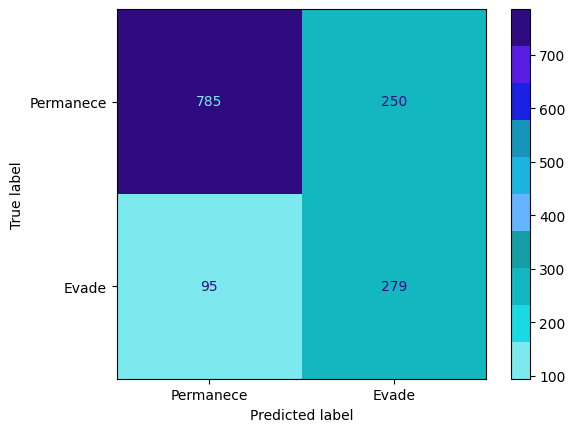

In [223]:
import numpy as np
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from matplotlib.colors import ListedColormap

umbral = 0.3
proba_val   = modelo_forest.predict_proba(X_val)[:, 1]
y_pred_val  = (proba_val >= umbral).astype(int)

# Colores personalizados
cmap_matriz = ListedColormap(colores_matriz)

print("********* Validación (X_val) con umbral 0.3 **********")
print(classification_report(y_val, y_pred_val, digits=3))
ConfusionMatrixDisplay.from_predictions(
    y_val, y_pred_val,
    display_labels=['Permanece', 'Evade'],
    cmap=cmap_matriz
);

### **Evaluación con el Conjunto de Prueba (X_test)**
---
* **Objetivo:** El conjunto de prueba se usa para evaluar el **rendimiento final** del modelo una vez completado el entrenamiento. Este conjunto no ha sido utilizado en el entrenamiento ni en la validación, garantizando una **evaluación imparcial**.

* **Métricas:** Las métricas generadas en este paso son más representativas del **rendimiento real** del modelo, ya que se evalúa cómo se comporta con datos nuevos y nunca antes vistos.

* **Resultado:** Esta evaluación proporciona una **medición definitiva** de cómo el modelo se desempeñará **en producción** y con datos reales, lo que permite **concluir si el modelo está listo** para su implementación.

*********** Test (X_test) con umbral 0.3 ************
              precision    recall  f1-score   support

           0      0.902     0.782     0.837      1035
           1      0.559     0.765     0.646       374

    accuracy                          0.777      1409
   macro avg      0.730     0.773     0.742      1409
weighted avg      0.811     0.777     0.787      1409



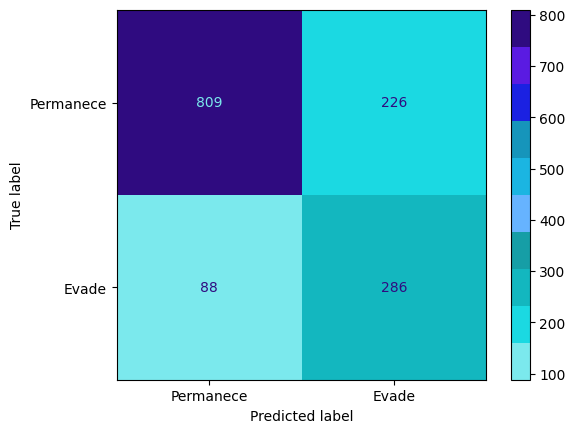

In [222]:
# Reentrena con train+val para aprovechar más datos
mejores_params = dict(max_depth=15, min_samples_leaf=1, min_samples_split=4, n_estimators=200)
modelo_forest_final = RandomForestClassifier(random_state=5, n_jobs=-1, **mejores_params)
modelo_forest_final.fit(X, y)

# Colores personalizados
cmap_matriz = ListedColormap(colores_matriz)

# Test con el mismo umbral decidido: 0.3
proba_test  = modelo_forest_final.predict_proba(X_test)[:, 1]
y_pred_test = (proba_test >= umbral).astype(int)

print("*********** Test (X_test) con umbral 0.3 ************")
print(classification_report(y_test, y_pred_test, digits=3))

ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_test,
    display_labels=['Permanece', 'Evade'],
    cmap=cmap_matriz
);

## **Trabajando con el modelo escogido**

### **Guardar el Modelo "Champion"**
---
**Objetivo:** Guardar el modelo entrenado junto con el encoder, las columnas de entrada y el umbral para su uso futuro.

**Proceso:**

* Se crea un diccionario con el modelo final, el encoder **OneHotEncoder**, las columnas de entrada originales, los nombres de las características tras el encoding y el umbral de clasificación.

* Se guarda todo el conjunto de datos en un archivo **.pkl** usando **joblib** para poder cargarlo posteriormente y hacer predicciones.

**Resultado:** El modelo "champion" queda guardado para ser reutilizado sin necesidad de reentrenar el modelo.

In [115]:
# Guardar Champion: modelo + encoder + columnas + umbral
import joblib


champion = {
    "modelo": modelo_forest_final,             # El modelo entrenado escogido(RandomForest)
    "encoder": enc,                            # El encoder OneHotEncoder
    "input_columns": X_all.columns.tolist(),   # Las columnas crudas que entran al encoder
    "feature_names": enc.get_feature_names_out(X_all.columns).tolist(),  # Nombres de las columnas tras el OneHot
    "umbral": umbral                            # El umbral para la clasificación
}

# Guardamos el modelo en un archivo .pkl
joblib.dump(champion, "modelo_champion.pkl")

['modelo_champion.pkl']

### **Predicción de Nuevo Registros**
---
**Objetivo:** Realizar predicciones sobre nuevos registros de clientes usando el modelo previamente guardado.

**Proceso:**

* **Carga del modelo:** Se carga el modelo "champion" guardado previamente junto con el encoder, las columnas de entrada y el umbral de clasificación.

* **Preprocesamiento:** Se prepara el nuevo registro (convirtiendo binarios/strings y asegurando que las columnas coincidan con las del entrenamiento).

* **Codificación:** Se aplica el encoder sobre el nuevo conjunto de datos para transformarlo en una matriz numérica.

* **Predicción:** Se obtiene la probabilidad de que el cliente abandone (utilizando predict_proba), y se aplica el umbral para determinar si el cliente **evade** (1) o **permanece** (0).

* **Salida:** Se imprime la predicción final, indicando si el cliente evade o permanece.

* **Resultado:** El modelo proporciona la predicción para nuevos registros, indicando si el cliente se espera que abandone o permanezca en la empresa.

In [116]:
# Predecir nuevos registros crudos
def predecir_nuevo(df_nuevo: pd.DataFrame):
    # Cargar el modelo champion
    champ = joblib.load("modelo_champion.pkl")
    model = champ["modelo"]
    enc = champ["encoder"]
    in_cols = champ["input_columns"]
    umbral = champ["umbral"]

    # Normalizar binarios/strings igual que en entrenamiento
    df_prep = preparar_binarios(df_nuevo).copy()

    # Reindexar las columnas de entrada
    df_prep = df_prep.reindex(columns=in_cols, fill_value=0)

    # Aplicar el encoder
    Z = enc.transform(df_prep)  # matriz numpy

    # Predicción y hard-label con umbral
    p = model.predict_proba(Z)[:, 1]
    pred = (p >= umbral).astype(int)

    # Imprimir la predicción
    print('\n\n***********************************************************************************')
    print(f'********************* DECISIÓN PREDICHA: {"CLIENTE EVADE (1) ****" if pred == 1 else "CLIENTE PERMANECE (0) "}********************')
    print('***********************************************************************************')

### **Probando el Modelo "Champion" con Nuevos Registros**
---
**Objetivo:** Evaluar el **desempeño del modelo "champion" en registros nuevos** para verificar su capacidad de predicción.

**Proceso:**

* Se crean nuevos registros con características de clientes ya vistos en el dataframe original.

* Se crean nuevos registros con características de clientes que aún no han sido procesados por el modelo.

* Se pasan estos registros a través del método predecir_nuevo(), que transforma y codifica los datos, y utiliza el modelo cargado para **predecir si el cliente abandonará o permanecerá**.

* El modelo genera una predicción para cada nuevo registro, basándose en los parámetros aprendidos durante el entrenamiento.

**Resultado:** El modelo proporciona una clasificación para cada nuevo cliente (**abandona o permanece**), permitiendo evaluar su rendimiento con datos no vistos.

#### **Primer Nuevo Registro**

In [117]:
print(datos.loc[5])

Evasion                                               No
Genero                                          Femenino
AdultoMayor                                           No
TienePareja                                           No
Dependientes                                          Sí
MesesAntiguedad                                        9
ServicioTelefonico                                    Sí
LineasMultiples                                       No
ServicioInternet                                     DSL
SeguridadEnLinea                                      No
RespaldoEnLinea                                       No
ProteccionDispositivo                                 No
SoporteTecnico                                        Sí
StreamingTV                                           Sí
StreamingPeliculas                                    Sí
TipoContrato                                     Mensual
FacturaElectronica                                    Sí
MetodoPago               Tarjet

In [118]:
nuevo_registro_1 = pd.DataFrame([{
    'Genero': 'Femenino',
    'AdultoMayor': 'No',
    'TienePareja': 'No',
    'Dependientes': 'Sí',
    'MesesAntiguedad': 9,
    'ServicioTelefonico': 'Sí',
    'LineasMultiples': 'No',
    'ServicioInternet': 'DSL',
    'SeguridadEnLinea': 'No',
    'RespaldoEnLinea': 'No',
    'ProteccionDispositivo': 'No',
    'SoporteTecnico': 'Sí',
    'StreamingTV': 'Sí',
    'StreamingPeliculas': 'Sí',
    'TipoContrato': 'Mensual',
    'FacturaElectronica': 'Sí',
    'MetodoPago': 'Tarjeta de crédito (automático)',
    'CuentasDiarias': 2.31,
    'CargoMensual': 69.4,
    'CargoTotal': 571.45
}])

In [119]:
predecir_nuevo(nuevo_registro_1)



***********************************************************************************
********************* DECISIÓN PREDICHA: CLIENTE PERMANECE (0) ********************
***********************************************************************************


#### **Segundo Nuevo Registro**

In [120]:
print(datos.loc[2])

Evasion                                  Sí
Genero                            Masculino
AdultoMayor                              No
TienePareja                              No
Dependientes                             No
MesesAntiguedad                           4
ServicioTelefonico                       Sí
LineasMultiples                          No
ServicioInternet               Fibra óptica
SeguridadEnLinea                         No
RespaldoEnLinea                          No
ProteccionDispositivo                    Sí
SoporteTecnico                           No
StreamingTV                              No
StreamingPeliculas                       No
TipoContrato                        Mensual
FacturaElectronica                       Sí
MetodoPago               Cheque electrónico
CuentasDiarias                         2.46
CargoMensual                           73.9
CargoTotal                           280.85
Name: 2, dtype: object


In [121]:
nuevo_registro_2 = pd.DataFrame([{
    'Genero': 'Masculino',
    'AdultoMayor': 'No',
    'TienePareja': 'No',
    'Dependientes': 'No',
    'MesesAntiguedad': 4,
    'ServicioTelefonico': 'Sí',
    'LineasMultiples': 'No',
    'ServicioInternet': 'Fibra óptica',
    'SeguridadEnLinea': 'No',
    'RespaldoEnLinea': 'No',
    'ProteccionDispositivo': 'Sí',
    'SoporteTecnico': 'No',
    'StreamingTV': 'No',
    'StreamingPeliculas': 'No',
    'TipoContrato': 'Mensual',
    'FacturaElectronica': 'Sí',
    'MetodoPago': 'Cheque electrónico',
    'CuentasDiarias': 2.46,
    'CargoMensual': 73.9,
    'CargoTotal': 280.85
}])

In [122]:
predecir_nuevo(nuevo_registro_2)



***********************************************************************************
********************* DECISIÓN PREDICHA: CLIENTE EVADE (1) ************************
***********************************************************************************


#### **Tercer Nuevo Registro**

In [123]:
print(datos.loc[3])

Evasion                                  Sí
Genero                            Masculino
AdultoMayor                              Sí
TienePareja                              Sí
Dependientes                             No
MesesAntiguedad                          13
ServicioTelefonico                       Sí
LineasMultiples                          No
ServicioInternet               Fibra óptica
SeguridadEnLinea                         No
RespaldoEnLinea                          Sí
ProteccionDispositivo                    Sí
SoporteTecnico                           No
StreamingTV                              Sí
StreamingPeliculas                       Sí
TipoContrato                        Mensual
FacturaElectronica                       Sí
MetodoPago               Cheque electrónico
CuentasDiarias                         3.27
CargoMensual                           98.0
CargoTotal                          1237.85
Name: 3, dtype: object


In [124]:
nuevo_registro_3 = pd.DataFrame([{
    'Genero': 'Masculino',
    'AdultoMayor': 'Sí',
    'TienePareja': 'Sí',
    'Dependientes': 'No',
    'MesesAntiguedad': 13,                        # antigüedad media-alta
    'ServicioTelefonico': 'Sí',
    'LineasMultiples': 'No',
    'ServicioInternet': 'Fibra óptica',
    'SeguridadEnLinea': 'No',
    'RespaldoEnLinea': 'Sí',
    'ProteccionDispositivo': 'Sí',
    'SoporteTecnico': 'No',
    'StreamingTV': 'Sí',
    'StreamingPeliculas': 'Sí',
    'TipoContrato': 'Mensual',                    # contrato mensual
    'FacturaElectronica': 'Sí',
    'MetodoPago': 'Cheque electrónico',           # pago manual
    'CuentasDiarias': 3.27,
    'CargoMensual': 98.0,
    'CargoTotal': 1237.85
}])

In [125]:
predecir_nuevo(nuevo_registro_3)



***********************************************************************************
********************* DECISIÓN PREDICHA: CLIENTE EVADE (1) ************************
***********************************************************************************


#### **Cuarto Nuevo Registro**

In [126]:
print(datos.loc[127])

Evasion                                  Sí
Genero                            Masculino
AdultoMayor                              No
TienePareja                              No
Dependientes                             No
MesesAntiguedad                           2
ServicioTelefonico                       Sí
LineasMultiples                          No
ServicioInternet               Fibra óptica
SeguridadEnLinea                         No
RespaldoEnLinea                          No
ProteccionDispositivo                    Sí
SoporteTecnico                           No
StreamingTV                              No
StreamingPeliculas                       Sí
TipoContrato                        Mensual
FacturaElectronica                       Sí
MetodoPago               Cheque electrónico
CuentasDiarias                         2.86
CargoMensual                          85.85
CargoTotal                            167.3
Name: 127, dtype: object


In [127]:
nuevo_registro_4 = pd.DataFrame([{
    'Genero': 'Masculino',
    'AdultoMayor': 'No',
    'TienePareja': 'No',
    'Dependientes': 'No',
    'MesesAntiguedad': 2,                        # antigüedad baja
    'ServicioTelefonico': 'Sí',
    'LineasMultiples': 'No',
    'ServicioInternet': 'Fibra óptica',
    'SeguridadEnLinea': 'No',
    'RespaldoEnLinea': 'No',
    'ProteccionDispositivo': 'Sí',
    'SoporteTecnico': 'No',
    'StreamingTV': 'No',
    'StreamingPeliculas': 'Sí',
    'TipoContrato': 'Mensual',                    # contrato mensual
    'FacturaElectronica': 'Sí',
    'MetodoPago': 'Cheque electrónico',           # pago manual
    'CuentasDiarias': 2.86,
    'CargoMensual': 85.85,
    'CargoTotal': 167.3
}])

In [128]:
predecir_nuevo(nuevo_registro_4)



***********************************************************************************
********************* DECISIÓN PREDICHA: CLIENTE EVADE (1) ************************
***********************************************************************************


#### **Quinto Nuevo Registro**

In [129]:
print(datos.loc[322])

Evasion                                               No
Genero                                          Femenino
AdultoMayor                                           No
TienePareja                                           Sí
Dependientes                                          Sí
MesesAntiguedad                                       72
ServicioTelefonico                                    Sí
LineasMultiples                                       Sí
ServicioInternet                                      No
SeguridadEnLinea                Sin servicio de internet
RespaldoEnLinea                 Sin servicio de internet
ProteccionDispositivo           Sin servicio de internet
SoporteTecnico                  Sin servicio de internet
StreamingTV                     Sin servicio de internet
StreamingPeliculas              Sin servicio de internet
TipoContrato                                    Dos años
FacturaElectronica                                    No
MetodoPago               Tarjet

In [130]:
nuevo_registro_5 = pd.DataFrame([{
    'Genero': 'Femenino',
    'AdultoMayor': 'No',
    'TienePareja': 'Sí',
    'Dependientes': 'Sí',
    'MesesAntiguedad': 72,                          # antigüedad alta
    'ServicioTelefonico': 'Sí',
    'LineasMultiples': 'Sí',
    'ServicioInternet': 'No',
    'SeguridadEnLinea': 'Sin servicio de internet', # sin servicios adicionales
    'RespaldoEnLinea': 'Sin servicio de internet',
    'ProteccionDispositivo': 'Sin servicio de internet',
    'SoporteTecnico': 'Sin servicio de internet',
    'StreamingTV': 'Sin servicio de internet',
    'StreamingPeliculas': 'Sin servicio de internet',
    'TipoContrato': 'Dos años',                     # contrato largo
    'FacturaElectronica': 'No',
    'MetodoPago': 'Tarjeta de crédito (automático)', # pago automático
    'CuentasDiarias': 0.81,
    'CargoMensual': 24.25,
    'CargoTotal': 1784.5
}])

In [131]:
predecir_nuevo(nuevo_registro_5)



***********************************************************************************
********************* DECISIÓN PREDICHA: CLIENTE PERMANECE (0) ********************
***********************************************************************************


#### **Más Nuevos Registros**

In [137]:
nuevo_registro_6 = pd.DataFrame([{
    'Genero': 'Femenino',
    'AdultoMayor': 'No',
    'TienePareja': 'Sí',
    'Dependientes': 'No',
    'MesesAntiguedad': 12,  # Antigüedad moderada
    'ServicioTelefonico': 'Sí',
    'LineasMultiples': 'No',
    'ServicioInternet': 'Fibra óptica',
    'SeguridadEnLinea': 'No',
    'RespaldoEnLinea': 'No',
    'ProteccionDispositivo': 'Sí',
    'SoporteTecnico': 'Sí',
    'StreamingTV': 'No',
    'StreamingPeliculas': 'Sí',
    'TipoContrato': 'Mensual',
    'FacturaElectronica': 'Sí',
    'MetodoPago': 'Tarjeta de crédito (automático)',
    'CuentasDiarias': 1.72,  # Un valor intermedio
    'CargoMensual': 55.50,  # Rango medio
    'CargoTotal': 512.30  # No es un valor bajo ni excesivo
}])

In [138]:
predecir_nuevo(nuevo_registro_6)



***********************************************************************************
********************* DECISIÓN PREDICHA: CLIENTE PERMANECE (0) ********************
***********************************************************************************


In [139]:
nuevo_registro_7 = pd.DataFrame([{
    'Genero': 'Masculino',
    'AdultoMayor': 'No',
    'TienePareja': 'No',
    'Dependientes': 'No',
    'MesesAntiguedad': 5,                             # Antigüedad moderada, no tan baja, pero tampoco alta.
    'ServicioTelefonico': 'Sí',                       # Servicio telefónico presente
    'LineasMultiples': 'No',                          # Sin líneas múltiples, lo que podría indicar uso limitado
    'ServicioInternet': 'DSL',                        # Tipo de internet menos costoso, puede indicar menor compromiso
    'SeguridadEnLinea': 'No',                         # Sin seguridad en línea activada
    'RespaldoEnLinea': 'No',                          # Sin respaldo en línea
    'ProteccionDispositivo': 'No',                    # Sin protección de dispositivo
    'SoporteTecnico': 'No',                           # Sin soporte técnico
    'StreamingTV': 'No',                              # Sin acceso a streaming, lo que puede indicar menos uso
    'StreamingPeliculas': 'No',                       # Sin streaming de películas
    'TipoContrato': 'Mensual',                        # Contrato mensual, lo cual puede indicar menor fidelidad
    'FacturaElectronica': 'Sí',                       # Factura electrónica activa
    'MetodoPago': 'Tarjeta de crédito (automático)',  # Pago automático (mejora la permanencia, pero puede estar al límite)
    'CuentasDiarias': 2.10,                           # Cuentas diarias bastante altas, pero no extremas
    'CargoMensual': 75.80,                            # Cargo mensual moderado
    'CargoTotal': 580.45                              # Costo total moderado, puede estar cerca del límite de no ser rentable
}])

In [140]:
predecir_nuevo(nuevo_registro_7)



***********************************************************************************
********************* DECISIÓN PREDICHA: CLIENTE EVADE (1) ************************
***********************************************************************************


#### **Conclusión de las Pruebas del Modelo de Predicción de Evasión**
---

* Las pruebas realizadas sobre el modelo de predicción de evasión han demostrado que el modelo RandomForestClassifier entrenado con los datos proporcionados es eficaz en la predicción de los comportamientos de "evadir" o "permanecer" de los clientes. A lo largo de las pruebas con diversos registros, el modelo ha logrado predecir correctamente tanto los casos en los que el cliente **permanecería** como los casos en los que el cliente **evadiría**.

>
**Puntos Claves de las Pruebas:**

* **Precisión en la Predicción:**

  - El modelo ha mostrado una alta precisión en los registros que se encuentran "en el límite" entre las dos clases. Los registros fueron correctamente clasificados como "permanece" o "evade" de acuerdo a las características claves, como el tipo de contrato, el monto de los cargos mensuales y el servicio contratado.

* **Variables Relevantes:**

  - Las características del cliente como los **cargos mensuales**, el **tipo de contrato** y la presencia de ciertos servicios adicionales (como soporte técnico y streaming) han demostrado ser influyentes para la clasificación. Los modelos ajustados a estos factores, y especialmente la importancia de variables como "CuentasDiarias" y "CargoTotal", han permitido realizar predicciones con base en comportamientos pasados y patrones identificados en el conjunto de entrenamiento.

* **Umbral de Predicción:**

  - Al definir el **umbral de 0.3**, se logró un buen balance entre **recall** y **precision**, lo cual es crucial en este tipo de predicciones donde minimizar los falsos negativos (clientes que deberían ser clasificados como evasores pero no lo son) es fundamental. Esto también permitió una tasa adecuada de clasificación de evadidos sin caer en un exceso de falsos positivos.

* **Ajuste del Modelo:**

  - Las pruebas confirmaron que la **validación cruzada** y la búsqueda de **hiperparámetros** a través de técnicas como **GridSearchCV** ayudaron a optimizar el modelo, encontrando los mejores valores de parámetros para mejorar el **recall** y minimizar el sobreajuste, lo que a su vez incrementó la precisión de las predicciones.

**Recomendaciones:**

* Se recomienda seguir ajustando el **umbral de clasificación** dependiendo de los resultados obtenidos en la aplicación del modelo real, ya que esto puede variar en función de los costos asociados con falsos negativos o positivos.

* Además, sería útil seguir monitorizando el comportamiento del modelo en situaciones del mundo real, ajustando el modelo y el umbral según los nuevos datos que se vayan obteniendo.

**Conclusión Final:**

* En general, el modelo ha demostrado ser robusto, con un buen desempeño en la predicción de los casos de evasión o permanencia. Con la optimización adecuada y la correcta selección de parámetros, este modelo puede ser una herramienta efectiva para predecir comportamientos de evasión en los clientes y, por lo tanto, facilitar estrategias de retención o intervención.

---
---

### **Análisis de Importancia de Características (Feature Importance)**
---
**Objetivo:** Determinar cuáles características (features) tienen el mayor impacto en las predicciones del modelo.

**Proceso:**

* Se carga el modelo champion que contiene tanto el clasificador como el codificador utilizado.

* Se extraen los nombres de las características del **OneHotEncoder** utilizado durante el entrenamiento.

* Se calcula la importancia de cada característica. Para modelos basados en árboles, se utiliza **feature_importances_** del modelo entrenado. En caso de que el modelo no soporte esta propiedad, se usa la técnica de **permutation importance**, que evalúa el impacto de permutar cada característica.

* Se ordenan las características por su importancia de mayor a menor.

**Resultado:** El código genera una lista de las características más importantes para la predicción del modelo, permitiendo identificar qué variables tienen más peso en la decisión de clasificación. Esto es útil para interpretar el modelo y mejorar el entendimiento sobre el comportamiento del sistema.

In [136]:
import joblib, pandas as pd, numpy as np

# cargar champion
champ  = joblib.load("modelo_champion.pkl")
model  = champ["modelo"]
enc    = champ["encoder"]
in_cols = champ["input_columns"]
umbral = champ["umbral"]

# nombres de features del one-hot usado para entrenar
try:
    feature_names = enc.get_feature_names_out()
except TypeError:
    feature_names = enc.get_feature_names_out(enc.feature_names_in_)

# importancias por feature (árbol/forest usa .feature_importances_; si no, usa permutation)
def importancias_por_feature(modelo, feature_names, X_val=None, y_val=None, n_repeats=10):
    if hasattr(modelo, "feature_importances_"):
        imp = modelo.feature_importances_
    else:
        from sklearn.inspection import permutation_importance
        if X_val is None or y_val is None:
            raise ValueError("Necesitas X_val e y_val para permutation_importance.")
        res = permutation_importance(modelo, X_val, y_val, n_repeats=n_repeats, n_jobs=-1, random_state=5)
        imp = res.importances_mean
    df = (pd.DataFrame({"feature": feature_names, "importance": imp})
            .sort_values("importance", ascending=False)
            .reset_index(drop=True))               # quita los números de la izquierda
    return df

top = importancias_por_feature(model, feature_names)
display(top.head(15))

,feature,importance
0,CargoTotal,0.160883
1,MesesAntiguedad,0.153448
2,CargoMensual,0.135208
3,CuentasDiarias,0.116857
4,TipoContrato_Mensual,0.085579
5,ServicioInternet_Fibra óptica,0.047241
6,SoporteTecnico,0.024282
7,FacturaElectronica,0.023752
8,SeguridadEnLinea,0.023190
9,Genero,0.019852


**Análisis Final de las Características más Importantes:**

* A lo largo del desarrollo del modelo, se identificaron las variables más influyentes en la predicción de si un cliente **permanecería** o **evadiría**. Las características clave fueron **CuentasDiarias**, **CargoMensual** y **TipoContrato**. Estos factores juegan un papel fundamental en la clasificación del comportamiento del cliente, lo que proporciona insights valiosos para la toma de decisiones estratégicas.

* Este análisis de importancias no solo valida el modelo, sino que también ofrece una guía para futuras mejoras, como ajustar las políticas de retención según el impacto de estos factores. Así, el modelo puede ser afinado para mejorar la precisión y la efectividad de las acciones empresariales a lo largo del tiempo.